# **E-Commerce Clustering Model and Recommender System**

---

# **1. Introduction**

**Members**
1. Aria Ananda (Data Engineer)
2. Muhammad Athaariq Ardi (Data Analyst)
3. Muhammad Irsyad Rafif (Data Scientist - Recommender System & Deployment)
4. Rezkyawan Saputra (Data Scientist - Clustering)

**Objective**  

This notebook aims to create clustering model utilizing K-Means Clustering to perform customer segmentation on an e-commerce company based on historical sales data. The main goal is to use gain insights for the recommender system app to offer products that fits into each customer cluster which could help marketing team to create campaign fit for each segmentation, increasing more sales and revenue.

**Problem Statement & Project Background**                     

In the ever-changing world of e-commerce, understanding customer behavior is crucial for success. However, sifting through vast amounts of unorganized sales data poses a significant challenge. As part of the data team at El-Shopo, an e-commerce company with a global presence since 2010, we were tasked with developing an app to analyze data trends to enhance marketing performance.

Our project, "PrognosticaVenta," aims to tackle this challenge by utilizing K-Means Clustering on historical sales data to segment customers effectively. By doing so, we intend to build a robust recommender system tailored to each customer segment. This approach will not only boost customer satisfaction but also refine our marketing strategies, ultimately leading to improved sales performance.

Through detailed data analysis, we will identify regional performance trends and time-based sales patterns, empowering El-Shopo to make informed decisions. Moreover, customer segmentation based on region, time, and purchase frequency will enable us to craft more targeted marketing campaigns. In essence, "PrognosticaVenta" will play a pivotal role in elevating El-Shopo's sales performance and ensuring its continued success in the competitive e-commerce landscape.

**Dataset Overview**

The dataset used for this project is sourced from Kaggle.com with title of *"E-Commerce Data"* uploaded by a user named Carrie. You can access the dataset through this [link](https://www.kaggle.com/datasets/carrie1/ecommerce-data/data). Below are the data description tables consists of column names in the dataset along with their descriptions.

<center>

| __Variable__   | __Description__ |
|     :---       |       :---      |      
| __InvoiceNo__  | Code representing each unique transaction.  If this code starts with letter 'c', it indicates a cancellation. |
| __StockCode__  | Code uniquely assigned to each distinct product. |
| __Description__| Description of each product. |
| __Quantity__   | The number of units of a product in a transaction. |
| __InvoiceDate__| The date and time of the transaction. |
| __UnitPrice__  | The unit price of the product in sterling. |
| __CustomerID__ | Identifier uniquely assigned to each customer. |
| __Country__    | The country of the customer. |

</center>

# **2. Import Libraries**

In [231]:
# Import libraries

# Data Manipulation & Calculations
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import linregress, kendalltau, pearsonr

# Data Visualization
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Dimensionality Reduction using PCA
from sklearn.decomposition import PCA

# Metrix For Chooise Number K
from sklearn.metrics import silhouette_score

# Outlier Handling
from feature_engine.outliers import Winsorizer

# Scaling
from sklearn.preprocessing import StandardScaler

# Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Modeling 
from sklearn.cluster import KMeans

# Model Saving
import pickle
import json

# Deactivate Warnings
import warnings
warnings.filterwarnings('ignore')

# Displaying all columns
pd.options.display.max_columns = 200

**Import Libraries - Explanation**  

Before we begin the project, we have to import the libraries needed as tools with each purposes written in the comments above the code.

# **3. Data Loading**

In [232]:
# Read Raw csv Data
df = pd.read_csv('data.csv', encoding="ISO-8859-1")

**Read raw csv Data - Explanation**  

Using read csv we accessed the raw dataset from 'data.csv' into a variable name df

In [233]:
# Show Sample Data
df.head(10)

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5    536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6    536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7    536366     22633               HAND WARMER UNION JACK         6   
8    536366     22632            HAND WARMER RED POLKA DOT         6   
9    536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  
5  12/1/2010 8:26       7.65     17850.0  United Kingdom  
6  12/1/2010 8:26       4.25     17850.0  United Kingdom  
7  12/1/2010 8:28       1.85     17850.0  United Kingdom  
8  12/1/2010 8:28       1.85     17850.0  United Kingdom  
9  12/1/2010 8:34       1.69     13047.0  United Kingdom

**Show Sample Data - Explanation**  

From the table consist of sampled dataset we could see that the dataset has been successfully loaded.

In [234]:
# Show Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


**Show Dataset Info - Explanation**  

From the output, the dataset consists of 541,909 entries and 8 columns. Here is a brief overview of each column:

- __`InvoiceNo`__: This is an object data type column that contains the invoice number for each transaction. Each invoice number can represent multiple items purchased in a single transaction.
   
    
- __`StockCode`__: An object data type column representing the product code for each item. 

    
- __`Description`__: This column, also an object data type, contains descriptions of the products. It has some missing values, with 540,455 non-null entries out of 541,909.

    
- __`Quantity`__: This is an integer column indicating the quantity of products purchased in each transaction.
   

- __`InvoiceDate`__: A datetime column that records the date and time of each transaction.

    
- __`UnitPrice`__: A float column representing the unit price of each product.

    
- __`CustomerID`__: A float column that contains the customer ID for each transaction. This column has a significant number of missing values, with only 406,829 non-null entries out of 541,909.

    
- __`Country`__: An object column recording the country where each transaction took place.

From a preliminary overview, it seems that there are missing values in the `Description` and `CustomerID` columns which need to be addressed. The `InvoiceDate` column is already in datetime format, which will facilitate further time series analysis. We also observe that a single customer can have multiple transactions as inferred from the repeated `CustomerID` in the initial rows.

The next steps would include deeper data cleaning and preprocessing to handle missing values, potentially erroneous data, and to create new features that can help in achieving the project goals.

In [235]:
# Remove any rows where the value in the "Country" column is "Unspecified".
df = df[df["Country"] != "Unspecified"]

**Remove Unspecified Countries - Explanation**  

Rows with "Unspecified" as the country may represent incomplete or erroneous data. By removing these rows, we can improve the overall quality and reliability of our dataset.

In [236]:
# Summary Statistics for Numerical Columns
df.describe().T

count          mean          std       min       25%       50%  \
Quantity    541463.0      9.554023   218.170802 -80995.00      1.00      3.00   
UnitPrice   541463.0      4.612688    96.799645 -11062.06      1.25      2.08   
CustomerID  406585.0  15288.630473  1713.284209  12346.00  13956.00  15152.00   

                 75%      max  
Quantity       10.00  80995.0  
UnitPrice       4.13  38970.0  
CustomerID  16791.00  18287.0

**Summary Statistics Numerical Columns - Explanation**  

From the output we could see that that some of `Quantity` data and `UnitPrice` have considerable amount of standard deviation. Mean and Median of both columns also has a significant distance hinting the existence of outliers on both columns. 

In [237]:
# Summary Statistics for Categorical Columns
df.describe(include='object').T

count unique                                 top    freq
InvoiceNo    541463  25887                              573585    1114
StockCode    541463   4070                              85123A    2313
Description  540009   4223  WHITE HANGING HEART T-LIGHT HOLDER    2369
InvoiceDate  541463  23249                    10/31/2011 14:41    1114
Country      541463     37                      United Kingdom  495478

**Summary statistics for Categorical Columns - Explanation**  

From the output we could see majority of columns have high cardinality.InvoiceNo have highest cardinality because of large amount of unique data, since it is an identifiers of each transactions. The only low cardinality column is on `Country` because there are only 37 countries consist in the dataset.

## **Data Preprocessing & Cleaning**

### *Handling Missing Value*

In [238]:
# Show Missing Value Information

# Print the Data Time Range
print("Data from " + df.InvoiceDate.min() + " to " + df.InvoiceDate.max(), "\n")

# Print the Number of Rows and Columns
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])
print("List of columns:", df.columns.tolist(), "\n")

# Print the Percentage of Missing or Null Values in Each Column
print("Percentage of missing or null values in each column:")
print(((df.isna().sum() / len(df)) * 100).round(2))


Data from 1/10/2011 10:04 to 9/9/2011 9:52 

Number of rows: 541463
Number of columns: 8
List of columns: ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country'] 

Percentage of missing or null values in each column:
InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.91
Country         0.00
dtype: float64


**Show Missing Value Information - Explanation**  

The code above shows information about the missing values in the dataset. From the output we could see that the missing values majorly comes from `CustomerID`  with a huge amount (around 24.91 percent of all data). Since `CusotmerID` represents each customer it is mandatory to be filled and we cannot random impute the data and `Description` have only a minor amount of missing value (0.27 percent) and also important to analyze, thus we opt to drop these data instead.   

In [239]:
# Removing Rows with Missing Values in 'Description' Columns
df = df.dropna(subset=['CustomerID','Description'])

# Show Missing Values on Each Columns
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

**Removing Rows with Missing Values in 'Description' Columns - Explanation**

The code above used to drop missing values in `Description` and `CustomerID` columns. From the output 0 we could see that missing values have been successfully handled.

### *Handling Data Duplicates*

In [240]:
# Check Data Duplicates
dd_boolean = df.duplicated().any()
dd_amount = df.duplicated().sum()

print(f"Are there any duplicated data? {dd_boolean}")
print(f"Amount of duplicated Data: {dd_amount}")

Are there any duplicated data? True
Amount of duplicated Data: 5222


**Check Data Duplicates - Explanation**  

Code above used to check data duplicates. from the output, the dataset have 5264 duplicated data that need to be handled. Handling duplicate data is essential for maintaining data accuracy, storage efficiency, consistency, performance, and error prevention in data analysis and decision-making processes.

In [241]:
# Drop Data Duplicates
df.drop_duplicates(inplace=True)

# Check Data Duplicates again
dd_boolean = df.duplicated().any()
dd_amount = df.duplicated().sum()

print(f"Are there any duplicated data? {dd_boolean}")
print(f"Amount of duplicated Data: {dd_amount}")

Are there any duplicated data? False
Amount of duplicated Data: 0


**Drop Data Duplicates - Explanation**

Code above used to drop data duplicates and check data duplicates again. From the output 0 means that data duplicates has been successfully dropped.

### *Cancelled Product Handling*

In [242]:
# Filter out the rows with InvoiceNo starting with "C" for Cancelled
df['Transaction_Status'] = np.where(df['InvoiceNo'].astype(str).str.startswith('C'), 'Cancelled', 'Completed')

# Analyze the characteristics of these rows (considering the new column)
cancelled_transactions = df[df['Transaction_Status'] == 'Cancelled']

# Finding the percentage of cancelled transactions
cancelled_percentage = (cancelled_transactions.shape[0] / df.shape[0]) * 100

# Printing the percentage of cancelled transactions
print(f"The percentage of cancelled transactions in the dataset is: {cancelled_percentage:.2f}%")


The percentage of cancelled transactions in the dataset is: 2.21%


**Cancelled Product - Explanation**

First we need to filter out Cancelled and Completed transactions. Then we calculate the percentage total of percentage of cancelled product. The output indicate ony 2.21% data was considered cancelled transactions.

### *Stock Code Anomaly Hanlding*

In [243]:
# Finding the number of numeric characters in each unique stock code
unique_stock_codes = df['StockCode'].unique()
numeric_char_counts_in_unique_codes = pd.Series(unique_stock_codes).apply(lambda x: sum(c.isdigit() for c in str(x))).value_counts()

# Printing the value counts for unique stock codes
print("Value counts of numeric character frequencies in unique stock codes:")
print("-"*70)
print(numeric_char_counts_in_unique_codes)

Value counts of numeric character frequencies in unique stock codes:
----------------------------------------------------------------------
5    3676
0       7
1       1
Name: count, dtype: int64


In [244]:
# Finding and printing the stock codes with 0 and 1 numeric characters
anomalous_stock_codes = [code for code in unique_stock_codes if sum(c.isdigit() for c in str(code)) in (0, 1)]

# Printing each stock code on a new line
print("Anomalous stock codes:")
print("-"*22)
for code in anomalous_stock_codes:
    print(code)

Anomalous stock codes:
----------------------
POST
D
C2
M
BANK CHARGES
PADS
DOT
CRUK


In [245]:
# Calculating the percentage of records with these stock codes
percentage_anomalous = (df['StockCode'].isin(anomalous_stock_codes).sum() / len(df)) * 100

# Printing the percentage
print(f"The percentage of records with anomalous stock codes in the dataset is: {percentage_anomalous:.2f}%")

The percentage of records with anomalous stock codes in the dataset is: 0.48%


In [246]:
# Removing rows with anomalous stock codes from the dataset
df = df[~df['StockCode'].isin(anomalous_stock_codes)]

In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 399448 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   InvoiceNo           399448 non-null  object 
 1   StockCode           399448 non-null  object 
 2   Description         399448 non-null  object 
 3   Quantity            399448 non-null  int64  
 4   InvoiceDate         399448 non-null  object 
 5   UnitPrice           399448 non-null  float64
 6   CustomerID          399448 non-null  float64
 7   Country             399448 non-null  object 
 8   Transaction_Status  399448 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 30.5+ MB


**Stock Code Anonmaly Handling- Explanation**  

The codes above used to calculates the number of numeric characters in each unique stock code and then finds the stock codes with 0 and 1 numeric characters. Next, we need to removes rows with anomalous stock codes from the dataset. This process helps clean the dataset by identifying and removing anomalous stock codes with 0 or 1 numeric characters, which may indicate errors or inconsistencies in the data.

### *Lowercase Product Description Hanlding*

In [248]:
# Find unique descriptions containing lowercase characters
lowercase_descriptions = df['Description'].unique()
lowercase_descriptions = [desc for desc in lowercase_descriptions if any(char.islower() for char in desc)]

# Print the unique descriptions containing lowercase characters
print("The unique descriptions containing lowercase characters are:")
print("-"*60)
for desc in lowercase_descriptions:
    print(desc)

The unique descriptions containing lowercase characters are:
------------------------------------------------------------
BAG 500g SWIRLY MARBLES
POLYESTER FILLER PAD 45x45cm
POLYESTER FILLER PAD 45x30cm
POLYESTER FILLER PAD 40x40cm
FRENCH BLUE METAL DOOR SIGN No
BAG 250g SWIRLY MARBLES
BAG 125g SWIRLY MARBLES
3 TRADITIONAl BISCUIT CUTTERS  SET
NUMBER TILE COTTAGE GARDEN No
FOLK ART GREETING CARD,pack/12
ESSENTIAL BALM 3.5g TIN IN ENVELOPE
POLYESTER FILLER PAD 65CMx65CM
NUMBER TILE VINTAGE FONT No 
POLYESTER FILLER PAD 30CMx30CM
POLYESTER FILLER PAD 60x40cm
FLOWERS HANDBAG blue and orange
Next Day Carriage
THE KING GIFT BAG 25x24x12cm
High Resolution Image


In [249]:
service_related_descriptions = ["Next Day Carriage", "High Resolution Image"]

# Calculate the percentage of records with service-related descriptions
service_related_percentage = df[df['Description'].isin(service_related_descriptions)].shape[0] / df.shape[0] * 100

# Print the percentage of records with service-related descriptions
print(f"The percentage of records with service-related descriptions in the dataset is: {service_related_percentage:.2f}%")

# Remove rows with service-related information in the description
df = df[~df['Description'].isin(service_related_descriptions)]

# Standardize the text to uppercase to maintain uniformity across the dataset
df['Description'] = df['Description'].str.upper()

The percentage of records with service-related descriptions in the dataset is: 0.02%


In [250]:
# Getting the number of rows in the dataframe
df.shape[0]

399365

**Lowecase Product Handling - Explanation**  

The codes above identifies unique descriptions containing lowercase characters, then prints them out for inspection. Following this, we calculates the percentage of records with service-related descriptions from a predefined list. Since the percentage are low we decide that it is safe to remove remove rows with service-related information in the description. Finally we standardizes the remaining description text to uppercase for uniformity.

### *Unit Price Anomaly Handling*

In [251]:
# Identify the price anomaly
df['UnitPrice'].describe()

count    399365.000000
mean          2.904767
std           4.449368
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max         649.500000
Name: UnitPrice, dtype: float64

In [252]:
# Removing records with a unit price of zero to avoid potential data entry errors
df = df[df['UnitPrice'] > 0]

# Resetting the index of the cleaned dataset
df.reset_index(drop=True, inplace=True)

# Getting the number of rows in the dataframe
df.shape[0]

399332

**Unit Price Anomaly Handling - Explanation**  

There is a 0 in minimum unit price indicating that some items may be counted as free, indicating an anomaly for unit price. All records with a unit price of zero are removed from the DataFrame df to mitigate potential data entry errors. Subsequently, the index of the cleaned dataset is reset to ensure sequential indexing. Finally, the number of rows in the DataFrame df is retrieved to confirm the size of the cleaned dataset.

### *Datatype Handling*

In [253]:
# Changing the data type of 'CustomerID' to string as it is a unique identifier and not used in mathematical operations
df['CustomerID'] = df['CustomerID'].astype(str)

# Change InvoiceDate to datetime datatype
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

**Datatype Handling - Explanation**  

The code above focuses on data type conversions within the DataFrame df. Firstly, it changes the data type of the 'CustomerID' column to string using the astype method, as 'CustomerID' serves as a unique identifier and is not involved in mathematical operations. Additionally, it converts the 'InvoiceDate' column to datetime datatype using the pd.to_datetime function to facilitate accurate date-time operations and analysis. These conversions enhance data consistency and ensure proper handling of customer identification and temporal aspects of the dataset, thereby facilitating more effective data analysis and insights extraction.

# **4. Feature Creation & Engineering**

## **Feature Creation**

### *Breakdown InvoiceDate Into Year and Quarter*

In [254]:
# Extract year into a separate column and convert it to string
df['Year'] = df['InvoiceDate'].dt.year.astype(str)

# Define a function to get the quarter
def get_quarter(month):
    if month in range(1, 4):
        return 'Q1'
    elif month in range(4, 7):
        return 'Q2'
    elif month in range(7, 10):
        return 'Q3'
    else:
        return 'Q4'

# Apply the function to 'Month' column to get the quarter
df['Quarter'] = df['InvoiceDate'].dt.month.apply(get_quarter)


# Display the dataframe
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
399327    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
399328    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
399329    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
399330    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
399331    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice CustomerID         Country  \
0      2010-12-01 08:26:00       2.55    17850.0  United Kingdom   
1      2010-12-01 08:26:00       3.39    17850.0  United Kingdom   
2      2010-12-01 08:26:00       2.75    17850.0  United Kingdom   
3      2010-12-01 08:26:00       3.39    17850.0  United Kingdom   
4      2010-12-01 08:26:00       3.39    17850.0  United Kingdom   
...                    ...        ...        ...             ...   
399327 2011-12-09 12:50:00       0.85    12680.0          France   
399328 2011-12-09 12:50:00       2.10    12680.0          France   
399329 2011-12-09 12:50:00       4.15    12680.0          France   
399330 2011-12-09 12:50:00       4.15    12680.0          France   
399331 2011-12-09 12:50:00       4.95    12680.0          France   

       Transaction_Status  Year Quarter  
0               Completed  2010      Q4  
1               Completed  2010      Q4  
2               Completed  2010      Q4  
3               Completed  2010      Q4  
4               Completed  2010      Q4  
...                   ...   ...     ...  
399327          Completed  2011      Q4  
399328          Completed  2011      Q4  
399329          Completed  2011      Q4  
399330          Completed  2011      Q4  
399331          Completed  2011      Q4  

[399332 rows x 11 columns]

**Extract Year - Explanation**

New column named 'Year' is created by extracting the year component from the 'InvoiceDate' column, which is then converted to a string data type. Following this, a function `get_quarter` is defined to map each month to its corresponding quarter. This function is then applied to the 'InvoiceDate' column to derive the quarter, resulting in a new column named 'Quarter'. These steps collectively enhance the dataset by providing additional temporal insights, such as the year and quarter of each transaction, facilitating more detailed analysis and understanding of seasonal trends.

### *Breakdown Country to Continents*

In [255]:
# Define a dictionary mapping countries to continents
country_to_continent = {
    "United Kingdom": "Europe", "France": "Europe", "Australia": "Oceania", 
    "Netherlands": "Europe", "Germany": "Europe", "Norway": "Europe", "EIRE": "Europe", 
    "Switzerland": "Europe", "Spain": "Europe", "Poland": "Europe", "Portugal": "Europe", 
    "Italy": "Europe", "Belgium": "Europe", "Lithuania": "Europe", "Japan": "Asia", 
    "Iceland": "Europe", "Channel Islands": "Europe", "Denmark": "Europe", "Cyprus": "Europe", 
    "Sweden": "Europe", "Austria": "Europe", "Israel": "Asia", "Finland": "Europe", 
    "Greece": "Europe", "Singapore": "Asia", "Lebanon": "Asia", "United Arab Emirates": "Asia", 
    "Saudi Arabia": "Asia", "Czech Republic": "Europe", "Canada": "North America", 
    "Brazil": "South America", "USA": "North America", "European Community": "Europe", 
    "Bahrain": "Asia", "Malta": "Europe", "RSA": "Africa"
}


# Add new column "Continent" based on the mapping
df["Continent"] = df["Country"].map(country_to_continent)

# Check if all countries are accounted for
all_countries_accounted_for = df["Continent"].notnull().all()

# Display DataFrame and check result

print("All countries accounted for in the list of continents:", all_countries_accounted_for)

All countries accounted for in the list of continents: True


**Breakdown Country to Continent - Explanation**  

Code used to map countries to their respective continents. Subsequently, a new column "Continent" is added to the DataFrame df based on this mapping using the map function. This column assigns each country in the dataset to its corresponding continent. Finally, a check is performed to verify if all countries in the DataFrame are accounted for in the list of continents. This process enhances the dataset by providing additional geographical context, enabling analysis and insights based on continental distinctions.

### *Creates Sales Column*

In [256]:
df['Sales'] = df['Quantity'] * df['UnitPrice']
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
399327    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
399328    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
399329    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
399330    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
399331    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice CustomerID         Country  \
0      2010-12-01 08:26:00       2.55    17850.0  United Kingdom   
1      2010-12-01 08:26:00       3.39    17850.0  United Kingdom   
2      2010-12-01 08:26:00       2.75    17850.0  United Kingdom   
3      2010-12-01 08:26:00       3.39    17850.0  United Kingdom   
4      2010-12-01 08:26:00       3.39    17850.0  United Kingdom   
...                    ...        ...        ...             ...   
399327 2011-12-09 12:50:00       0.85    12680.0          France   
399328 2011-12-09 12:50:00       2.10    12680.0          France   
399329 2011-12-09 12:50:00       4.15    12680.0          France   
399330 2011-12-09 12:50:00       4.15    12680.0          France   
399331 2011-12-09 12:50:00       4.95    12680.0          France   

       Transaction_Status  Year Quarter Continent  Sales  
0               Completed  2010      Q4    Europe  15.30  
1               Completed  2010      Q4    Europe  20.34  
2               Completed  2010      Q4    Europe  22.00  
3               Completed  2010      Q4    Europe  20.34  
4               Completed  2010      Q4    Europe  20.34  
...                   ...   ...     ...       ...    ...  
399327          Completed  2011      Q4    Europe  10.20  
399328          Completed  2011      Q4    Europe  12.60  
399329          Completed  2011      Q4    Europe  16.60  
399330          Completed  2011      Q4    Europe  16.60  
399331          Completed  2011      Q4    Europe  14.85  

[399332 rows x 13 columns]

**Create Sales Column - Explanation**  

A new column named "Sales" is added to the DataFrame calculated by multiplying the "Quantity" column with the "UnitPrice" column. This computation results in the total sales amount for each transaction, reflecting the revenue generated from the quantity of products sold at their respective unit prices. The addition of the "Sales" column enhances the dataset by providing a crucial metric for evaluating the financial performance of transactions.

### *Breakdown Product Description*

In [257]:
# Create a list of keywords or categories to search for in the descriptions
keywords = ['T-LIGHT', 'CAKESTAND', 'ORNAMENT', 'LANTERN', 'COAT HANGER', 'TEA LIGHT', 'BOX', 
            'BOTTLE', 'NAPKIN', 'CUSHION', 'PLATE', 'LUNCH BOX', 'JIGSAW', 'MUG', 'FRAME', 'BAG', 'CUTLERY', 'CAKE CASES', 
            'STORAGE BAG', 'SIGN', 'CANDLE', 'HOOK', 'CANDLE STICK', 'EGG', 'TOYS', 'CARD', 'CANDLE', 'FLOWER', 'ORNAMENT', 
            'APRON', 'CLOCK', 'HOTTIE', 'HAND WARMER', 'DOLL', 'TEA', 'SHOPPER', 'PANTRY', 'CAKE','SPOTTY BUNTING', 'CHRISTMAS', 
            'WICKER', 'CHALKBOARD', 'JAM MAKING', 'PICTURE FRAME', 'BAKING SET', 'GLASS', 'TEACUP', 'SHIRT', 'EAR MUFF', 'TOY', 
            'INFLATABLE', 'COOKIE CUTTER', 'PAPER CHAIN', 'FASHION', 'COAT','LIGHTS', 'KITCHEN SCALES', 'MUG', 'WREATH', 'STORAGE',
            'BOXES', 'PLAYHOUSE','ART', 'WALLET', 'TISSUE', 'GAME', 'DOORMAT', 'DRAWER KNOB', 'CABINET', 'PLASTERS', 'BLOCK WORD',
            'DECORATION', 'STICKER', 'BOWL', 'PENCIL', 'POT', 'CONTAINER', 'HOLDER', 'EASTER', 'RIBBON', 'BOOK', 'TOWEL', 'SCARF', 
            'PURSE']

# Function to check if a description contains any of the keywords
def extract_category(description):
    for keyword in keywords:
        if keyword in description:
            return keyword
    # If no keyword is found, categorize as 'OTHER'
    return 'OTHER'  

# Apply the function to create a new column with product categories
df['ProductCategory'] = df['Description'].apply(extract_category)

# Define categories and keywords
categories = {
    'HOME DECORATION': ['SIGN', 'T-LIGHT', 'CANDLE', 'WICKER', 'CUSHION', 'HOOK', 'LANTERN', 'ORNAMENT', 'TEA LIGHT', 'LIGHTS', 'DRAWER KNOB', 'CABINET'],
    'KITCHENWARE': ['BOTTLE', 'CAKE', 'CAKE CASES', 'MUG', 'NAPKIN', 'PLATE', 'EGG', 'CUTLERY', 'PANTRY', 'CAKESTAND', 'JAM MAKING', 'APRON', 'BAKING SET','COOKIE CUTTER', 'KITCHEN SCALES','MUG', 'BOWL'],
    'UTILITY': ['CLOCK', 'COAT HANGER', 'TISSUE', 'PLASTERS', 'PENCIL', 'BOOK', 'TOWEL'],
    'SMALL DECORATION': ['CHRISTMAS', 'GLASS', 'FRAME', 'FLOWER', 'CHALKBOARD', 'SPOTTY BUNTING', 'PAPER CHAIN', 'WREATH','ART', 'DOORMAT', 'CABINET', 'DECORATION', 'STICKER', 'EASTER', 'RIBBON'],
    'CARDS' : ['CARD'],
    'CONTAINER': ['BAG', 'BOX', 'BOXES','SHOPPER', 'STORAGE', 'POT', 'CONTAINER', 'HOLDER'],
    'TEASET': ['TEA'],
    'TOYS' :['INFLATABLE', 'TOY', 'JIGSAW', 'DOLL','PLAYHOUSE', 'GAME', 'BLOCK WORD'],
    'FASHION': ['HAND WARMER', 'HOTTIE', 'SHIRT', 'EAR MUFF','FASHION','COAT', 'WALLET', 'SCARF', 'PURSE'],
    'OTHER': ['OTHER']
}

# Function to match categories using keywords
def match_category(description):
    for category, keywords in categories.items():
        for keyword in keywords:
            if keyword in description.upper():
                return category
    return 'OTHER'  # If no category matches, return 'OTHER'

# Apply the function to create a new column with categories
df['ProductType'] = df['ProductCategory'].apply(match_category)
df


InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
399327    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
399328    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
399329    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
399330    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
399331    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice CustomerID         Country  \
0      2010-12-01 08:26:00       2.55    17850.0  United Kingdom   
1      2010-12-01 08:26:00       3.39    17850.0  United Kingdom   
2      2010-12-01 08:26:00       2.75    17850.0  United Kingdom   
3      2010-12-01 08:26:00       3.39    17850.0  United Kingdom   
4      2010-12-01 08:26:00       3.39    17850.0  United Kingdom   
...                    ...        ...        ...             ...   
399327 2011-12-09 12:50:00       0.85    12680.0          France   
399328 2011-12-09 12:50:00       2.10    12680.0          France   
399329 2011-12-09 12:50:00       4.15    12680.0          France   
399330 2011-12-09 12:50:00       4.15    12680.0          France   
399331 2011-12-09 12:50:00       4.95    12680.0          France   

       Transaction_Status  Year Quarter Continent  Sales ProductCategory  \
0               Completed  2010      Q4    Europe  15.30         T-LIGHT   
1               Completed  2010      Q4    Europe  20.34         LANTERN   
2               Completed  2010      Q4    Europe  22.00     COAT HANGER   
3               Completed  2010      Q4    Europe  20.34          BOTTLE   
4               Completed  2010      Q4    Europe  20.34          HOTTIE   
...                   ...   ...     ...       ...    ...             ...   
399327          Completed  2011      Q4    Europe  10.20          NAPKIN   
399328          Completed  2011      Q4    Europe  12.60           APRON   
399329          Completed  2011      Q4    Europe  16.60         CUTLERY   
399330          Completed  2011      Q4    Europe  16.60         CUTLERY   
399331          Completed  2011      Q4    Europe  14.85      BAKING SET   

            ProductType  
0       HOME DECORATION  
1       HOME DECORATION  
2               UTILITY  
3           KITCHENWARE  
4               FASHION  
...                 ...  
399327      KITCHENWARE  
399328      KITCHENWARE  
399329      KITCHENWARE  
399330      KITCHENWARE  
399331      KITCHENWARE  

[399332 rows x 15 columns]

**Breakdown Product Description - Explanation**  

To breakdown product, first, we list keywords or categories to search for in the product descriptions. Then, a function `extract_category` is created to check if each description contains any of the predefined keywords and assign the corresponding category. The function is applied to the 'Description' column to create a new column named 'ProductCategory', indicating the category of each product based on the keywords found in its description. Additionally, a dictionary `categories` is defined to map specific keywords to broader product categories. Another function `match_category` is created to match descriptions with categories based on the keywords specified in the `categories` dictionary. This function is applied to the 'ProductCategory' column to create a new column named 'ProductType', which represents the broader category of each product. These steps enable categorization and classification of products based on their descriptions, facilitating further analysis and organization of the dataset.

### *Save Cleaned & Preprocessed Data*

In [258]:
# Save preprocessed & cleaned data
df.to_csv('data_clean.csv', index=False)

## **Create New Dataset for Clustering Model**

### *Create Invoice Day*

In [259]:
#  Extract only the date for new customer segmentation
df['InvoiceDay'] = df['InvoiceDate'].dt.date

# Find the most recent purchase date for each customer
customer_data = df.groupby('CustomerID')['InvoiceDay'].max().reset_index() # .max used to find the latest date for each customer

# Find the most recent date in the entire dataset
most_recent = df['InvoiceDay'].max()

# Convert InvoiceDay to datetime type before subtraction
customer_data['InvoiceDay'] = pd.to_datetime(customer_data['InvoiceDay'])
most_recent = pd.to_datetime(most_recent)

# Calculate the number of days since the last purchase for each customer
customer_data['Most_Recent'] = (most_recent - customer_data['InvoiceDay']).dt.days

# Remove the InvoiceDay column
customer_data.drop(columns=['InvoiceDay'], inplace=True)
customer_data

CustomerID  Most_Recent
0       12346.0          325
1       12347.0            2
2       12348.0           75
3       12349.0           18
4       12350.0          310
...         ...          ...
4353    18280.0          277
4354    18281.0          180
4355    18282.0            7
4356    18283.0            3
4357    18287.0           42

[4358 rows x 2 columns]

**Create Invoice Day - Explanation**  

We need to transform data frame to perform new customer segmentation based on their most recent purchase dates. Firstly, a new column named 'InvoiceDay' is created by extracting only the date component from the 'InvoiceDate' column. Then, the most recent purchase date for each customer is determined by grouping the data by 'CustomerID' and finding the maximum 'InvoiceDay' value. Additionally, the overall most recent date in the entire dataset is computed. After converting both 'InvoiceDay' columns to datetime type for consistency, the number of days since the last purchase for each customer is calculated by subtracting their most recent purchase date from the overall most recent date. Finally, the 'InvoiceDay' column is removed from the resulting DataFrame `customer_data`, leaving behind only the 'CustomerID' and 'Most_Recent' columns representing the number of days since the last purchase for each customer.

### *Create Frequency*

In [260]:
# Calculate the total number of transactions made by each customer
total_transactions = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
total_transactions.rename(columns={'InvoiceNo': 'Total_Transactions'}, inplace=True)

# Calculate the total number of products purchased by each customer
total_purchases = df.groupby('CustomerID')['Quantity'].sum().reset_index()
total_purchases.rename(columns={'Quantity': 'Total_Purchases'}, inplace=True)

# Merge the new features into the customer_data dataframe
customer_data = pd.merge(customer_data, total_transactions, on='CustomerID')
customer_data = pd.merge(customer_data, total_purchases, on='CustomerID')

# Display the first few rows of the customer_data dataframe
customer_data.head()

CustomerID  Most_Recent  Total_Transactions  Total_Purchases
0    12346.0          325                   2                0
1    12347.0            2                   7             2458
2    12348.0           75                   4             2332
3    12349.0           18                   1              630
4    12350.0          310                   1              196

**Create Frequency - Explanation**  

We add two additional features that are calculated and merged into the `customer_data` DataFrame to enrich the customer segmentation analysis. Firstly, the total number of transactions made by each customer is computed by grouping the data by 'CustomerID' and counting the unique 'InvoiceNo' values using the `nunique()` function. The resulting DataFrame is then renamed to 'Total_Transactions'. Secondly, the total number of products purchased by each customer is determined by grouping the data by 'CustomerID' and summing the 'Quantity' column. This DataFrame is then renamed to 'Total_Purchases'. Finally, both new features are merged into the `customer_data` DataFrame based on the 'CustomerID' column using the `merge()` function, resulting in an enriched dataset containing information about the number of days since the last purchase, total transactions, and total purchases for each customer.

### *Create Monetary Data*

In [261]:
# Calculate the total spending by each customer
df['Total_Spending'] = df['UnitPrice'] * df['Quantity']
total_spending = df.groupby('CustomerID')['Total_Spending'].sum().reset_index()

# Calculate the average transaction value for each customer
average_transaction = total_spending.merge(total_transactions, on='CustomerID')
average_transaction['Average_Transaction'] = average_transaction['Total_Spending'] / average_transaction['Total_Transactions']

# Merge the new features into the customer_data dataframe
customer_data = pd.merge(customer_data, total_spending, on='CustomerID')
customer_data = pd.merge(customer_data, average_transaction[['CustomerID', 'Average_Transaction']], on='CustomerID')

# Display the first few rows of the customer_data dataframe
customer_data

CustomerID  Most_Recent  Total_Transactions  Total_Purchases  \
0       12346.0          325                   2                0   
1       12347.0            2                   7             2458   
2       12348.0           75                   4             2332   
3       12349.0           18                   1              630   
4       12350.0          310                   1              196   
...         ...          ...                 ...              ...   
4353    18280.0          277                   1               45   
4354    18281.0          180                   1               54   
4355    18282.0            7                   3               98   
4356    18283.0            3                  16             1355   
4357    18287.0           42                   3             1586   

      Total_Spending  Average_Transaction  
0               0.00             0.000000  
1            4310.00           615.714286  
2            1437.24           359.310000  
3            1457.55          1457.550000  
4             294.40           294.400000  
...              ...                  ...  
4353          180.60           180.600000  
4354           80.82            80.820000  
4355          176.60            58.866667  
4356         2039.58           127.473750  
4357         1837.28           612.426667  

[4358 rows x 6 columns]

**Create Monetary - Explanation**

Code above add two additional features related to customer spending behavior are computed and merged into the `customer_data` DataFrame. Firstly, the total spending by each customer is calculated by multiplying the 'UnitPrice' with the 'Quantity' for each transaction and summing the results, grouped by 'CustomerID'. This information is stored in a new DataFrame called 'total_spending'. Secondly, the average transaction value for each customer is computed by dividing the total spending by the total number of transactions, which is obtained by merging the 'total_spending' DataFrame with the previously calculated 'total_transactions' DataFrame. The resulting DataFrame, containing columns for total spending and average transaction value, is then merged into the `customer_data` DataFrame based on the 'CustomerID' column. This process enriches the dataset with insights into customer spending habits, aiding in segmentation and analysis.

### *Create Unique Purchase*

In [262]:
# Calculate the number of unique products purchased by each customer
unique_purchases = df.groupby('CustomerID')['StockCode'].nunique().reset_index()
unique_purchases.rename(columns={'StockCode': 'Unique_Purchases'}, inplace=True)

# Merge the new feature into the customer_data dataframe
customer_data = pd.merge(customer_data, unique_purchases, on='CustomerID')

# Display the first few rows of the customer_data dataframe
customer_data.head()

CustomerID  Most_Recent  Total_Transactions  Total_Purchases  \
0    12346.0          325                   2                0   
1    12347.0            2                   7             2458   
2    12348.0           75                   4             2332   
3    12349.0           18                   1              630   
4    12350.0          310                   1              196   

   Total_Spending  Average_Transaction  Unique_Purchases  
0            0.00             0.000000                 1  
1         4310.00           615.714286               103  
2         1437.24           359.310000                21  
3         1457.55          1457.550000                72  
4          294.40           294.400000                16

**Create Unique Purchases - Explanation**  

We create new columns consisting the number of unique products purchased by each customer. This column is calculated by counting the unique 'StockCode' values for each customer and storing the result in a DataFrame named 'unique_purchases'. This information is then merged into the existing `customer_data` DataFrame based on the 'CustomerID' column, enriching the dataset with insights into the diversity of products purchased by each customer.

### *Create Time Breakdown*

In [263]:
# Extract day of week and hour from InvoiceDate
df['Day_Of_The_Week'] = df['InvoiceDate'].dt.dayofweek
df['Hour'] = df['InvoiceDate'].dt.hour

# Calculate the average number of days between consecutive purchases
days_between_purchases = df.groupby('CustomerID')['InvoiceDay'].apply(lambda x: (x.diff().dropna()).apply(lambda y: y.days))
average_days_between_purchases = days_between_purchases.groupby('CustomerID').mean().reset_index()
average_days_between_purchases.rename(columns={'InvoiceDay': 'Average_Days_Between_Purchases'}, inplace=True)

# Find the favorite shopping day of the week
favorite_shopping_day = df.groupby(['CustomerID', 'Day_Of_The_Week']).size().reset_index(name='Count')
favorite_shopping_day = favorite_shopping_day.loc[favorite_shopping_day.groupby('CustomerID')['Count'].idxmax()][['CustomerID', 'Day_Of_The_Week']]

# Find the favorite shopping hour of the day
favorite_shopping_hour = df.groupby(['CustomerID', 'Hour']).size().reset_index(name='Count')
favorite_shopping_hour = favorite_shopping_hour.loc[favorite_shopping_hour.groupby('CustomerID')['Count'].idxmax()][['CustomerID', 'Hour']]

# Merge the new features into the customer_data dataframe
customer_data = pd.merge(customer_data, average_days_between_purchases, on='CustomerID')
customer_data = pd.merge(customer_data, favorite_shopping_day, on='CustomerID')
customer_data = pd.merge(customer_data, favorite_shopping_hour, on='CustomerID')

# Display the first few rows of the customer_data dataframe
customer_data.head()

CustomerID  Most_Recent  Total_Transactions  Total_Purchases  \
0    12346.0          325                   2                0   
1    12347.0            2                   7             2458   
2    12348.0           75                   4             2332   
3    12349.0           18                   1              630   
4    12350.0          310                   1              196   

   Total_Spending  Average_Transaction  Unique_Purchases  \
0            0.00             0.000000                 1   
1         4310.00           615.714286               103   
2         1437.24           359.310000                21   
3         1457.55          1457.550000                72   
4          294.40           294.400000                16   

   Average_Days_Between_Purchases  Day_Of_The_Week  Hour  
0                        0.000000                1    10  
1                        2.016575                1    14  
2                       10.884615                3    19  
3                        0.000000                0     9  
4                        0.000000                2    16

**Create Time Breakdown - Explanation**

In this session, we additional features related to customer shopping behavior. The day of the week and hour of each transaction are extracted from the 'InvoiceDate' column and stored in separate columns named 'Day_Of_The_Week' and 'Hour'. Subsequently, the average number of days between consecutive purchases is computed for each customer, along with their favorite shopping day of the week and favorite shopping hour of the day. These features are then merged into the existing `customer_data` DataFrame, providing further insights into customer purchase patterns and preferences.

### *Create Customer Data in UK*

In [264]:
# Group by CustomerID and Country to get the number of transactions per country for each customer
customer_country = df.groupby(['CustomerID', 'Country']).size().reset_index(name='Number_of_Transactions')

# Get the country with the maximum number of transactions for each customer (in case a customer has transactions from multiple countries)
customer_main_country = customer_country.sort_values('Number_of_Transactions', ascending=False).drop_duplicates('CustomerID')

# Create a binary column indicating whether the customer is from the UK or not
customer_main_country['UK'] = customer_main_country['Country'].apply(lambda x: 1 if x == 'United Kingdom' else 0)

# Merge this data with our customer_data dataframe
customer_data = pd.merge(customer_data, customer_main_country[['CustomerID', 'UK']], on='CustomerID', how='left')

# Display the first few rows of the customer_data dataframe
customer_data.head()

CustomerID  Most_Recent  Total_Transactions  Total_Purchases  \
0    12346.0          325                   2                0   
1    12347.0            2                   7             2458   
2    12348.0           75                   4             2332   
3    12349.0           18                   1              630   
4    12350.0          310                   1              196   

   Total_Spending  Average_Transaction  Unique_Purchases  \
0            0.00             0.000000                 1   
1         4310.00           615.714286               103   
2         1437.24           359.310000                21   
3         1457.55          1457.550000                72   
4          294.40           294.400000                16   

   Average_Days_Between_Purchases  Day_Of_The_Week  Hour  UK  
0                        0.000000                1    10   1  
1                        2.016575                1    14   0  
2                       10.884615                3    19   0  
3                        0.000000                0     9   0  
4                        0.000000                2    16   0

**Create Customer Data in UK - Explanation**  

In this session, the number of transactions per country for each customer is computed by grouping the data by 'CustomerID' and 'Country' and counting the transactions. Then, for each customer, the country with the maximum number of transactions is determined using the `sort_values` and `drop_duplicates` functions. Subsequently a binary column indicating whether the customer is from the UK or not is created based on the country information. Finally, this data is merged into the existing `customer_data` DataFrame, enriching it with information about each customer's main country and whether they are from the UK or not.

### *Cancellation Handling*

In [265]:
# Calculate the total number of transactions made by each customer
total_transactions = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()

# Calculate the number of cancelled transactions for each customer
cancelled_transactions = df[df['Transaction_Status'] == 'Cancelled']
cancel_frequency = cancelled_transactions.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
cancel_frequency.rename(columns={'InvoiceNo': 'Cancel_Frequency'}, inplace=True)

# Merge the Cancellation Frequency data into the customer_data dataframe
customer_data = pd.merge(customer_data, cancel_frequency, on='CustomerID', how='left')

# Replace NaN values with 0 (for customers who have not cancelled any transaction)
customer_data['Cancel_Frequency'].fillna(0, inplace=True)

# Calculate the Cancellation Rate
customer_data['Cancel_Rate'] = customer_data['Cancel_Frequency'] / total_transactions['InvoiceNo']

# Display the first few rows of the customer_data dataframe
customer_data.head()

CustomerID  Most_Recent  Total_Transactions  Total_Purchases  \
0    12346.0          325                   2                0   
1    12347.0            2                   7             2458   
2    12348.0           75                   4             2332   
3    12349.0           18                   1              630   
4    12350.0          310                   1              196   

   Total_Spending  Average_Transaction  Unique_Purchases  \
0            0.00             0.000000                 1   
1         4310.00           615.714286               103   
2         1437.24           359.310000                21   
3         1457.55          1457.550000                72   
4          294.40           294.400000                16   

   Average_Days_Between_Purchases  Day_Of_The_Week  Hour  UK  \
0                        0.000000                1    10   1   
1                        2.016575                1    14   0   
2                       10.884615                3    19   0   
3                        0.000000                0     9   0   
4                        0.000000                2    16   0   

   Cancel_Frequency  Cancel_Rate  
0               1.0          0.5  
1               0.0          0.0  
2               0.0          0.0  
3               0.0          0.0  
4               0.0          0.0

**Cancellation Handling - Explanation**  

In this code snippet, the total number of transactions made by each customer is calculated by counting the unique 'InvoiceNo' values for each customer. Then, the number of cancelled transactions for each customer is determined by filtering the DataFrame for transactions with the status 'Cancelled' and counting the unique 'InvoiceNo' values. After merging this cancellation frequency data into the existing `customer_data` DataFrame, any NaN values (indicating customers who have not cancelled any transactions) are replaced with 0. Finally, the cancellation rate is calculated by dividing the cancellation frequency by the total number of transactions for each customer, providing insights into their propensity to cancel transactions.

### *Create Spending Data by Time*

In [266]:
# Extract month and year from InvoiceDate
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month

# Calculate monthly spending for each customer
monthly_spending = df.groupby(['CustomerID', 'Year', 'Month'])['Total_Spending'].sum().reset_index()

# Calculate Seasonal Buying Patterns: We are using monthly frequency as a proxy for seasonal buying patterns
seasonal_buying_patterns = monthly_spending.groupby('CustomerID')['Total_Spending'].agg(['mean', 'std']).reset_index()
seasonal_buying_patterns.rename(columns={'mean': 'Monthly_Spending_Mean', 'std': 'Monthly_Spending_Std'}, inplace=True)

# Replace NaN values in Monthly_Spending_Std with 0, implying no variability for customers with single transaction month
seasonal_buying_patterns['Monthly_Spending_Std'].fillna(0, inplace=True)

# Calculate Trends in Spending 
# We are using the slope of the linear trend line fitted to the customer's spending over time as an indicator of spending trends
def calculate_trend(spending_data):
    # If there are more than one data points, we calculate the trend using linear regression
    if len(spending_data) > 1:
        x = np.arange(len(spending_data))
        slope, _, _, _, _ = linregress(x, spending_data)
        return slope
    # If there is only one data point, no trend can be calculated, hence we return 0
    else:
        return 0

# Apply the calculate_trend function to find the spending trend for each customer
spending_trends = monthly_spending.groupby('CustomerID')['Total_Spending'].apply(calculate_trend).reset_index()
spending_trends.rename(columns={'Total_Spending': 'Spending_Trend'}, inplace=True)

# Merge the new features into the customer_data dataframe
customer_data = pd.merge(customer_data, seasonal_buying_patterns, on='CustomerID')
customer_data = pd.merge(customer_data, spending_trends, on='CustomerID')

# Display the first few rows of the customer_data dataframe
customer_data.head()

CustomerID  Most_Recent  Total_Transactions  Total_Purchases  \
0    12346.0          325                   2                0   
1    12347.0            2                   7             2458   
2    12348.0           75                   4             2332   
3    12349.0           18                   1              630   
4    12350.0          310                   1              196   

   Total_Spending  Average_Transaction  Unique_Purchases  \
0            0.00             0.000000                 1   
1         4310.00           615.714286               103   
2         1437.24           359.310000                21   
3         1457.55          1457.550000                72   
4          294.40           294.400000                16   

   Average_Days_Between_Purchases  Day_Of_The_Week  Hour  UK  \
0                        0.000000                1    10   1   
1                        2.016575                1    14   0   
2                       10.884615                3    19   0   
3                        0.000000                0     9   0   
4                        0.000000                2    16   0   

   Cancel_Frequency  Cancel_Rate  Monthly_Spending_Mean  Monthly_Spending_Std  \
0               1.0          0.5               0.000000              0.000000   
1               0.0          0.0             615.714286            341.070789   
2               0.0          0.0             359.310000            203.875689   
3               0.0          0.0            1457.550000              0.000000   
4               0.0          0.0             294.400000              0.000000   

   Spending_Trend  
0        0.000000  
1        4.486071  
2     -100.884000  
3        0.000000  
4        0.000000

**Create Spending Data by Time**

In this code snippet, monthly spending for each customer is calculated by summing the 'Total_Spending' column grouped by 'CustomerID', 'Year', and 'Month'. These monthly spending patterns are then used to derive seasonal buying patterns, where the mean and standard deviation of monthly spending are computed for each customer. Additionally, trends in spending are analyzed by calculating the slope of the linear trend line fitted to each customer's spending over time. These features, capturing seasonal variations and spending trends, are merged into the existing `customer_data` DataFrame, providing valuable insights into customer behavior and preferences over time.

### *Save Customer Data for Modeling*

In [267]:
# Save Customer Data
customer_data.to_csv('customer_data.csv', index=False)

## **Feature Engineering**

### *Load Customer Data*

For Feature Engineering we used customer_data.csv that we have created beforehand, Below are the descriptions of each columns in the dataset.

| __Variable__                       | __Description__ |
|     :---                           |       :---      |
| __CustomerID__                     | Identifier uniquely assigned to each customer, used to distinguish individual customers. |
| __Most_Recent__       | The number of days that have passed since the customer's last purchase. |
| __Total_Transactions__             | The total number of transactions made by the customer. |
| __Total_Purchases__       | The total quantity of products purchased by the customer across all transactions. |
| __Total_Spending__                    | The total amount of money the customer has spent across all transactions. |
| __Average_Transaction__      | The average value of the customer's transactions, calculated as total spend divided by the number of transactions. |
| __Unique_Purchases__      | The number of different products the customer has purchased. |
| __Average_Days_Between_Purchases__ | The average number of days between consecutive purchases made by the customer. |
| __Day_Of__The_Week__                    | The day of the week when the customer prefers to shop, represented numerically (0 for Monday, 6 for Sunday). |
| __Hour__                           | The hour of the day when the customer prefers to shop, represented in a 24-hour format. |
| __UK__                          | A binary variable indicating whether the customer is based in the UK (1) or not (0). |
| __Cancel_Frequency__         | The total number of transactions that the customer has cancelled. |
| __Cancel_Rate__              | The proportion of transactions that the customer has cancelled, calculated as cancellation frequency divided by total transactions. |
| __Monthly_Spending_Mean__          | The average monthly spending of the customer. |
| __Monthly_Spending_Std__           | The standard deviation of the customer's monthly spending, indicating the variability in their spending pattern. |
| __Spending_Trend__                 | A numerical representation of the trend in the customer's spending over time. A positive value indicates an increasing trend, a negative value indicates a decreasing trend, and a value close to zero indicates a stable trend. |


In [268]:
# Read csv file
df = pd.read_csv("customer_data.csv")
df

CustomerID  Most_Recent  Total_Transactions  Total_Purchases  \
0        12346.0          325                   2                0   
1        12347.0            2                   7             2458   
2        12348.0           75                   4             2332   
3        12349.0           18                   1              630   
4        12350.0          310                   1              196   
...          ...          ...                 ...              ...   
4273     18280.0          277                   1               45   
4274     18281.0          180                   1               54   
4275     18282.0            7                   3               98   
4276     18283.0            3                  16             1355   
4277     18287.0           42                   3             1586   

      Total_Spending  Average_Transaction  Unique_Purchases  \
0               0.00             0.000000                 1   
1            4310.00           615.714286               103   
2            1437.24           359.310000                21   
3            1457.55          1457.550000                72   
4             294.40           294.400000                16   
...              ...                  ...               ...   
4273          180.60           180.600000                10   
4274           80.82            80.820000                 7   
4275          176.60            58.866667                12   
4276         2039.58           127.473750               262   
4277         1837.28           612.426667                59   

      Average_Days_Between_Purchases  Day_Of_The_Week  Hour  UK  \
0                           0.000000                1    10   1   
1                           2.016575                1    14   0   
2                          10.884615                3    19   0   
3                           0.000000                0     9   0   
4                           0.000000                2    16   0   
...                              ...              ...   ...  ..   
4273                        0.000000                0     9   1   
4274                        0.000000                6    10   1   
4275                        9.916667                4    13   1   
4276                        0.465181                3    14   1   
4277                        2.304348                2    10   1   

      Cancel_Frequency  Cancel_Rate  Monthly_Spending_Mean  \
0                  1.0     0.500000               0.000000   
1                  0.0     0.000000             615.714286   
2                  0.0     0.000000             359.310000   
3                  0.0     0.000000            1457.550000   
4                  0.0     0.000000             294.400000   
...                ...          ...                    ...   
4273               0.0     0.000000             180.600000   
4274               0.0     0.000000              80.820000   
4275               1.0     0.142857              88.300000   
4276               0.0     0.000000             203.958000   
4277               0.0     0.000000             918.640000   

      Monthly_Spending_Std  Spending_Trend  
0                 0.000000        0.000000  
1               341.070789        4.486071  
2               203.875689     -100.884000  
3                 0.000000        0.000000  
4                 0.000000        0.000000  
...                    ...             ...  
4273              0.000000        0.000000  
4274              0.000000        0.000000  
4275             14.792674      -20.920000  
4276            165.798738       22.319273  
4277            216.883792      306.720000  

[4278 rows x 16 columns]

**Read raw csv Customer Data - Explanation**   
Kode di atas membaca file CSV dengan nama "customer_data.csv"

In [269]:
# Dataframe Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4278 entries, 0 to 4277
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   CustomerID                      4278 non-null   float64
 1   Most_Recent                     4278 non-null   int64  
 2   Total_Transactions              4278 non-null   int64  
 3   Total_Purchases                 4278 non-null   int64  
 4   Total_Spending                  4278 non-null   float64
 5   Average_Transaction             4278 non-null   float64
 6   Unique_Purchases                4278 non-null   int64  
 7   Average_Days_Between_Purchases  4278 non-null   float64
 8   Day_Of_The_Week                 4278 non-null   int64  
 9   Hour                            4278 non-null   int64  
 10  UK                              4278 non-null   int64  
 11  Cancel_Frequency                4278 non-null   float64
 12  Cancel_Rate                     42

**Show Dataset Info - Explanation**  

From the output, the dataset consists of 4278 entries and 16 columns. Here is a brief overview of each column:

1. **CustomerID**: This column represents the unique identifier for each customer. It has a data type of float64, indicating that customer IDs are stored as floating-point numbers. All 4278 entries have non-null values, indicating that there are no missing values for this column.

2. **Most_Recent**: This column likely contains information about the most recent transaction or purchase made by each customer. It is of type int64, suggesting that it stores integer values. All 4278 entries have non-null values.

3. **Total_Transactions**: This column represents the total number of transactions made by each customer. It is of type int64 and contains non-null values for all 4278 entries.

4. **Total_Purchases**: This column likely indicates the total number of purchases made by each customer. It is of type int64 and contains non-null values for all 4278 entries.

5. **Total_Spending**: This column stores the total amount spent by each customer. It has a data type of float64, indicating that spending amounts are represented as floating-point numbers. There are no missing values in this column.

6. **Average_Transaction**: This column likely represents the average value of each transaction made by customers. It is of type float64 and contains non-null values for all 4278 entries.

7. **Unique_Purchases**: This column contains information about the total number of unique purchases made by each customer. It is of type int64 and contains non-null values for all 4278 entries.

8. **Average_Days_Between_Purchases**: This column represents the average number of days between purchases for each customer. It is of type float64 and contains non-null values for all entries.

9. **Day_Of_The_Week**: This column likely denotes the day of the week when transactions or purchases occurred. It is of type int64 and contains non-null values for all 4278 entries.

10. **Hour**: This column indicates the hour of the day when transactions or purchases were made. It is of type int64 and contains non-null values for all entries.

11. **UK**: This column might represent whether the customer is from the UK or not. It is of type int64 and contains non-null values for all 4278 entries.

12. **Cancel_Frequency**: This column stores the frequency of cancellations for each customer. It is of type float64 and contains non-null values for all entries.

13. **Cancel_Rate**: This column represents the cancellation rate for each customer. It is of type float64 and contains non-null values for all entries.

14. **Monthly_Spending_Mean**: This column contains the mean monthly spending for each customer. It is of type float64 and contains non-null values for all entries.

15. **Monthly_Spending_Std**: This column represents the standard deviation of monthly spending for each customer. It is of type float64 and contains non-null values for all entries.

16. **Spending_Trend**: This column likely indicates the spending trend for each customer. It is of type float64 and contains non-null values for all entries.

This detailed explanation provides insights into the data types, presence of null values, and potential meanings of each column in the dataset.

### *Preparing Inference Data*

In [270]:
# Select a random row
random_row = df.sample(n=1)

# Assign a variable to the selected row
selected_data = random_row.values.flatten()

# Save the selected row to a new CSV file
selected_row_df = pd.DataFrame([selected_data], columns=df.columns)
selected_row_df.to_csv('selected_data_inf.csv', index=False)

**Data Inference - Explanation**       
We use the code to select a random row from the DataFrame `df` using the `sample` method with `n=1`, which yields a single random row from the data. The selected row is then converted into a one-dimensional array and assigned to the variable `selected_data`. This data is subsequently converted into a new DataFrame named `selected_row_df`, with column names identical to the original DataFrame. The final step involves saving the selected row data to a new CSV file named 'selected_data_inf.csv' using the `to_csv` method, with the `index=False` setting to disregard row indices in the output file. This process aims to generate a single random row from the dataset for inference purposes.

### *Cardinality Check*

Understanding data cardinality is crucial for various aspects of data analysis and machine learning. Cardinality helps in assessing the variability of values within each column, aiding in feature selection by identifying columns with high information content. Moreover, it plays a role in preventing overfitting by highlighting potentially problematic features with high cardinality. Cardinality also guides data preprocessing strategies, ensuring that important but low-cardinality features are appropriately handled. In segmentation and grouping tasks, features with high cardinality can be instrumental in distinguishing between different groups or clusters. Overall, a thorough understanding of data cardinality enables informed decision-making throughout the data analysis and model development processes.

In [271]:
# Melakukan pengecekan Cardinality pada data
pd.set_option('display.max_colwidth', None)

cat_cardinal = list(df)

listItem = []
for col in cat_cardinal:
  listItem.append([col, df[col].nunique(), df[col].unique()])

pd.DataFrame(columns=['nama kolom', 'jumlah nilai unique', 'nilai unique'], data=listItem)

nama kolom  jumlah nilai unique  \
0                       CustomerID                 4278   
1                      Most_Recent                  304   
2               Total_Transactions                   63   
3                  Total_Purchases                 1751   
4                   Total_Spending                 4211   
5              Average_Transaction                 4207   
6                 Unique_Purchases                  338   
7   Average_Days_Between_Purchases                 2592   
8                  Day_Of_The_Week                    6   
9                             Hour                   14   
10                              UK                    2   
11                Cancel_Frequency                   23   
12                     Cancel_Rate                  129   
13           Monthly_Spending_Mean                 4212   
14            Monthly_Spending_Std                 2776   
15                  Spending_Trend                 2768   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          nilai unique  
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            [12346.0, 12347.0, 12348.0, 12349.0, 12350.0, 12352.0, 12353.0, 12354.0, 12355.0, 12356.0, 12357.0, 12

**Caerinalty Data - Explanation**   
  
**CustomerID:** There are **4278 unique values** in this column. This might represent unique IDs for each customer.

**Most_Recent:** There are **304 unique values** in this column. This may refer to the most recent information related to the customer.

**Total_Transactions:** There are **63 unique values** in this column, which may refer to the total transactions made by the customer.

**Total_Purchases:** There are **1751 unique values**, indicating the total number of purchases made by the customer.

**Total_Spending:** There are **4211 unique values**, depicting the total spending of the customer.

**Average_Transaction:** There are **4207 unique values** in this column, which may reflect the average spending per transaction.

**Unique_Purchases:** There are **338 unique values**, possibly referring to the number of unique purchases made by the customer.

**Average_Days_Between_Purchases:** There are **2592 unique values**, which may indicate the average time between purchases.

**Day_Of_The_Week:** There are **6 unique values**, possibly indicating the day of the week when purchases are made.

**Hour:** There are **14 unique values**, possibly indicating the hour of the day when purchases are made.

**UK:** Only **2 unique values**, possibly indicating whether the customer is from the UK or not.

**Cancel_Frequency:** There are **23 unique values**, possibly describing the frequency of order cancellations.

**Cancel_Rate:** There are **129 unique values**, which may indicate the order cancellation rate.

**Monthly_Spending_Mean:** There are **4212 unique values**, which may reflect the average monthly spending of customers.

**Monthly_Spending_Std:** There are **2776 unique values** in this column, which may refer to the standard deviation of monthly spending by customers.

**Spending_Trend:** There are **2767 unique values**, which may depict the spending trend of customers over time.

By examining this cardinality, we can consider which columns to use as features in clustering analysis. The **higher the cardinality**, the more varied the data and potentially providing more information in the segmentation process.  

### *Handling Outliers*

Outliers are values that significantly differ from the majority of the data or are unusual values within a dataset. Their presence can disrupt the basic assumptions of several statistical and machine learning models, leading to inaccurate estimations. This can result in incorrect conclusions or unreliable predictions. Therefore, by handling outliers, we can enhance the quality of analysis and predictions by identifying, addressing, or even removing outliers to prevent them from disrupting the overall interpretation of the data.

In [272]:
# Define nominal from the DataFrame df and converts the column names into a list
nominal =  df.select_dtypes(include=['float64', 'int64']).columns
nominal

Index(['CustomerID', 'Most_Recent', 'Total_Transactions', 'Total_Purchases',
       'Total_Spending', 'Average_Transaction', 'Unique_Purchases',
       'Average_Days_Between_Purchases', 'Day_Of_The_Week', 'Hour', 'UK',
       'Cancel_Frequency', 'Cancel_Rate', 'Monthly_Spending_Mean',
       'Monthly_Spending_Std', 'Spending_Trend'],
      dtype='object')

**Define nominal - Explanation**   
In this way, we can easily apply functions that require inputs in the form of columns without having to manually select columns each time. This enhances the efficiency and consistency in your data analysis.

In [273]:
def outlier_analysis(nominal):
    # membuat nominalFrame dan list kosong
    result = pd.DataFrame()
    col_name = []
    skew = []
    upper = []
    lower = []
    has_outliers = []  # list baru untuk menunjukkan apakah kolom memiliki pencilan atau tidak

    # Loop untuk setiap kolom
    for col in nominal.columns:
        col_name.append(col)

        # menghitung skewness
        skew_val = nominal[col].skew()
        skew.append(skew_val)

        # Batas atas dan bawah yang sangat miring
        if skew_val > 1 or skew_val < -1:
            IQR = nominal[col].quantile(0.75) - nominal[col].quantile(0.25)

            lower_boundary = nominal[col].quantile(0.25) - (IQR * 3)
            upper_boundary = nominal[col].quantile(0.75) + (IQR * 3)

        # Distribusi moderat skew
        elif skew_val >= 0.5 or skew_val <= -0.5:
            IQR = nominal[col].quantile(0.75) - nominal[col].quantile(0.25)

            lower_boundary = nominal[col].quantile(0.25) - (IQR * 1.5)
            upper_boundary = nominal[col].quantile(0.75) + (IQR * 1.5)

        # Distribusi normal
        else:
            std = nominal[col].quantile(0.75) - nominal[col].quantile(0.25)

            lower_boundary = nominal[col].mean() - (std * 3)
            upper_boundary = nominal[col].mean() + (std * 3)
        
        # Menambahkan batas atas dan bawah
        upper.append(upper_boundary)
        lower.append(lower_boundary)
        
        # Memeriksa outliers
        outliers = (nominal[col] < lower_boundary) | (nominal[col] > upper_boundary)
        has_outliers.append(any(outliers))

    # Menambahkan ke dalam nominalFrame
    result['kolom'] = col_name
    result['skewness'] = skew
    result['upper boundary'] = upper
    result['lower boundary'] = lower
    result['has_outliers'] = has_outliers  # Menambahkan kolom has_outliers

    return result

**Explanation**   
The `outlier_analysis` function is designed to perform outlier analysis on a DataFrame containing numeric columns (`nominal`). It iterates through each column, calculating the skewness to determine the shape of the distribution. Based on the skewness value, it defines upper and lower boundaries for outliers detection using different methods: for highly skewed distributions, it uses a multiplier of 3 times the interquartile range (IQR), for moderately skewed distributions, it uses a multiplier of 1.5 times the IQR, and for approximately normal distributions, it uses a multiplier of 3 times the standard deviation. The function then identifies outliers by comparing each value to its corresponding upper and lower boundaries. Finally, it returns a DataFrame containing the column names, skewness values, upper and lower boundaries, and a flag indicating whether each column has outliers or not. This function provides valuable insights into the presence of outliers in the dataset and helps in determining appropriate data preprocessing steps.

In [274]:
# Cek skewness dan boundaries
outlier_df = outlier_analysis(df)
outlier_df

kolom   skewness  upper boundary  lower boundary  \
0                       CustomerID   0.004841    24174.552010     6413.052010   
1                      Most_Recent   1.284749      499.000000     -346.250000   
2               Total_Transactions  11.378807       17.000000      -11.000000   
3                  Total_Purchases  22.820137     3456.000000    -2312.000000   
4                   Total_Spending  21.444092     5563.007500    -3645.597500   
5              Average_Transaction   8.886087     1016.251318     -493.688614   
6                 Unique_Purchases   6.922868      264.000000     -170.000000   
7   Average_Days_Between_Purchases  14.502301       12.495690       -9.371767   
8                  Day_Of_The_Week   0.416356       11.544180       -6.455820   
9                             Hour   0.154529       21.482936        3.482936   
10                              UK  -2.737758        1.000000        1.000000   
11                Cancel_Frequency   9.134411        4.000000       -3.000000   
12                     Cancel_Rate   9.258156        1.142857       -0.857143   
13           Monthly_Spending_Mean  20.945577     1380.167500     -714.880000   
14            Monthly_Spending_Std  17.621518      843.622707     -632.717030   
15                  Spending_Trend -35.647785      140.329834     -151.006438   

    has_outliers  
0          False  
1          False  
2           True  
3           True  
4           True  
5           True  
6           True  
7           True  
8          False  
9          False  
10          True  
11          True  
12          True  
13          True  
14          True  
15          True

**Explanation**    
Each column has a skewness value indicating the shape of the data distribution. The upper and lower boundaries represent the upper and lower limits for outlier detection, calculated based on skewness. The column "has_outliers" indicates whether each column has outliers or not.

From the data provided, it is apparent that most columns have high skewness and contain outliers. This suggests that the data distribution in these columns tends to be asymmetric and includes values far from the majority of the data. Conversely, some columns such as "Day_Of_The_Week" and "Hour" have low skewness and no outliers, indicating that the data distribution in these columns is more symmetric. This information is crucial for understanding the data characteristics and can be utilized in preprocessing steps or further analysis.

In [275]:
# Mendefinisikan fungsi untuk mengategorikan skewness
def kategorikan_skewness(skewness):
    if np.abs(skewness) < 0.5:
        return 'skewness rendah'
    elif np.abs(skewness) < 1:
        return 'skewness tinggi'
    else:
        return 'skewness ekstrem'

# Terapkan fungsi ke kolom 'skewness' untuk membuat kolom 'kategori_skewness' baru
outlier_df['kategori_skewness'] = outlier_df['skewness'].apply(kategorikan_skewness)

# Mendefinisikan fungsi untuk memutuskan metode pembatasan
def tentukan_metode_capping(kategori_skewness):
    if kategori_skewness == 'skewness rendah':
        return 'Gaussian'
    elif kategori_skewness == 'skewness tinggi':
        return 'Quantiles'
    else:
        return 'Interquartile Range (IQR)'

# Terapkan fungsi ke kolom 'kategori_skewness' untuk membuat kolom 'metode_pembatasan' baru
outlier_df['metode_capping'] = outlier_df['kategori_skewness'].apply(tentukan_metode_capping)
outlier_df

kolom   skewness  upper boundary  lower boundary  \
0                       CustomerID   0.004841    24174.552010     6413.052010   
1                      Most_Recent   1.284749      499.000000     -346.250000   
2               Total_Transactions  11.378807       17.000000      -11.000000   
3                  Total_Purchases  22.820137     3456.000000    -2312.000000   
4                   Total_Spending  21.444092     5563.007500    -3645.597500   
5              Average_Transaction   8.886087     1016.251318     -493.688614   
6                 Unique_Purchases   6.922868      264.000000     -170.000000   
7   Average_Days_Between_Purchases  14.502301       12.495690       -9.371767   
8                  Day_Of_The_Week   0.416356       11.544180       -6.455820   
9                             Hour   0.154529       21.482936        3.482936   
10                              UK  -2.737758        1.000000        1.000000   
11                Cancel_Frequency   9.134411        4.000000       -3.000000   
12                     Cancel_Rate   9.258156        1.142857       -0.857143   
13           Monthly_Spending_Mean  20.945577     1380.167500     -714.880000   
14            Monthly_Spending_Std  17.621518      843.622707     -632.717030   
15                  Spending_Trend -35.647785      140.329834     -151.006438   

    has_outliers kategori_skewness             metode_capping  
0          False   skewness rendah                   Gaussian  
1          False  skewness ekstrem  Interquartile Range (IQR)  
2           True  skewness ekstrem  Interquartile Range (IQR)  
3           True  skewness ekstrem  Interquartile Range (IQR)  
4           True  skewness ekstrem  Interquartile Range (IQR)  
5           True  skewness ekstrem  Interquartile Range (IQR)  
6           True  skewness ekstrem  Interquartile Range (IQR)  
7           True  skewness ekstrem  Interquartile Range (IQR)  
8          False   skewness rendah                   Gaussian  
9          False   skewness rendah                   Gaussian  
10          True  skewness ekstrem  Interquartile Range (IQR)  
11          True  skewness ekstrem  Interquartile Range (IQR)  
12          True  skewness ekstrem  Interquartile Range (IQR)  
13          True  skewness ekstrem  Interquartile Range (IQR)  
14          True  skewness ekstrem  Interquartile Range (IQR)  
15          True  skewness ekstrem  Interquartile Range (IQR)

**Explanation**              
In the provided data, we have information about the **skewness** of each column, the **upper** and **lower boundaries** for outlier detection, and whether each column has outliers or not. The data indicates that most columns exhibit **extreme skewness** and contain outliers, except for the **Day_Of_The_Week** and **Hour** columns, which have **low skewness** and no outliers. Using the **quantiles method** for capping on extreme data can be a more suitable choice because this method offers greater flexibility in handling outliers that may occur in a smaller proportion of the overall data. Data with extreme skewness tends to have highly asymmetric distributions, making the upper and lower boundaries calculated based on the **interquartile range (IQR)** potentially too tight or too loose. By employing the **quantiles method**, we can be more specific in determining the proportion of data considered as outliers. This can help control the impact of outliers on data analysis, minimize the risk of lost information, and enhance the accuracy of result interpretation.

In [276]:
have_outliers = ['Day_Of_The_Week', 'Hour']

# Capping the skewed distribution
winsoriser_fare = Winsorizer(
    capping_method='gaussian',
    tail='both',
    fold=3,
    variables=have_outliers 
)

df_capped = winsoriser_fare.fit_transform(df)


**Capped gaussian - Explanation**   
The Winsorizing technique is applied to limit outliers in the 'Day_Of_The_Week' and 'Hour' columns of the DataFrame df. Winsorizer is configured with a capping_method set to 'gaussian', indicating that the upper and lower bounds for outlier treatment are determined based on the Gaussian distribution.

In [277]:
skewed_list = ['Most_Recent', 'Total_Transactions', 'Total_Purchases', 'Total_Spending', 
               'Average_Transaction', 'Unique_Purchases', 'Average_Days_Between_Purchases', 'UK',
               'Cancel_Frequency', 'Monthly_Spending_Mean', 'Monthly_Spending_Std', 'Spending_Trend']

# Capping the skewed distribution
winsoriser_data = Winsorizer(capping_method='quantiles',
                             tail='both',
                             fold=3,
                             variables=list(skewed_list))

df_capped = winsoriser_data.fit_transform(df_capped)

In [278]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_histogram_boxplot(df, df_capped, variable):
    # Before Capping
    
    # Create figure and axes
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))

    # Plot histogram for df
    axes[0, 0].hist(df[variable], bins=30, color='skyblue', edgecolor='black')
    axes[0, 0].set_title(f"{variable} Histogram (Before Capping)")

    # Plot boxplot for df
    sns.boxplot(x=df[variable], ax=axes[0, 1])
    axes[0, 1].set_title(f"{variable} Box Plot (Before Capping)")

    # After Capping 

    # Plot histogram for df_capped
    axes[1, 0].hist(df_capped[variable], bins=30, color='lightcoral', edgecolor='black')
    axes[1, 0].set_title(f"{variable} Histogram (After Capping)")

    # Plot boxplot for df_capped
    sns.boxplot(x=df_capped[variable], ax=axes[1, 1])
    axes[1, 1].set_title(f"{variable} Box Plot (After Capping)")

    # Adjust layout
    plt.tight_layout()

    # Show the plots
    plt.show()

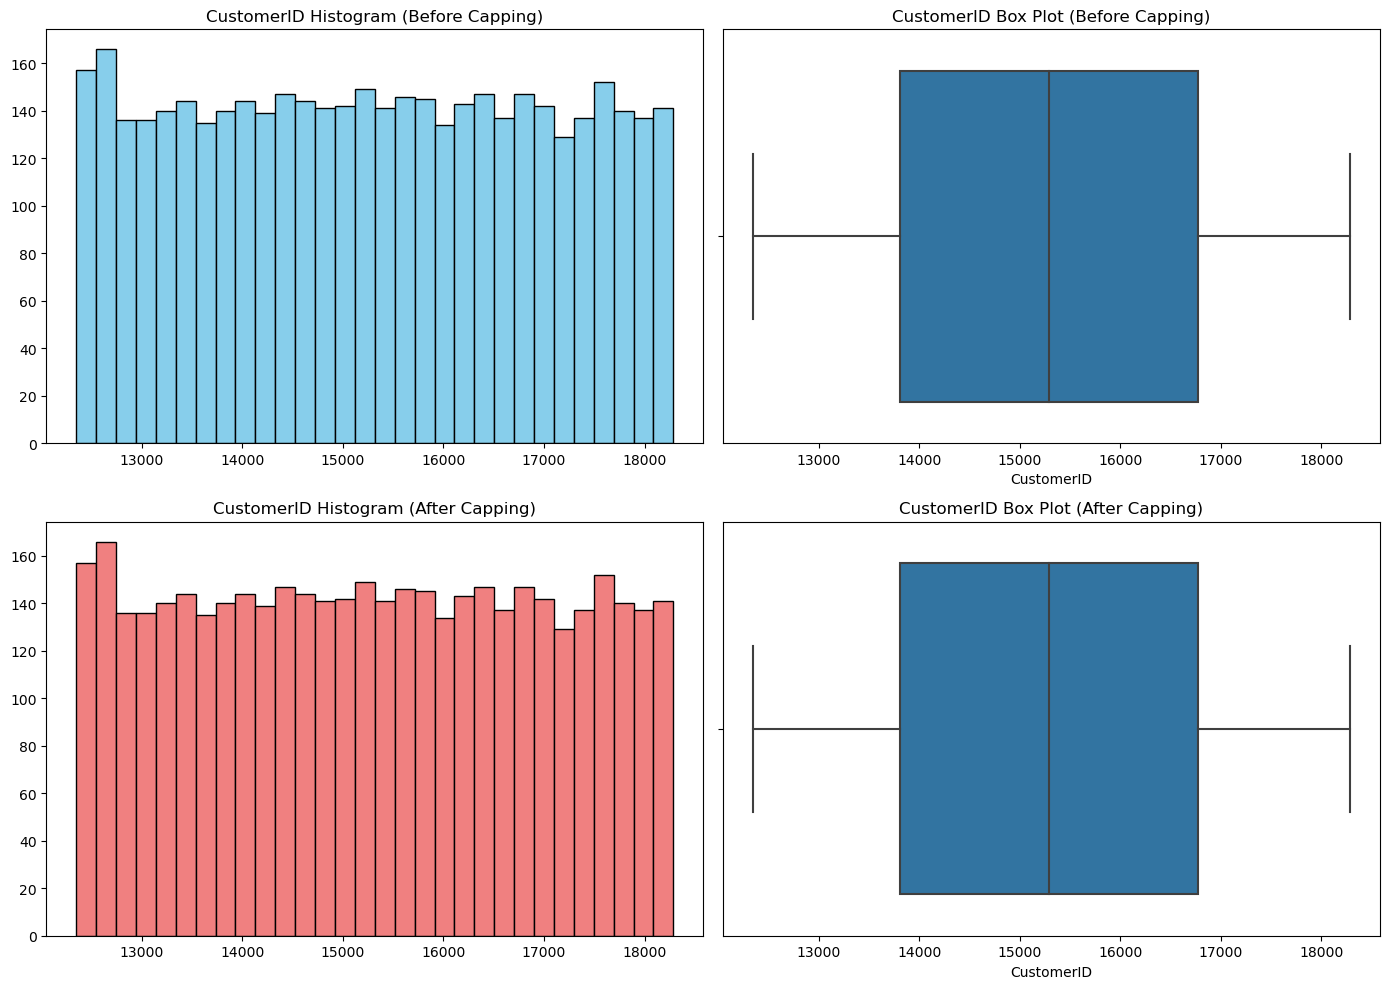

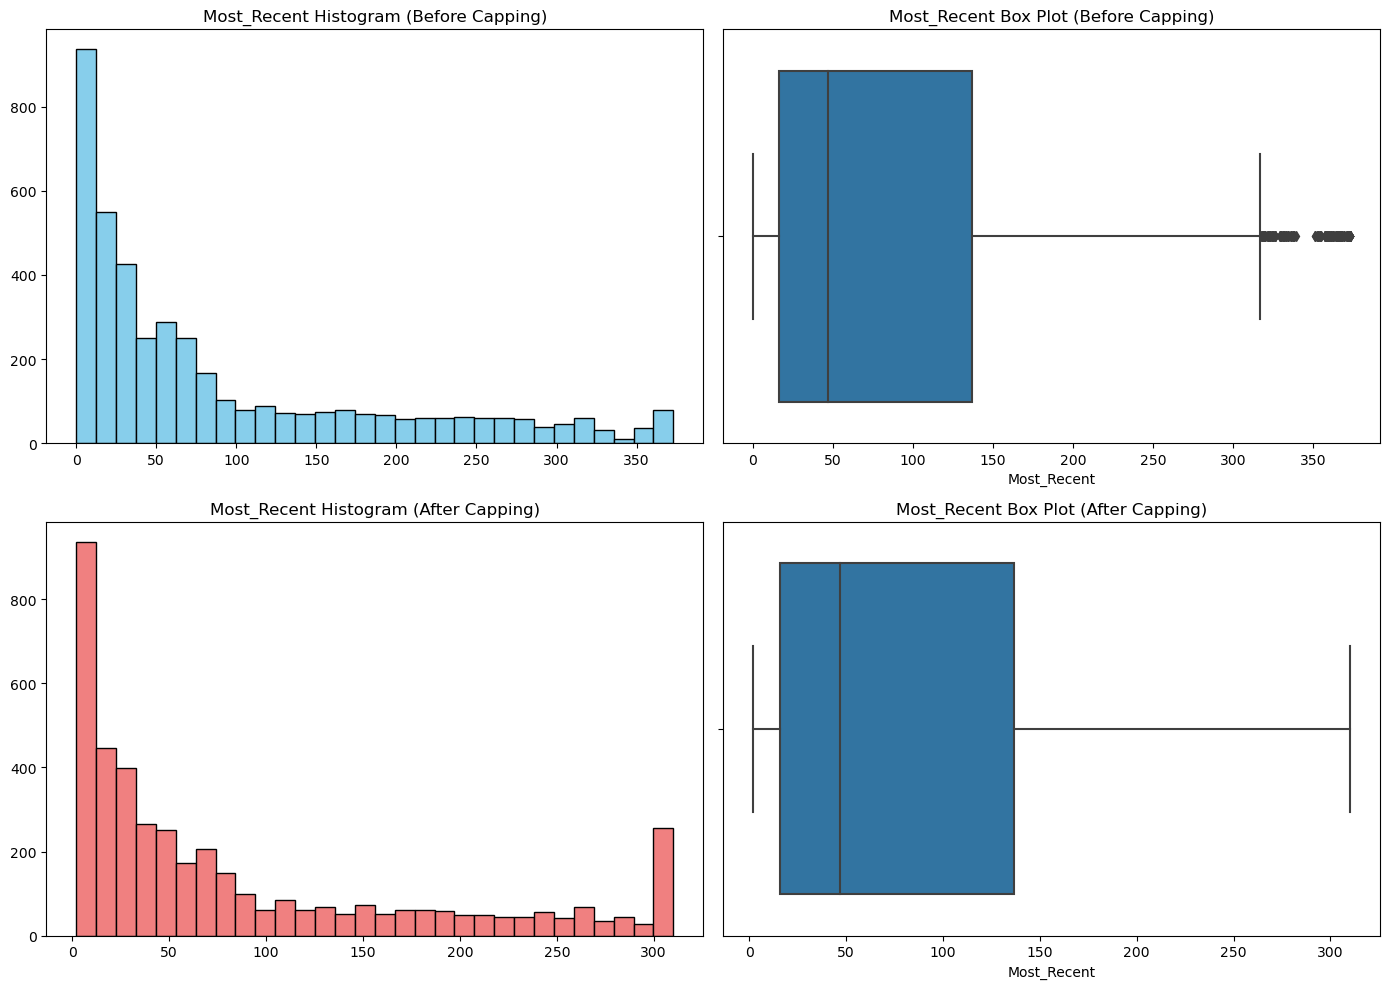

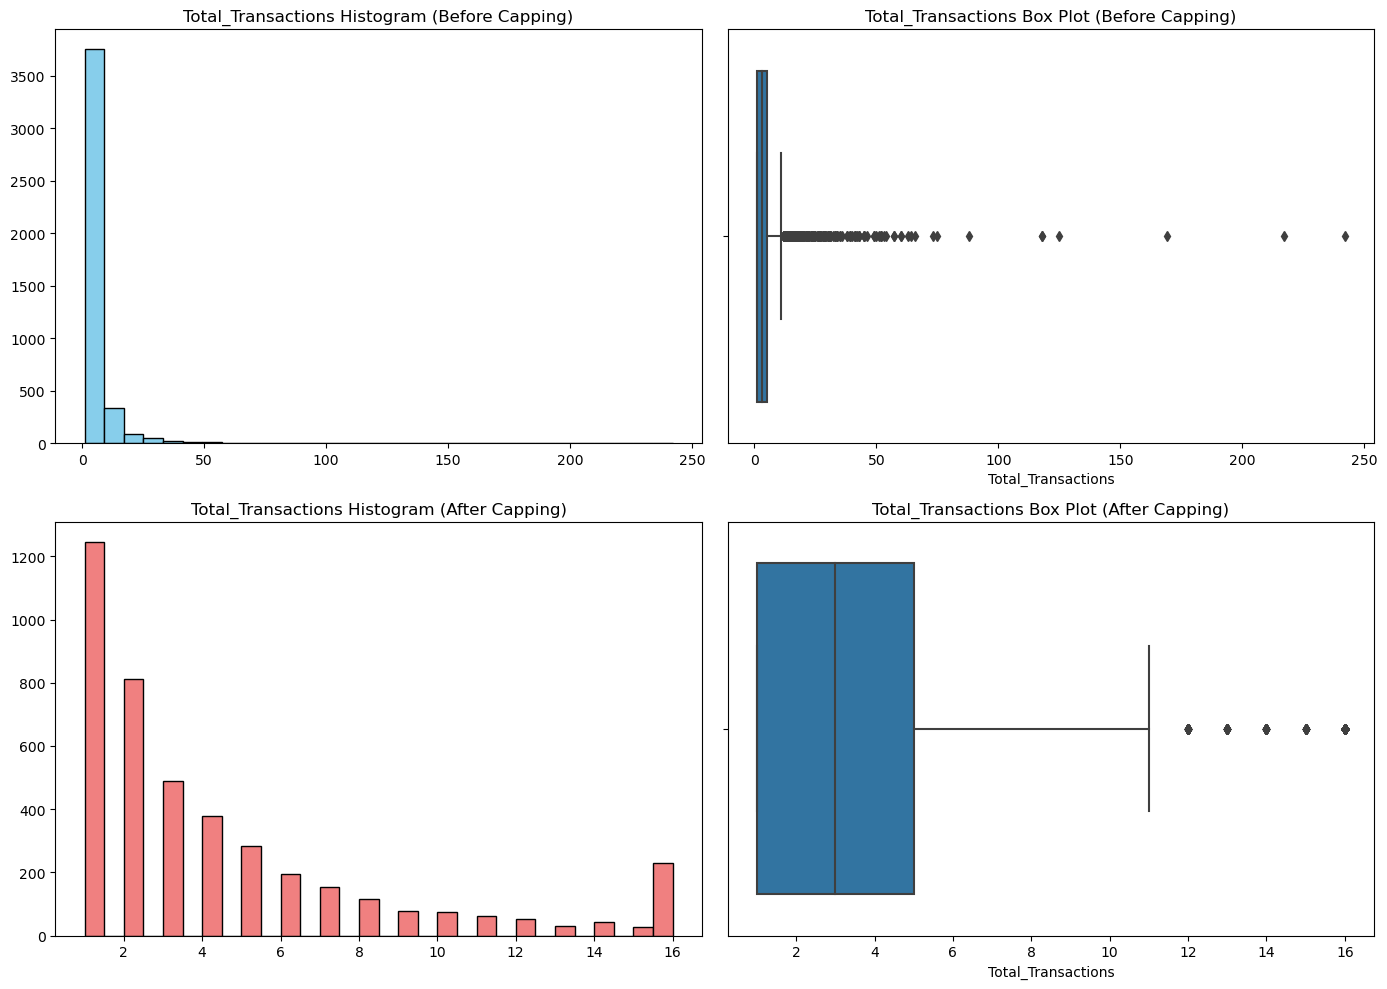

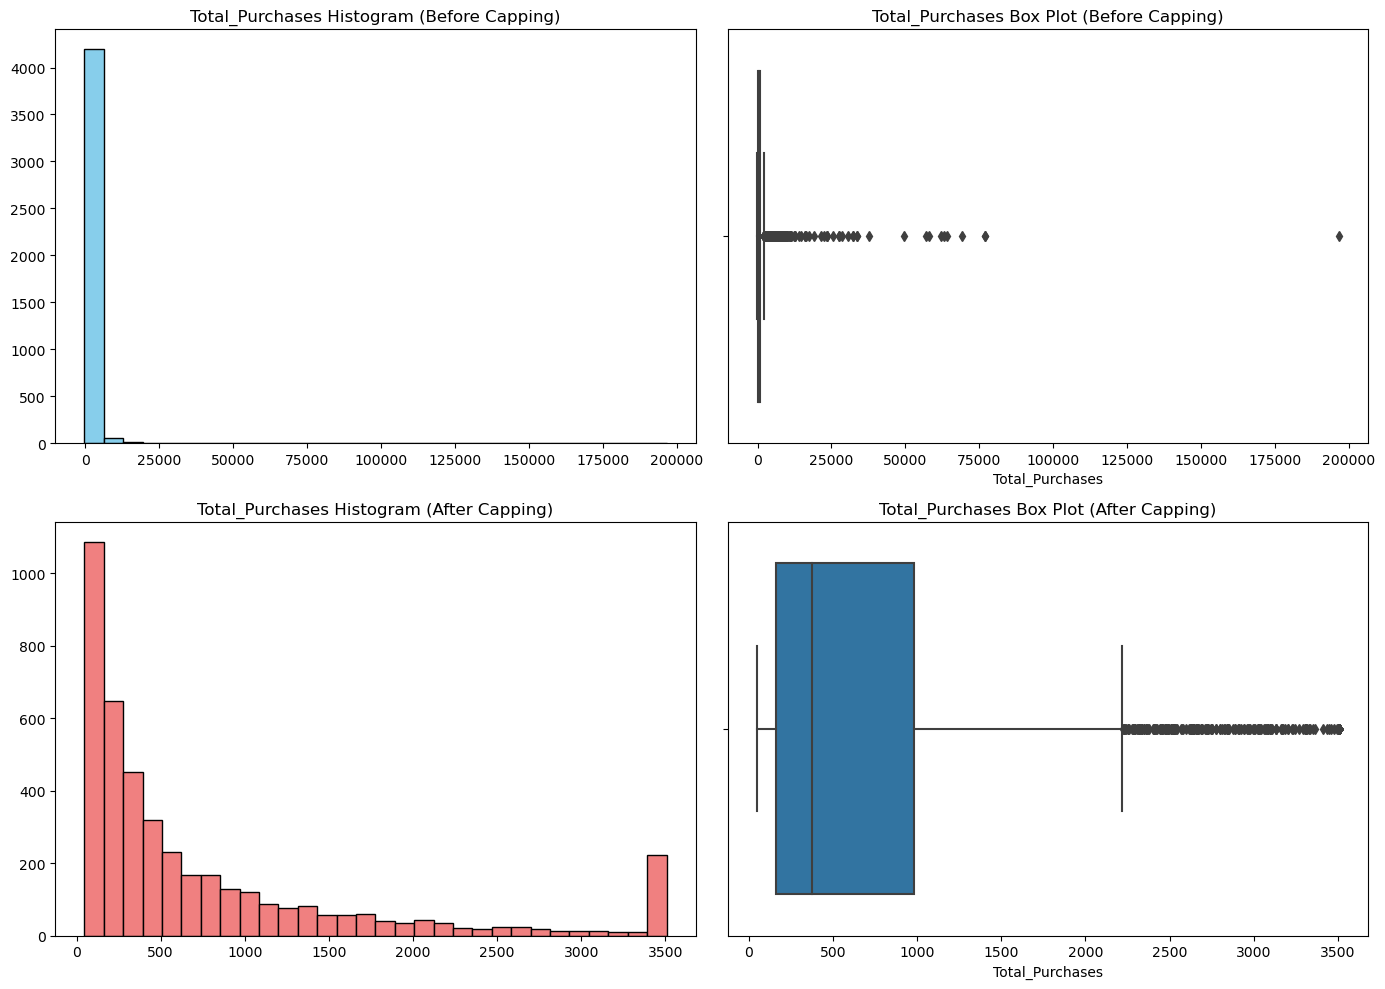

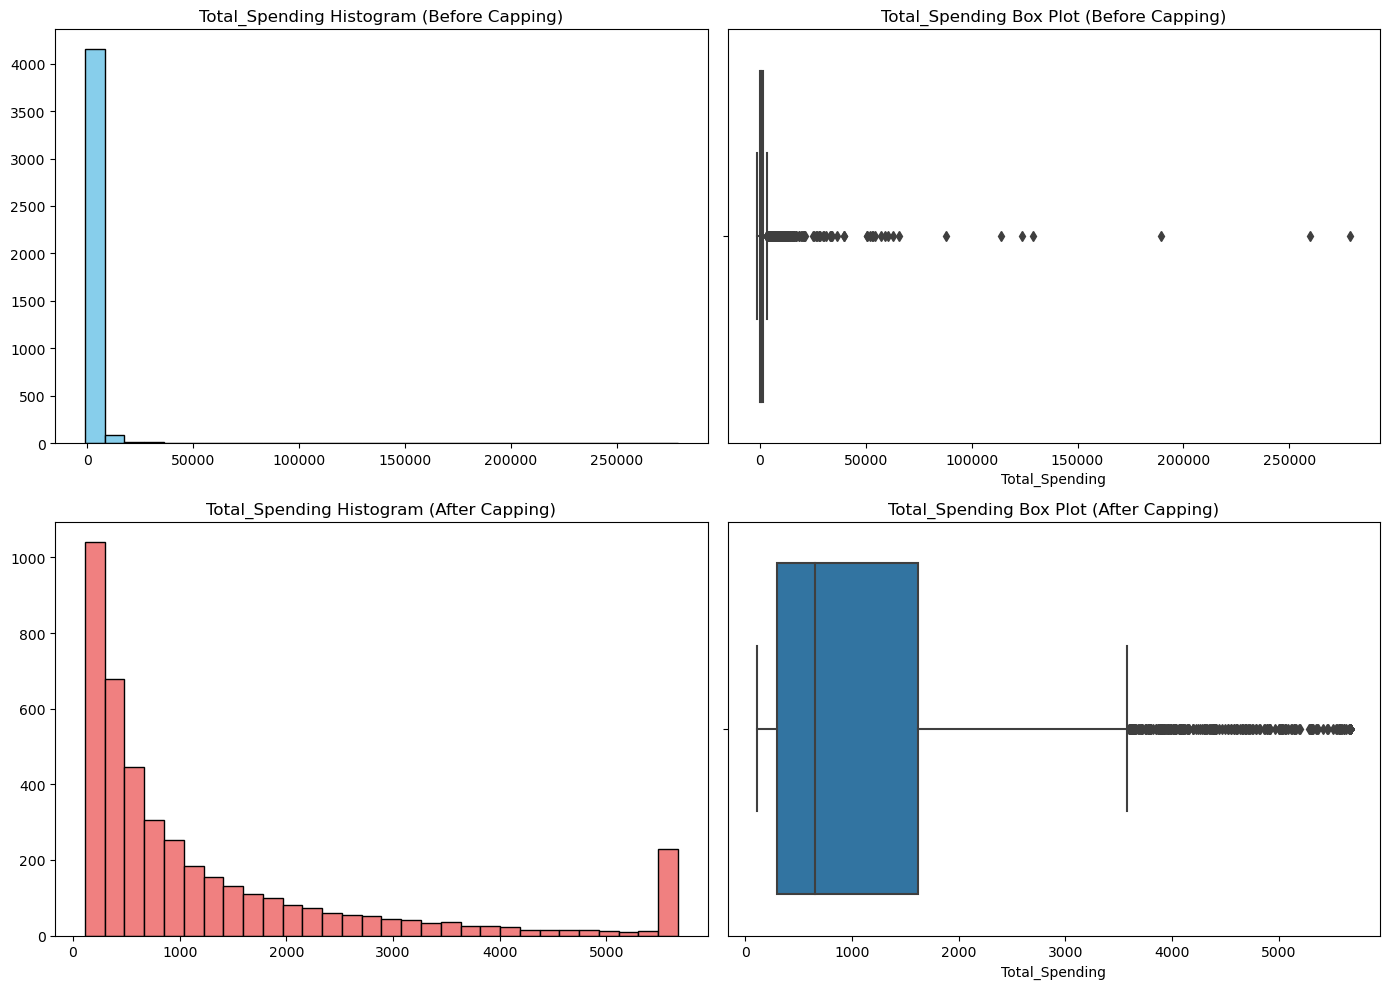

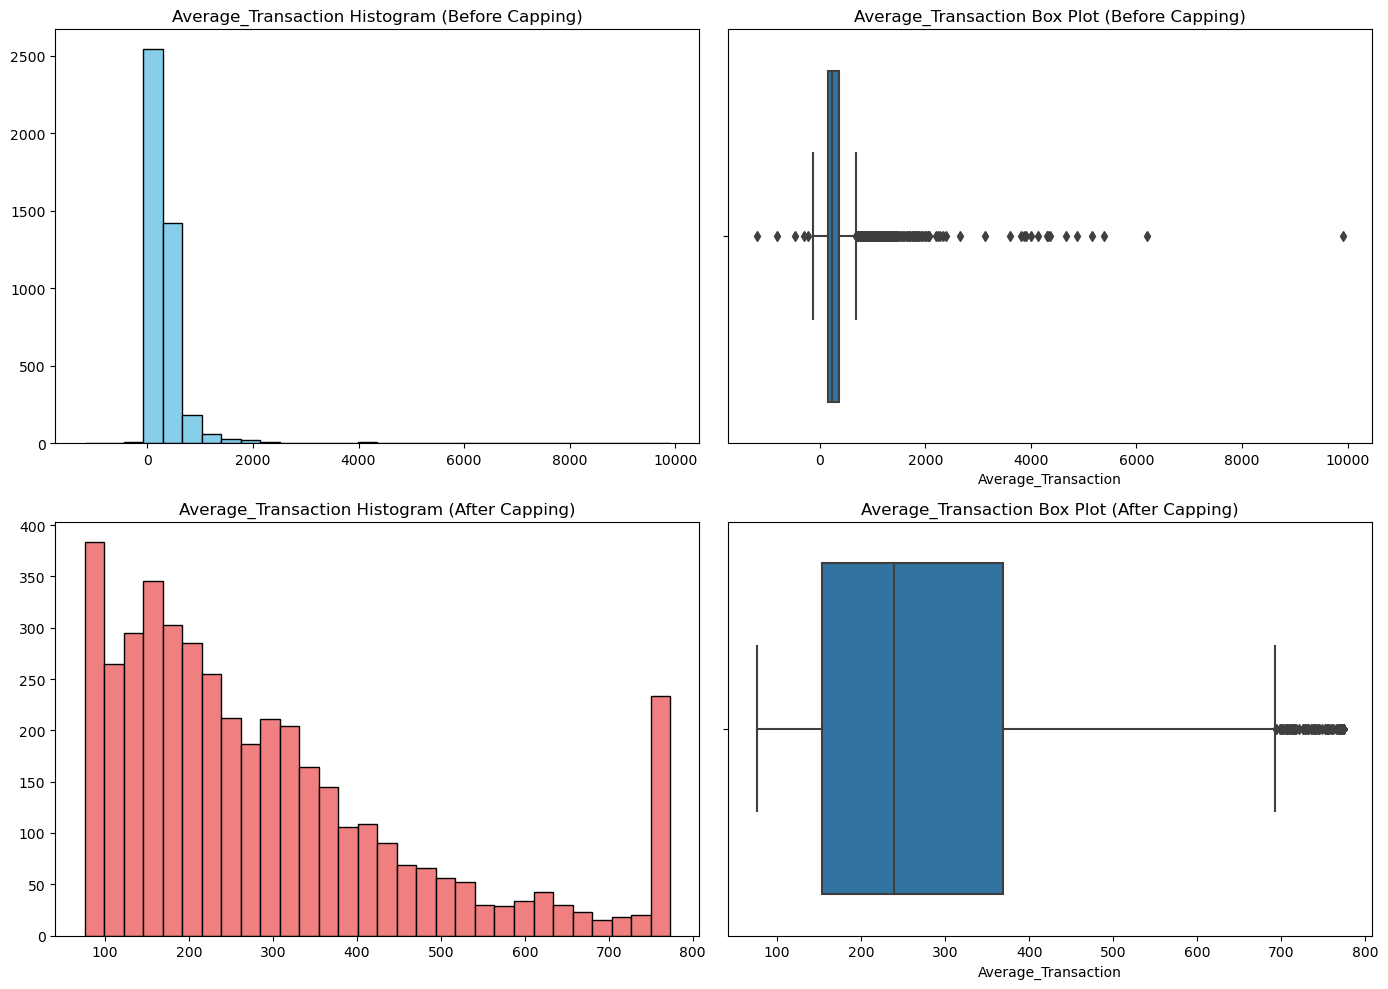

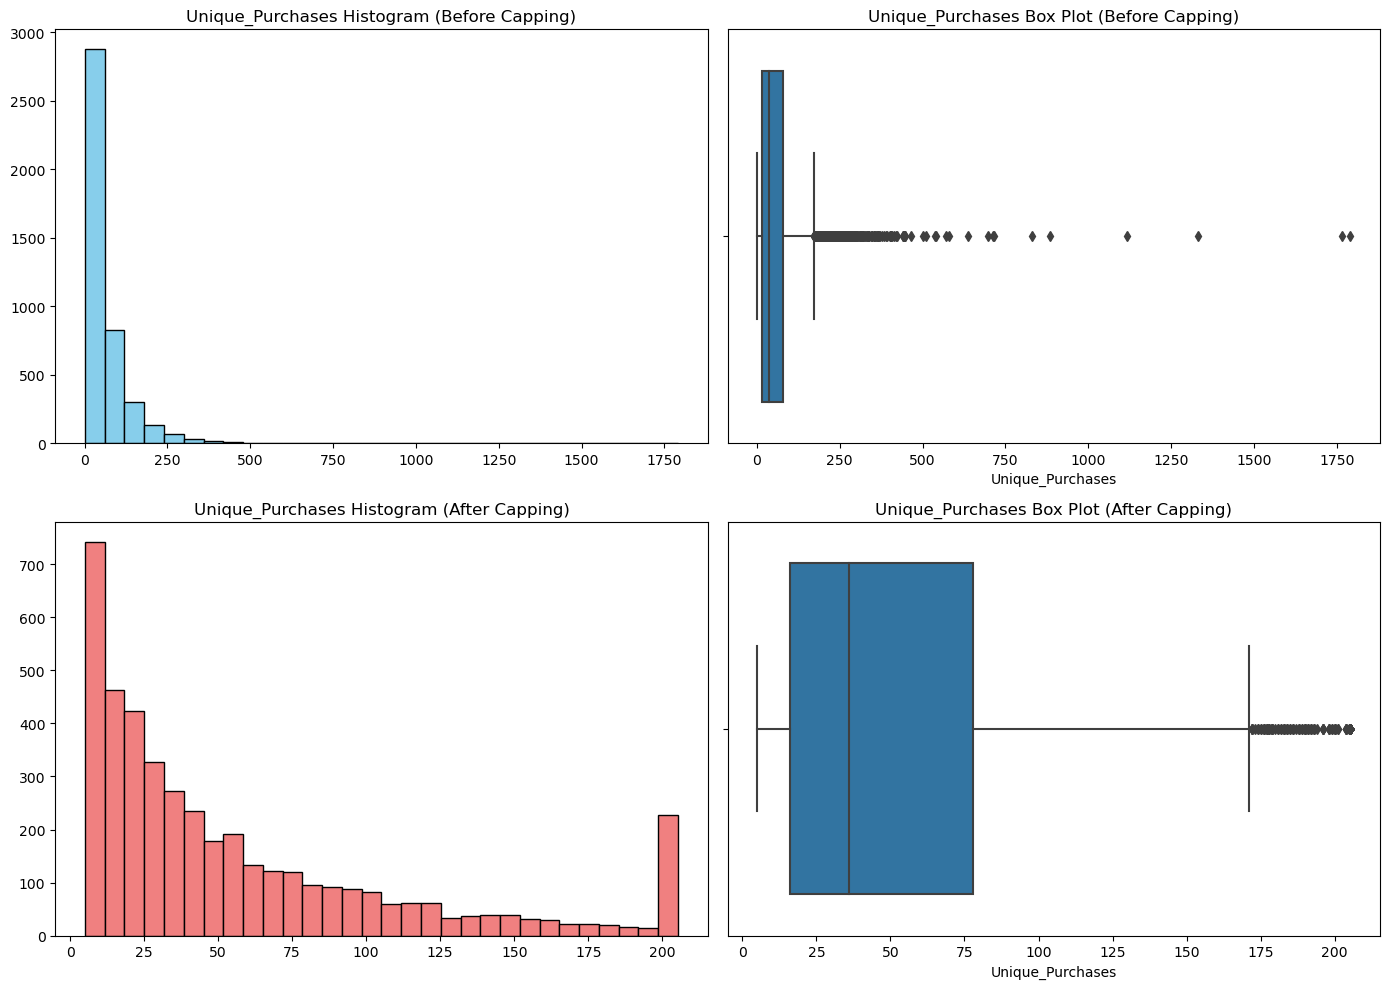

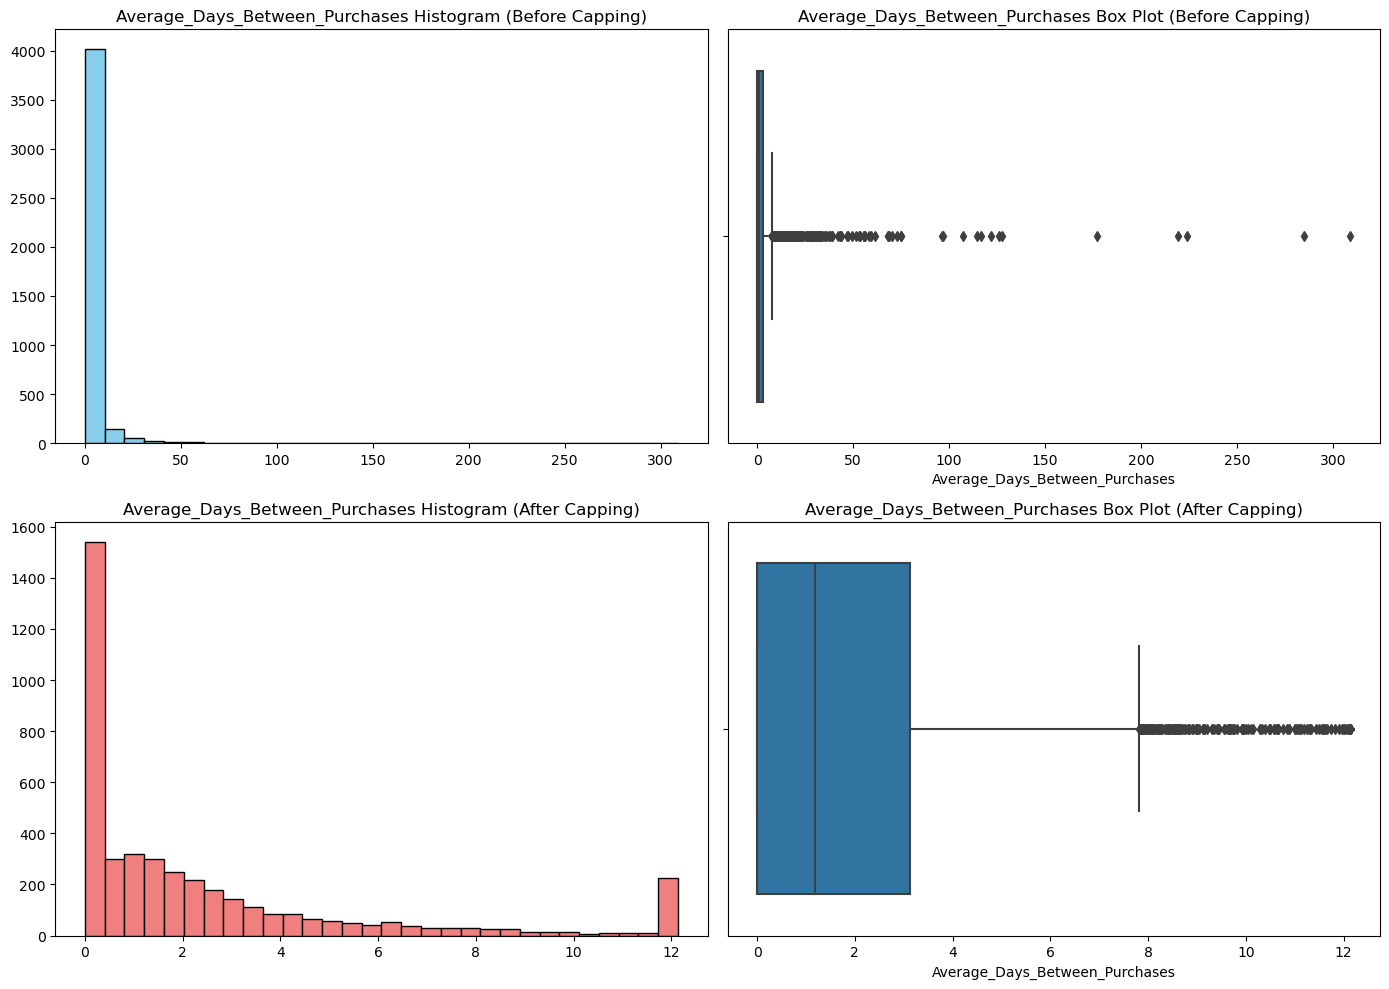

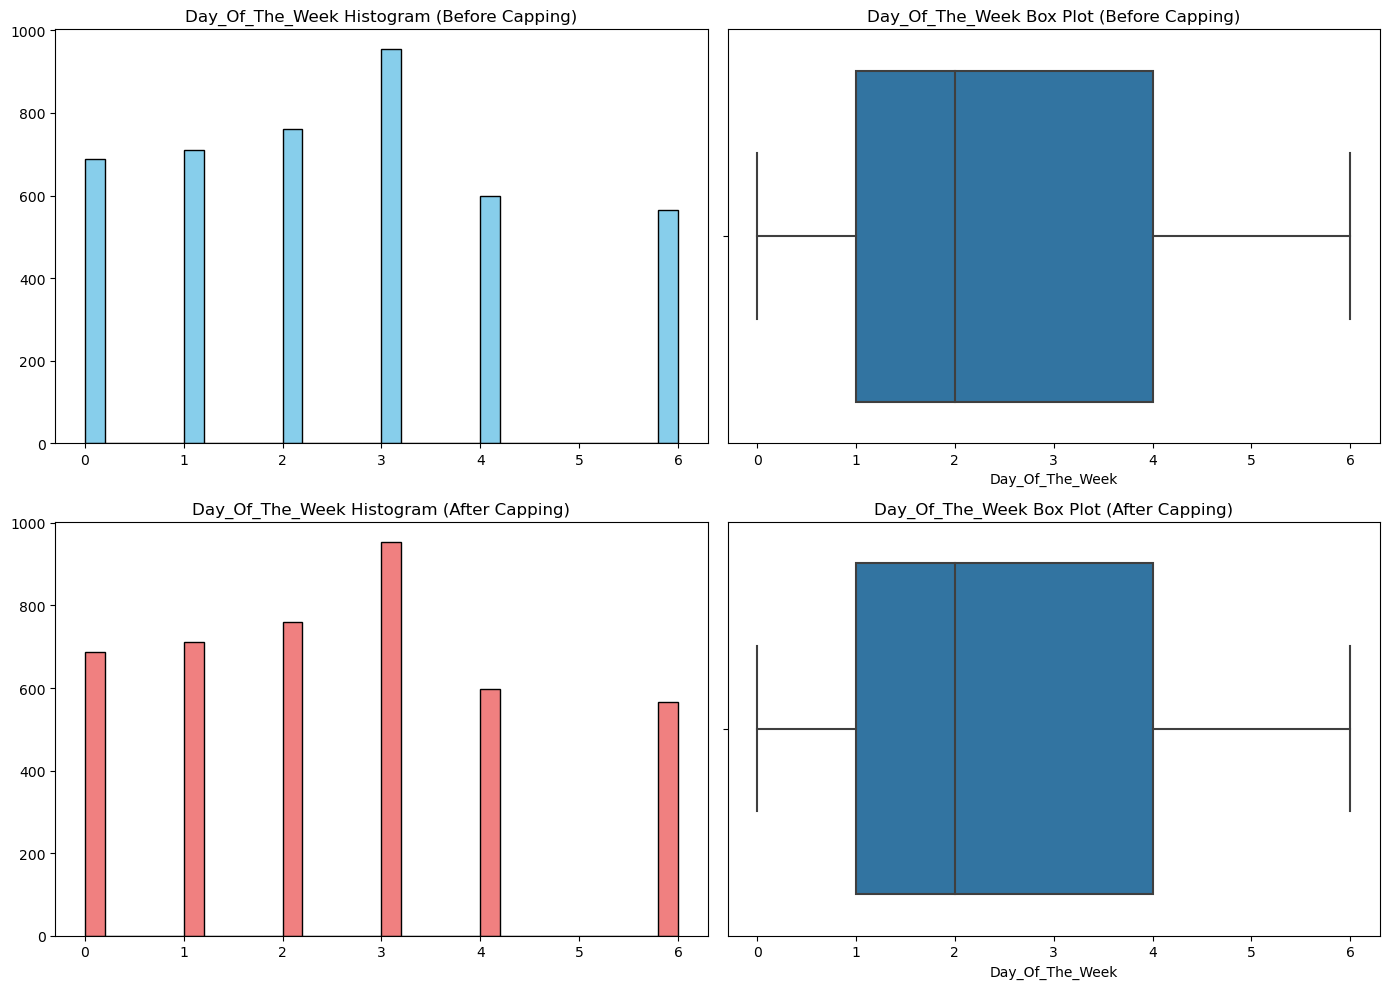

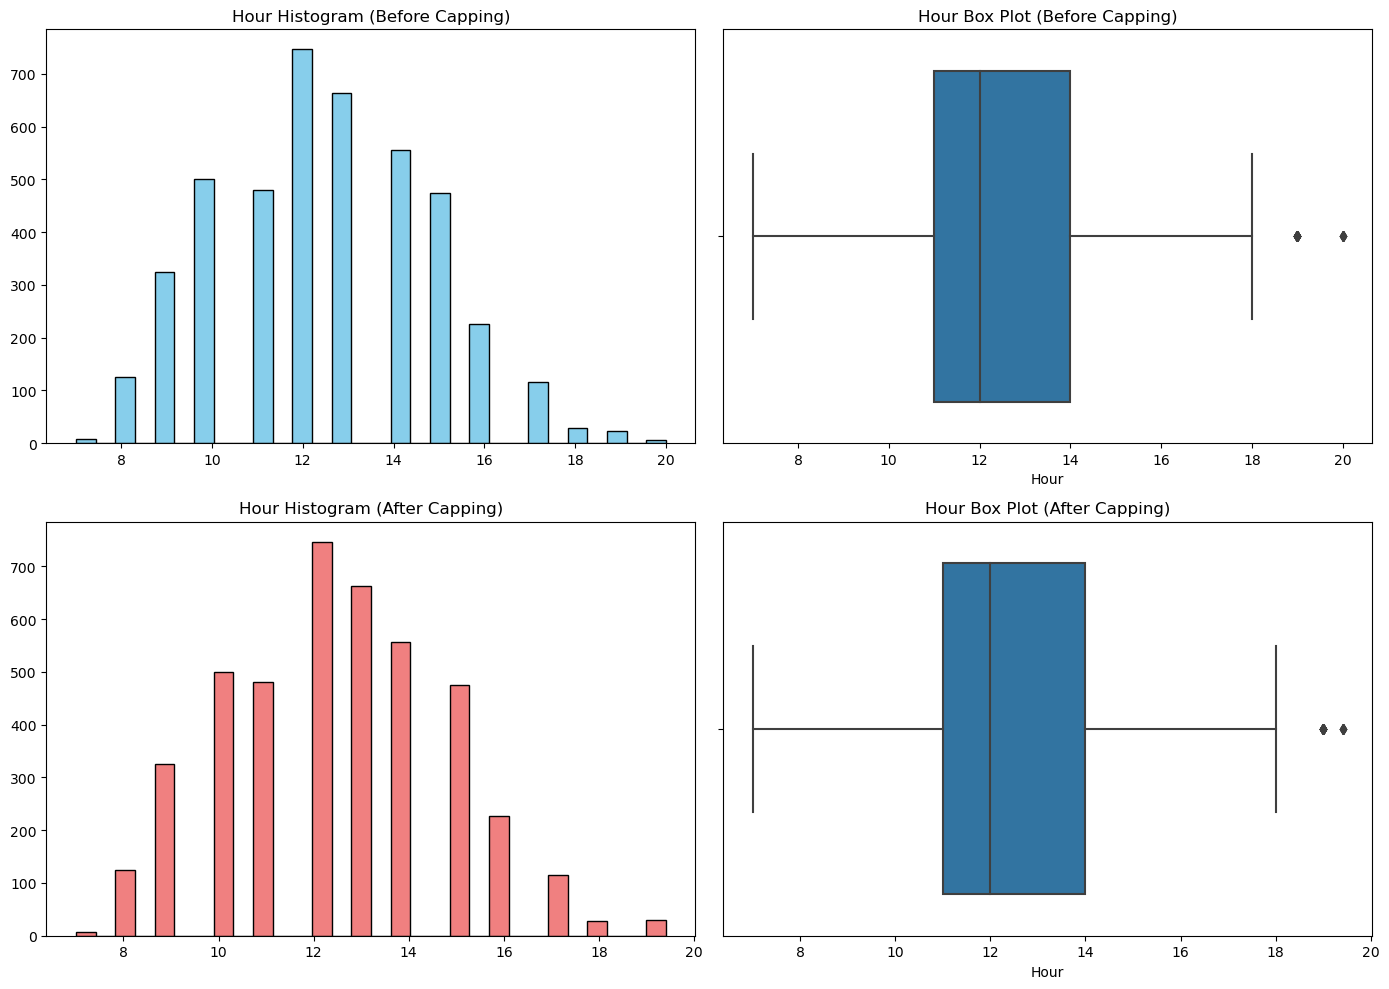

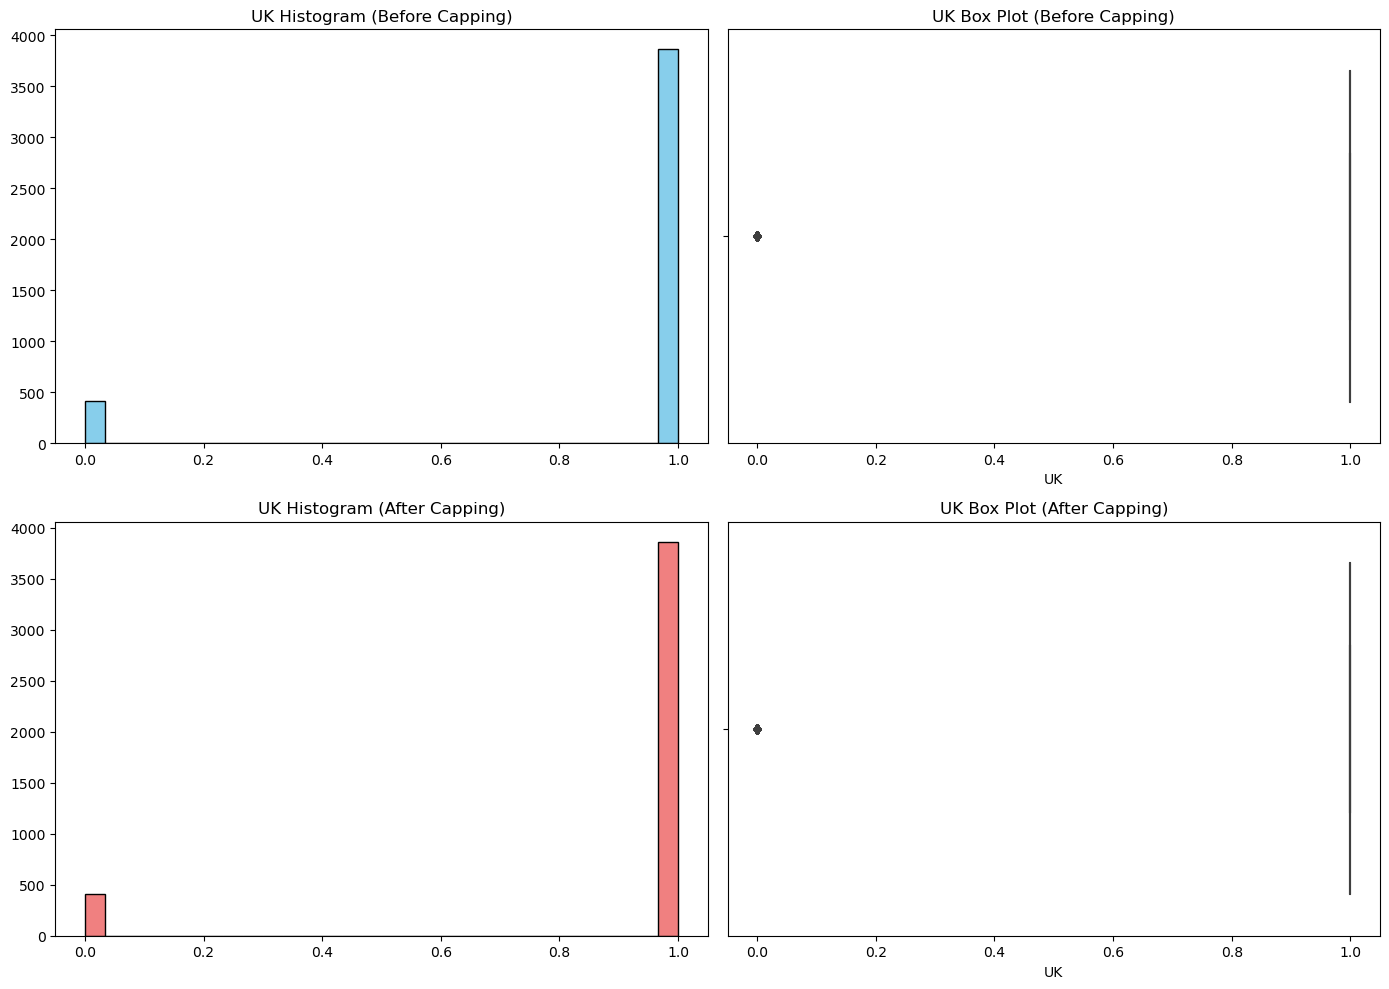

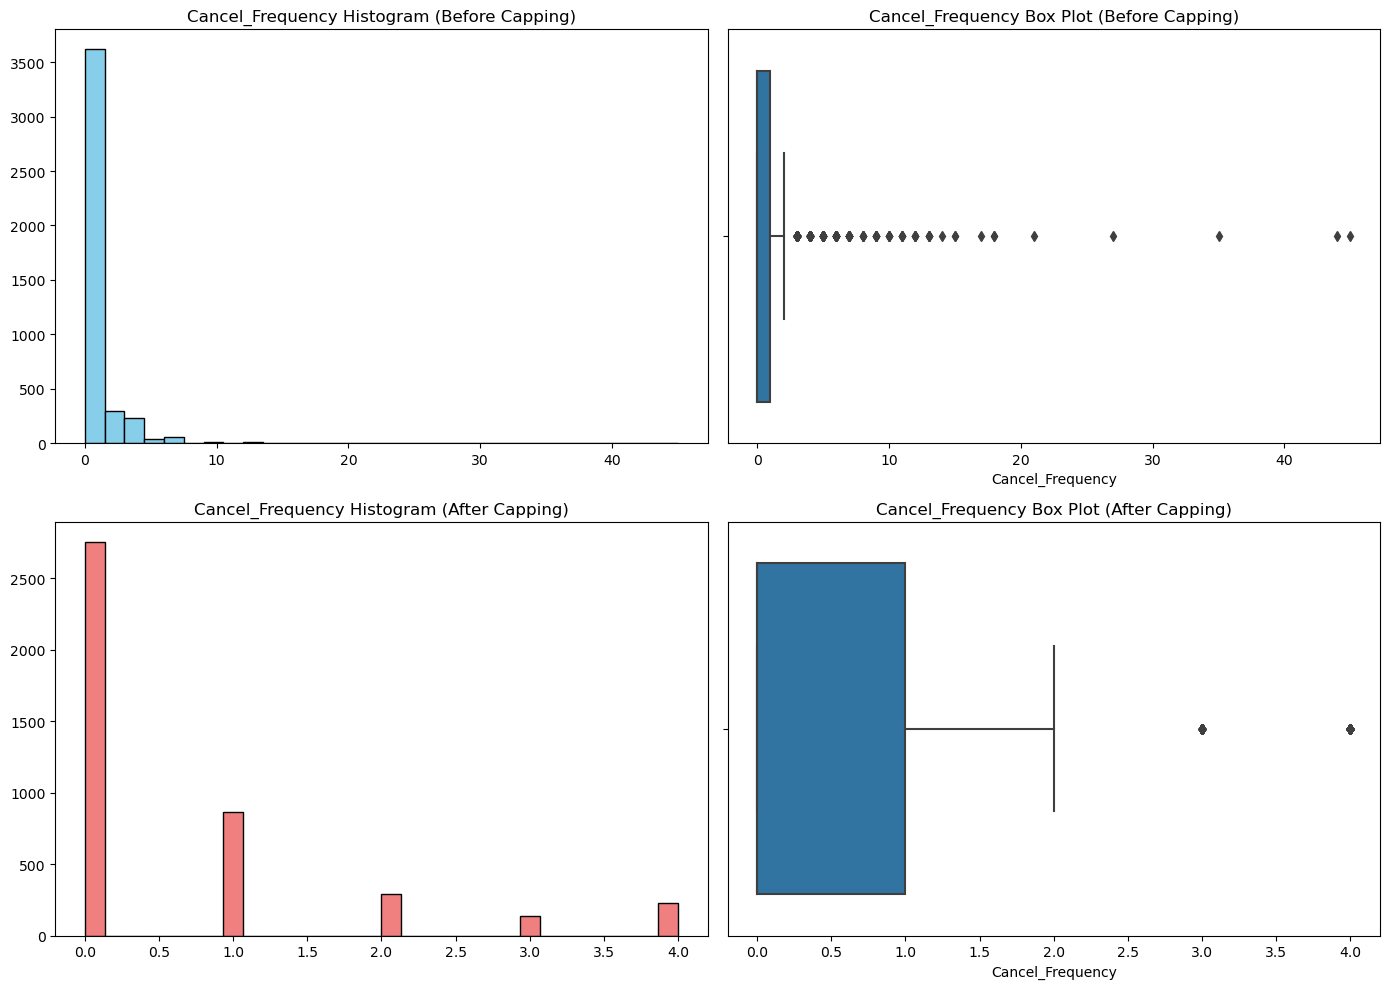

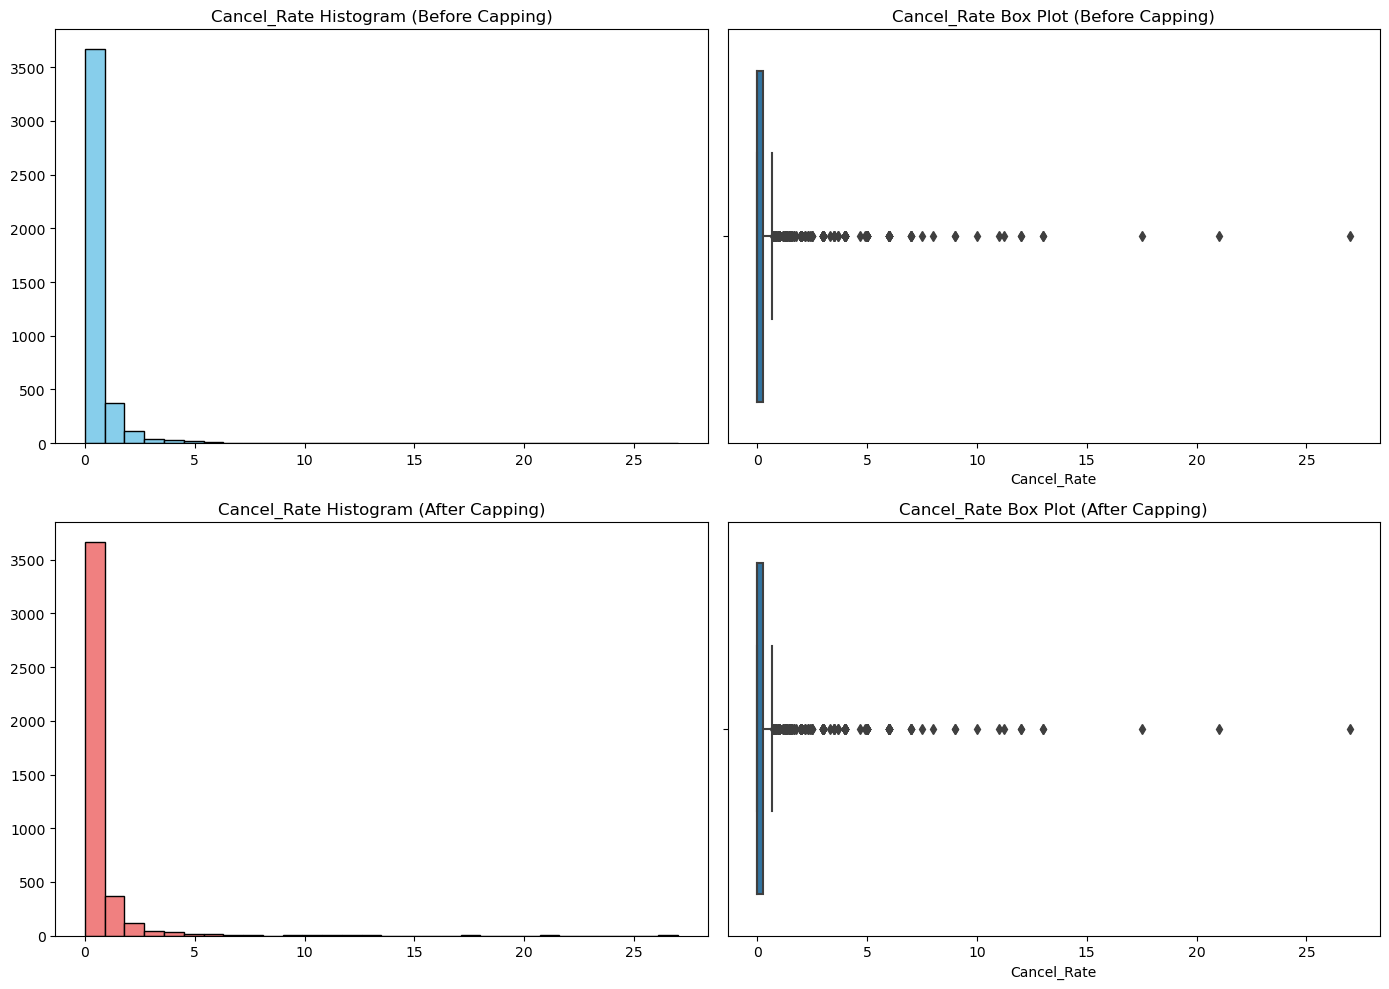

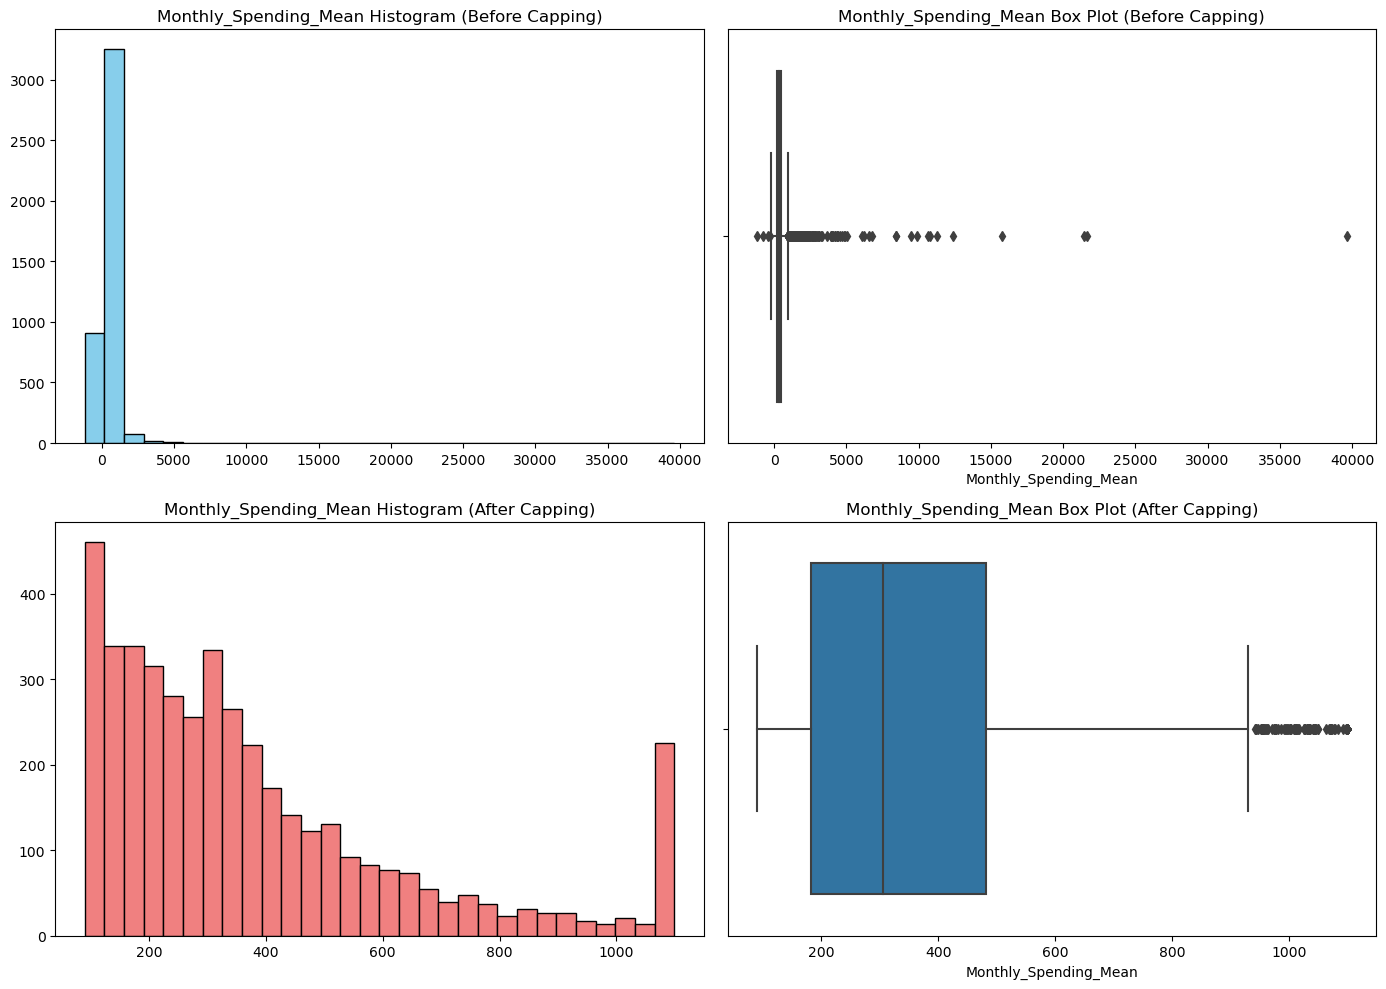

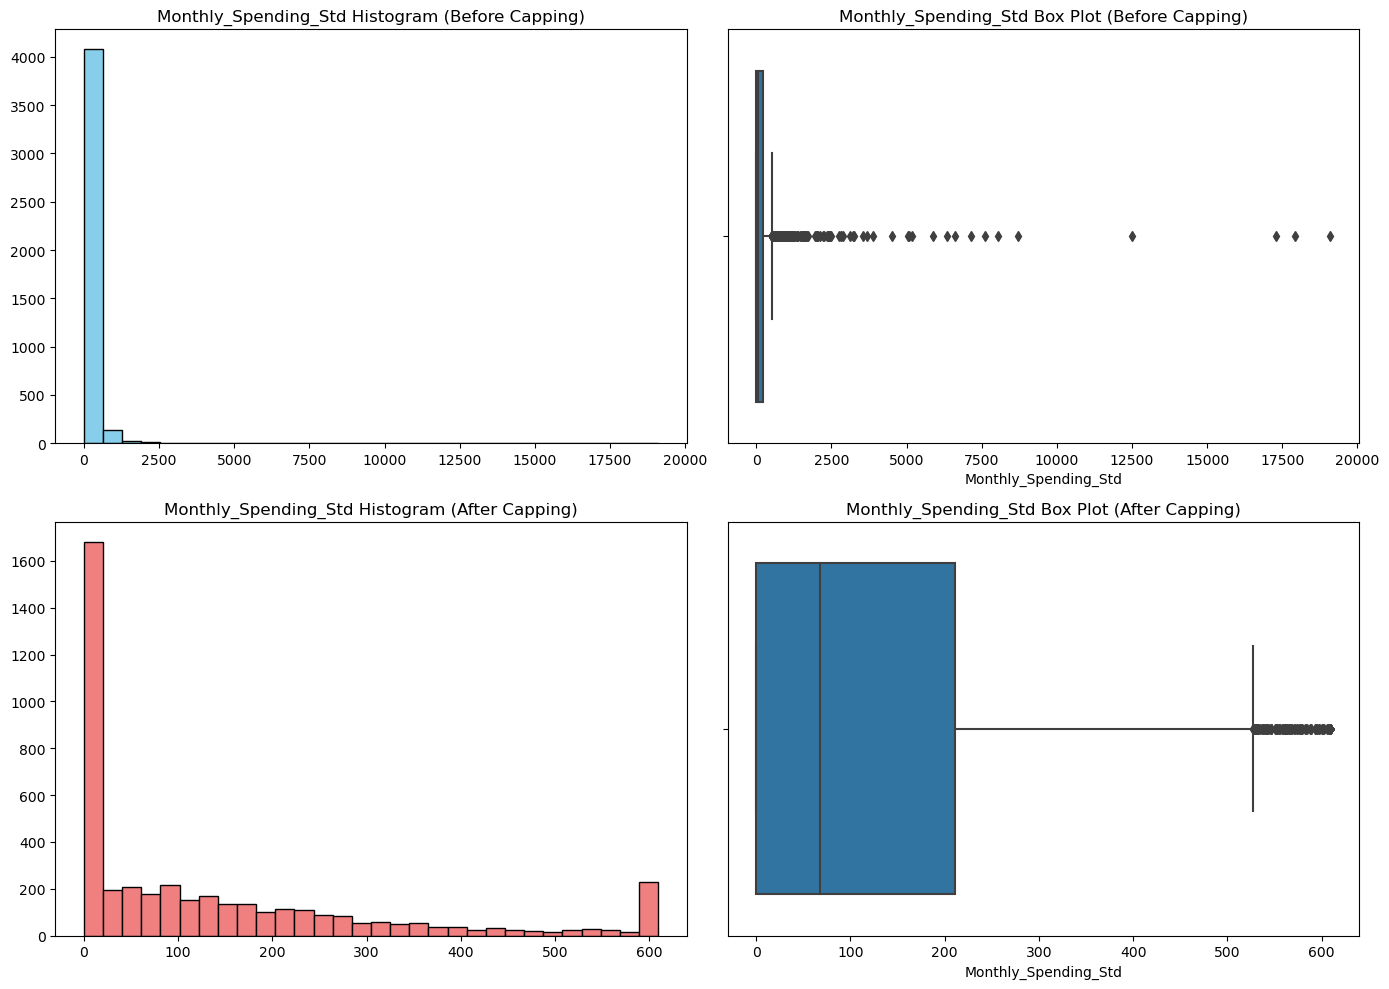

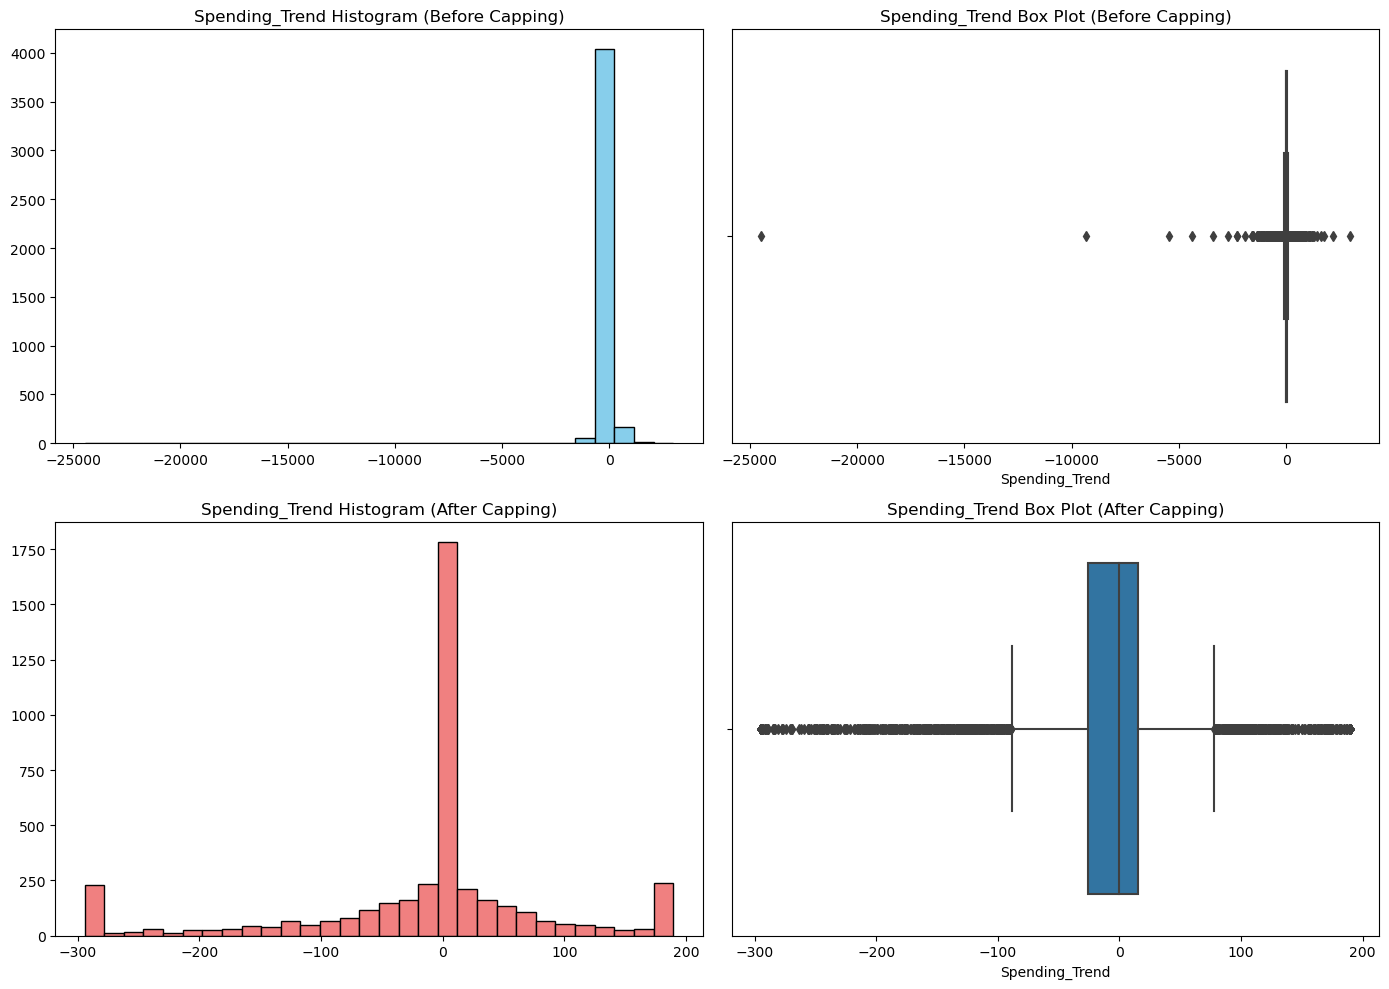

In [279]:
# Loop each graph that is in the columns variable for X_train before and after capping
for name in nominal:
       plot_histogram_boxplot(df, df_capped, name)

**Plot - Explanation**    
Through the generated plots, we can compare the distribution of variables **before** and **after** outlier handling. By observing the **histograms** and **boxplots** **before** handling, we can assess the extent of the variable's distribution's **extremity** and the impact of **outliers** on the overall distribution. **Post-handling**, we can observe changes in the variable's distribution and whether outlier handling has successfully addressed **skewness** or **extreme value** issues.

# **5. Data Preprocessing**

In [280]:
# Memilih kolom yang sudah di capped untuk melakukan prossesing data
data_num =  df_capped[[
                      'Most_Recent', 'Total_Transactions', 'Total_Purchases', 'Total_Spending', 'Average_Transaction', 'Unique_Purchases', 'Average_Days_Between_Purchases', 
                       'Day_Of_The_Week', 'Hour', 'UK', 'Cancel_Frequency', 'Cancel_Rate', 'Monthly_Spending_Mean', 
                       'Monthly_Spending_Std', 'Spending_Trend']].values

**Selected Data - Explanation**    
The selected data comprises columns that have undergone the **outlier handling process**, which is part of the **feature engineering stage**. These columns are chosen for **preprocessing** on the dataset after the **feature engineering process** because they have undergone **outlier treatment**, resulting in more controlled distributions of values within those columns. This step ensures that the data used in the **preprocessing stage** has been properly prepared and is not influenced by **outliers**, thereby enhancing the quality of subsequent analysis and modeling.

## Scaling

Scaling data before modeling, particularly for customer segmentation, is crucial for several reasons. 
- First, scaling ensures that all features have a similar scale, preventing features with larger scales from dominating those with smaller scales during the modeling process. This helps achieve a more balanced and fair comparison between features. 
- Second, many machine learning algorithms, including clustering algorithms like KMeans, rely on distance metrics to determine similarity between data points. Scaling ensures that these distance metrics are meaningful by bringing all features to a comparable scale. 
- Third, scaling also helps improve the convergence rate of optimization algorithms, making the modeling process more efficient.                   
Overall, scaling data before modeling is highly important to obtain accurate and reliable segmentation results.

In [281]:
# Proses pemanggilan function scaler StandardScaler.
scaler = StandardScaler()

# Fit the encoder with training data
scaler.fit(data_num)

data_scaler = scaler.transform(data_num)

**Scaling - Explanation**  
   
The **StandardScaler** is employed in **data preprocessing** for **clustering modeling** using **KMeans** to ensure that all features have a **mean of 0** and a **standard deviation of 1**. This scaling technique is crucial in **KMeans clustering** because it helps in **standardizing the range of features**, thereby giving each feature **equal importance** during **clustering**. Since **KMeans relies on Euclidean distance** to measure the similarity between data points, having features with **vastly different scales** can result in **biased clustering**. **StandardScaler** mitigates this issue by bringing all features to the **same scale**, facilitating more **accurate** and **unbiased clustering results**.

## PCA

PCA is utilized to reduce the dimensionality of the data before clustering using KMeans. This aids in addressing the issue of high dimensionality, enhancing computational efficiency, improving cluster interpretation, and assisting in determining the optimal number of clusters. By reducing dimensions, PCA helps identify relevant patterns in the data and enhances the quality of segmentation.

In [282]:
# Dimensionality Reduction using PCA
pca = PCA()
pca.fit(data_scaler)

PCA()

**PCA - Explanation**   
Dimensionality reduction using Principal Component Analysis (PCA) is performed on the scaled data. This code initializes a PCA object and then fits it to the scaled data using the `fit()` method. After fitting, the PCA object contains information about the principal components of the data, which can be used for further analysis or visualization.

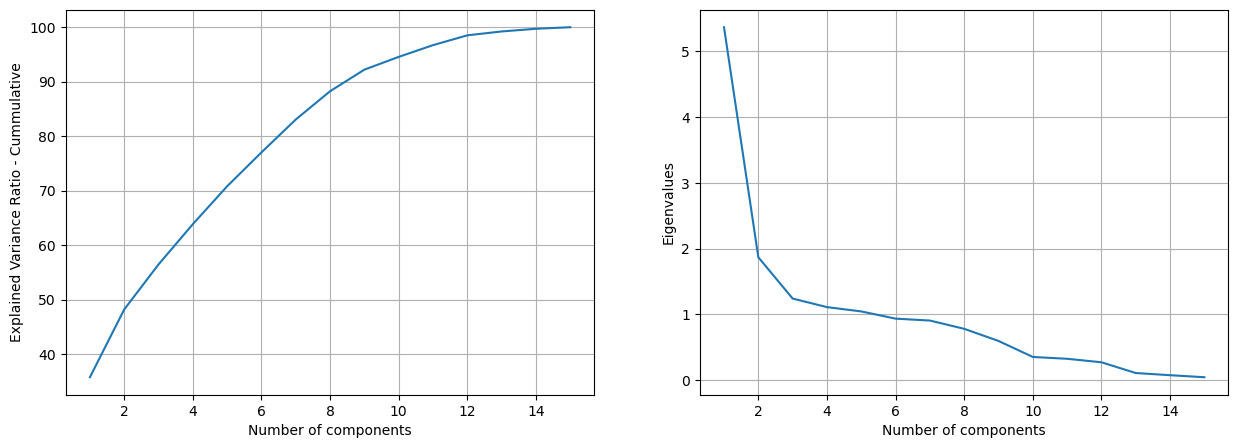

In [283]:
# Plot the Cummulative of Explained Variance Ratio
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(range(1, 16), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance Ratio - Cummulative')

# Plot the Eigenvalues
plt.subplot(1, 2, 2)
plt.grid()
plt.plot(range(1, 16), pca.explained_variance_ )
plt.xlabel('Number of components')
plt.ylabel('Eigenvalues');

**Optimal n_component - Explanation**    
The graph illustrates two important aspects of Principal Component Analysis (PCA). The left subplot showcases the cumulative explained variance ratio, indicating the cumulative amount of variance explained by each additional principal component. This information aids in determining the optimal number of principal components to retain for dimensionality reduction while preserving most of the variability in the data. The right subplot displays the eigenvalues associated with each principal component, indicating the amount of variance explained by each component individually. By examining both plots, analysts can make informed decisions regarding the number of principal components to retain based on the trade-off between dimensionality reduction and information preservation. Upon examining both plots, it can be determined that the **optimal number of principal components is 2**.

In [284]:
#  latih model dengan n_components 2 dari kumpulan data asli

pca = PCA(n_components=2)
pca.fit(data_scaler)

data_pca = pca.transform(data_scaler)

In [285]:
print("Proporsi varian yang dijelaskan oleh setiap komponen:", pca.explained_variance_ratio_)

Proporsi varian yang dijelaskan oleh setiap komponen: [0.3576049  0.12446168]


**Explanation**   
After determining the optimal number of components as **2**, the PCA model is retrained using this specific number of components on the original dataset. By specifying `n_components=2`, the PCA algorithm is instructed to reduce the dimensionality of the data to only two principal components. The `fit` method is then applied to the scaled data to train the PCA model based on these two components. Subsequently, the `transform` method is utilized to transform the scaled data into a new dataset, `data_pca`, which now contains the reduced-dimensional representation of the original data. Finally, the proportion of variance explained by each principal component is printed using `explained_variance_ratio_`. This step ensures that the PCA model is appropriately configured to capture the most significant variability in the data while reducing its dimensionality to facilitate further analysis or modeling.

# **6. Model Definition**

**Elbow method**    
The Elbow Method is a technique used to determine the optimal number of clusters in a dataset for KMeans clustering. In the provided code snippet, the method is implemented to identify the suitable number of clusters based on the within-cluster sum of squares (WCSS). This method involves iterating over a range of potential cluster numbers, fitting a KMeans model for each number of clusters, and calculating the WCSS for each model. The resulting plot displays the number of clusters on the x-axis and the corresponding WCSS values on the y-axis. The 'elbow' point on the plot represents the optimal number of clusters, where the WCSS starts to decrease at a slower rate. This point indicates the number of clusters where adding more clusters does not significantly reduce the WCSS, suggesting diminishing returns in clustering quality. Therefore, the 'elbow' point serves as a heuristic for determining the appropriate number of clusters for KMeans clustering, striking a balance between the model's complexity and its ability to capture meaningful patterns in the data.

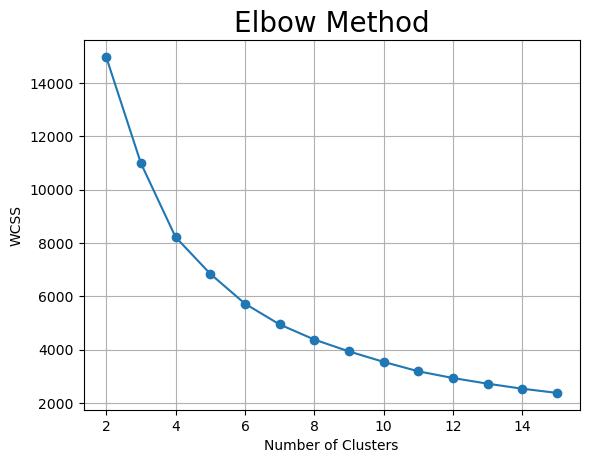

In [286]:
# Find the optimal number of clusters using Elbow Method
from sklearn.cluster import KMeans

wcss = []
random_state = 10
max_cluster = 15
for i in range(2, max_cluster+1):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = random_state)
    km.fit(data_pca)
    wcss.append(km.inertia_)

plt.plot(range(2, max_cluster+1), wcss, marker ="o")
plt.grid()
plt.title('Elbow Method', fontsize = 20)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

**Elbow Methode - Explanation**    

In the graph, the elbow point seems to be around **5 or 6**, where the decrease in WCSS starts to slow down. This implies that increasing the number of clusters beyond **5 or 6** doesn't provide a significant improvement in terms of inertia reduction, hence, **5 or 6** can be considered as the optimal number of clusters for the data.

However, we can also search for the value of **k** using the silhouette score. The silhouette score measures how close each point in one cluster is to the points in the neighboring clusters. The score ranges from **-1 to 1**, where a higher value indicates that the object is better matched to its own cluster and worse matched to neighboring clusters. By seeking the **k** value that yields the highest silhouette score, we can determine the optimal number of clusters more objectively.

In [287]:
# Function untuk membuat Silhouette Plot

import matplotlib.cm as cm
from sklearn.metrics import silhouette_score,silhouette_samples

def plot_silhouette(range_n_clusters, X, random_state):
    """
    Membuat fungsi Plot analisis silhouette untuk pengelompokan KMeans.

    Parameter:
    - range_n_clusters (list atau range): Daftar jumlah kluster untuk dianalisis.
    - X (array-like): Matriks fitur.
    - random_state (int): Benih acak untuk reproduktibilitas.

    Kembali:
    - None
    """

    for n_clusters in range_n_clusters:
        # Buat subplot dengan 1 row dan 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 4)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_

        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

For n_clusters = 2 The average silhouette_score is : 0.549370132076617
For n_clusters = 3 The average silhouette_score is : 0.42103816771265173
For n_clusters = 4 The average silhouette_score is : 0.4321505877590992
For n_clusters = 5 The average silhouette_score is : 0.4004526173670729
For n_clusters = 6 The average silhouette_score is : 0.35416538316272517
For n_clusters = 7 The average silhouette_score is : 0.3620994921022898
For n_clusters = 8 The average silhouette_score is : 0.34464836206265487
For n_clusters = 9 The average silhouette_score is : 0.34473734346195906
For n_clusters = 10 The average silhouette_score is : 0.3468935925421236
For n_clusters = 11 The average silhouette_score is : 0.34964723114907675
For n_clusters = 12 The average silhouette_score is : 0.3517248042530711
For n_clusters = 13 The average silhouette_score is : 0.359135082629611
For n_clusters = 14 The average silhouette_score is : 0.35948942853162336


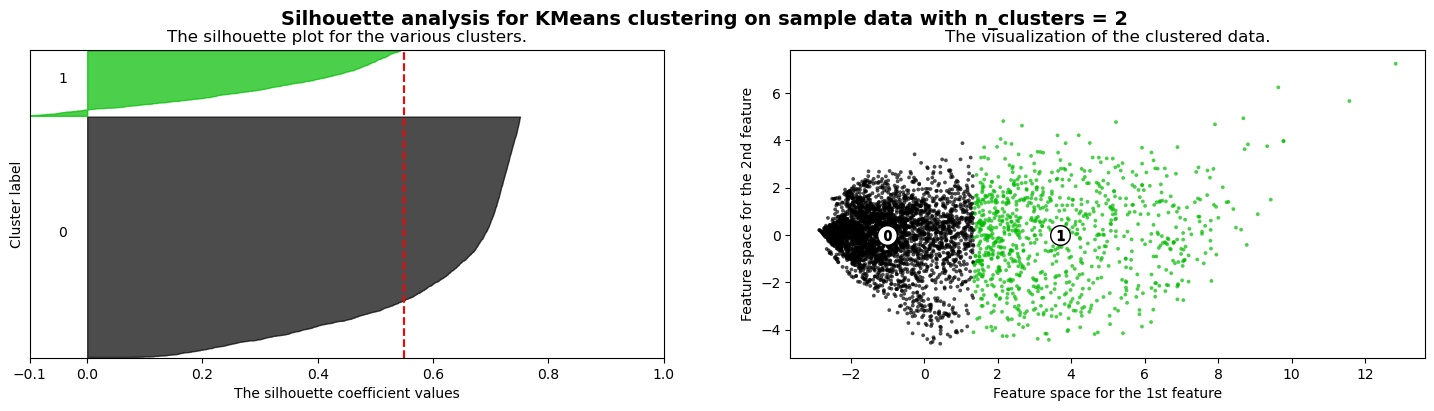

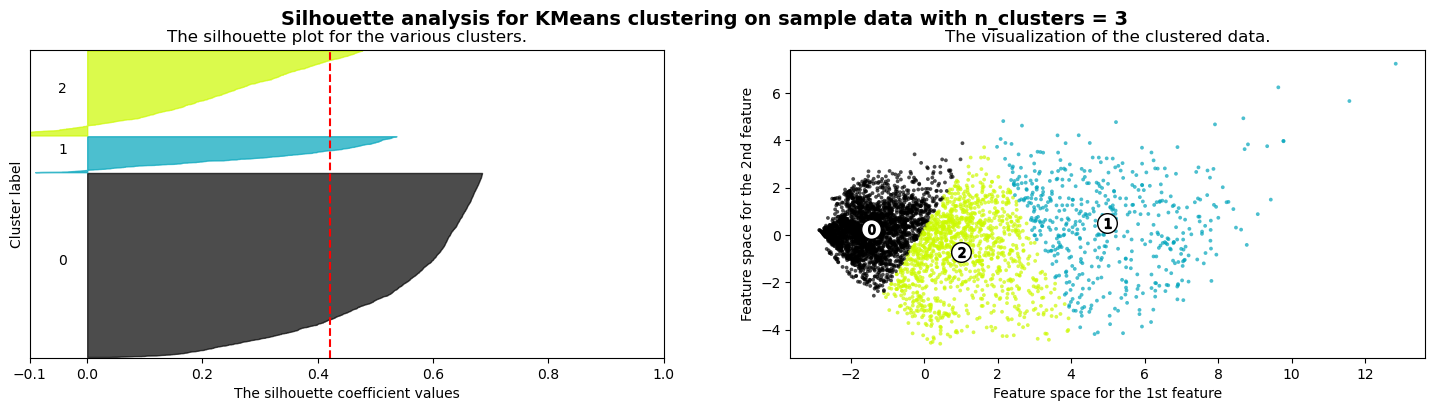

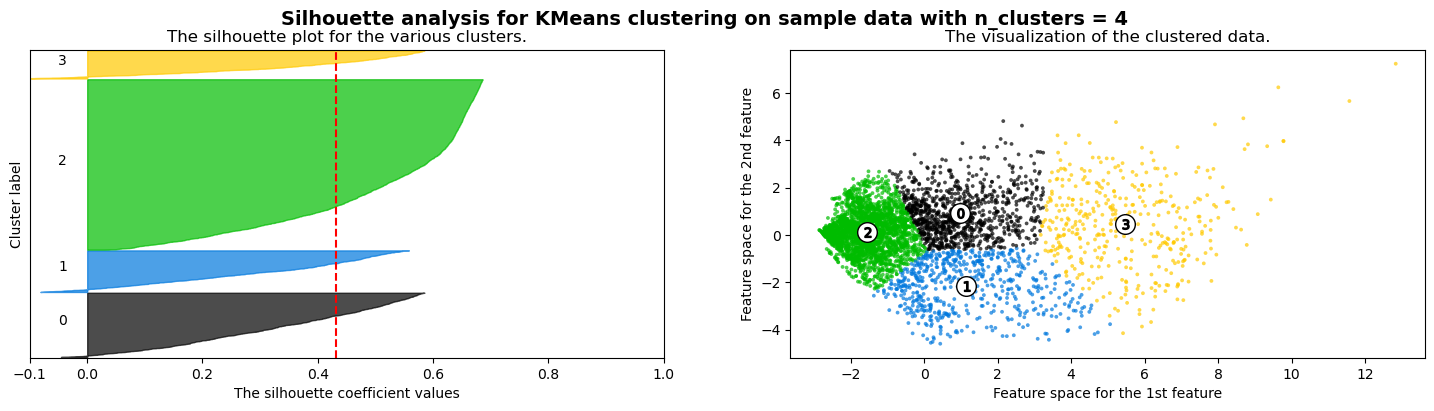

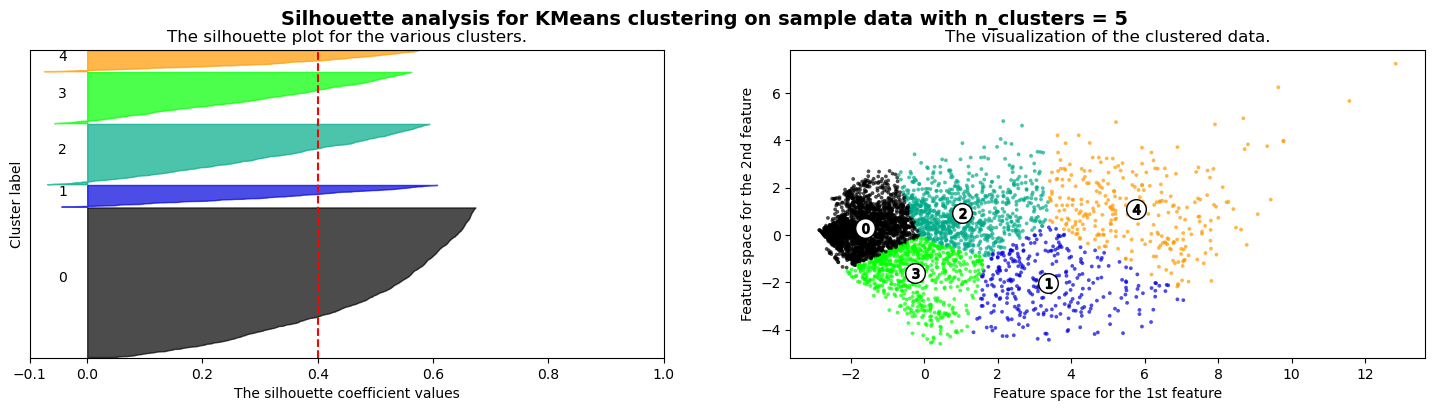

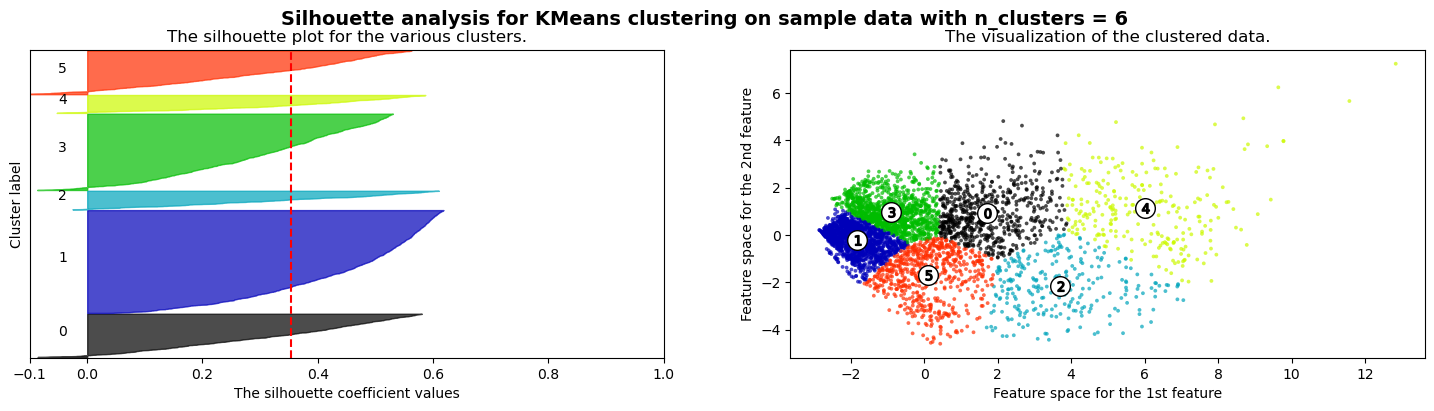

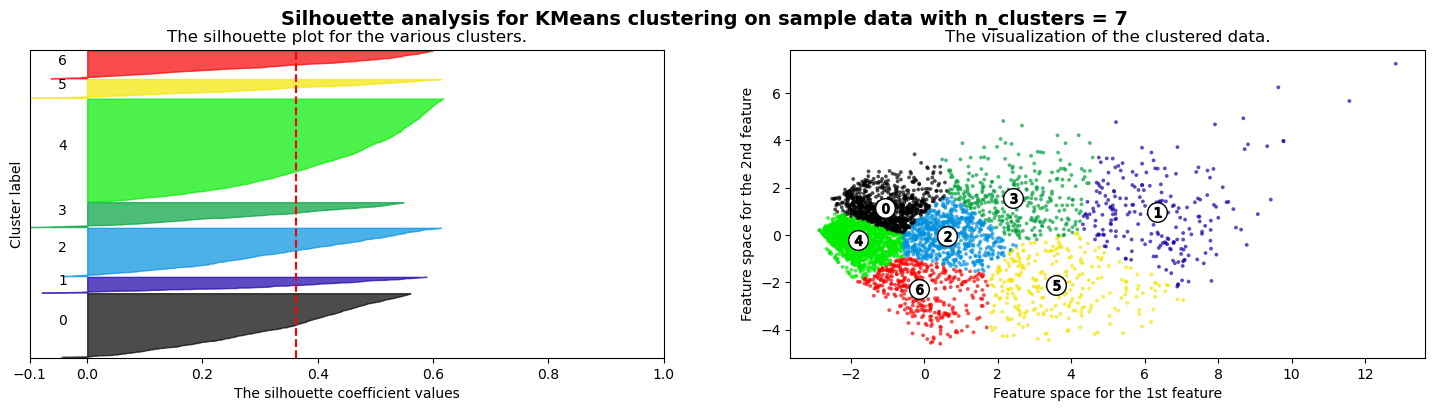

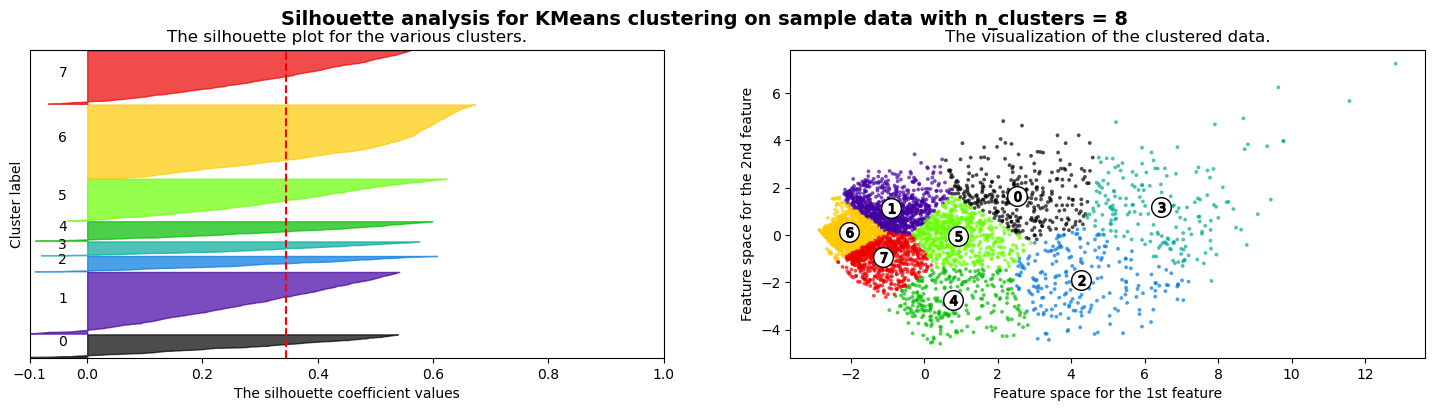

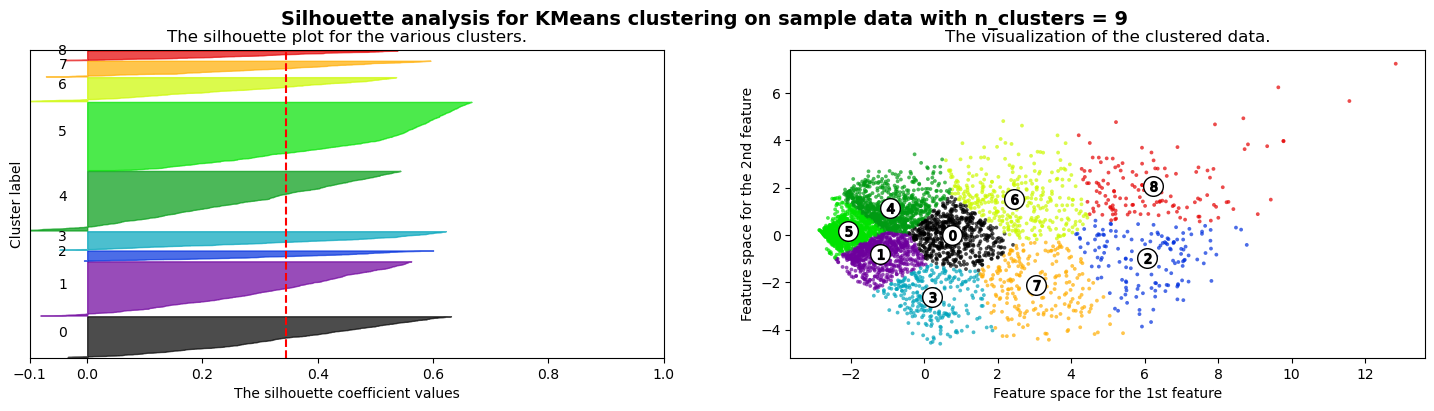

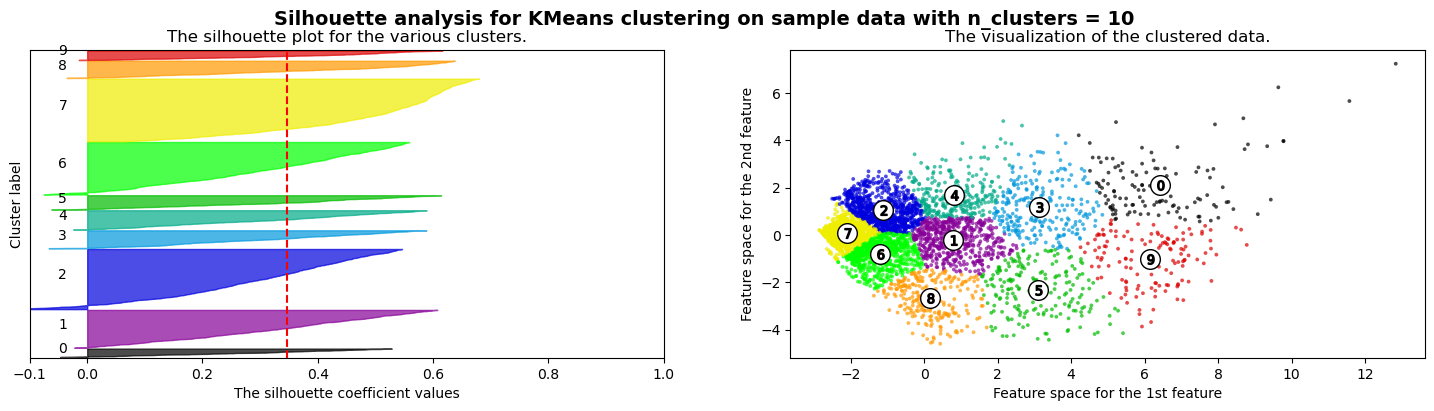

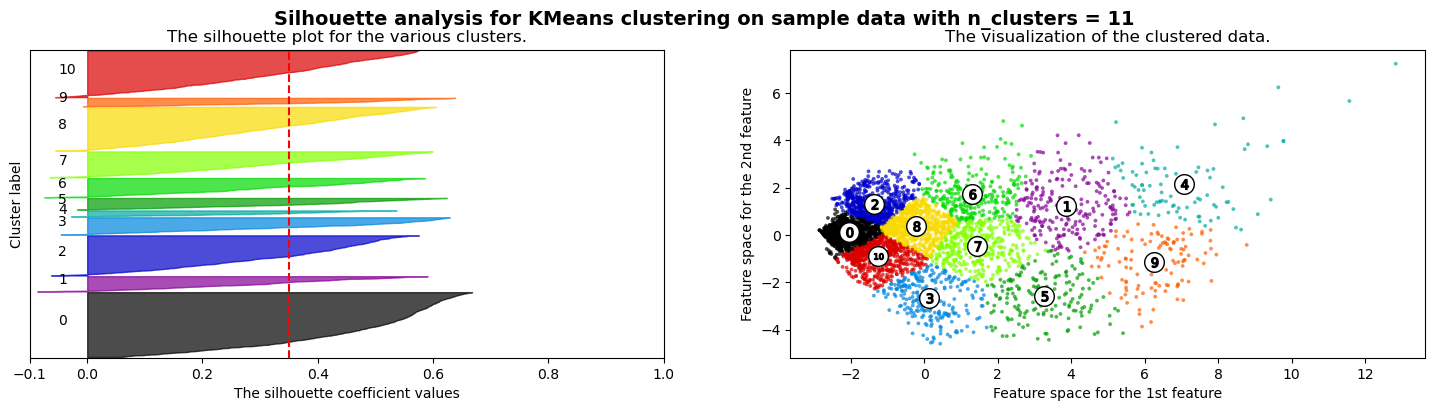

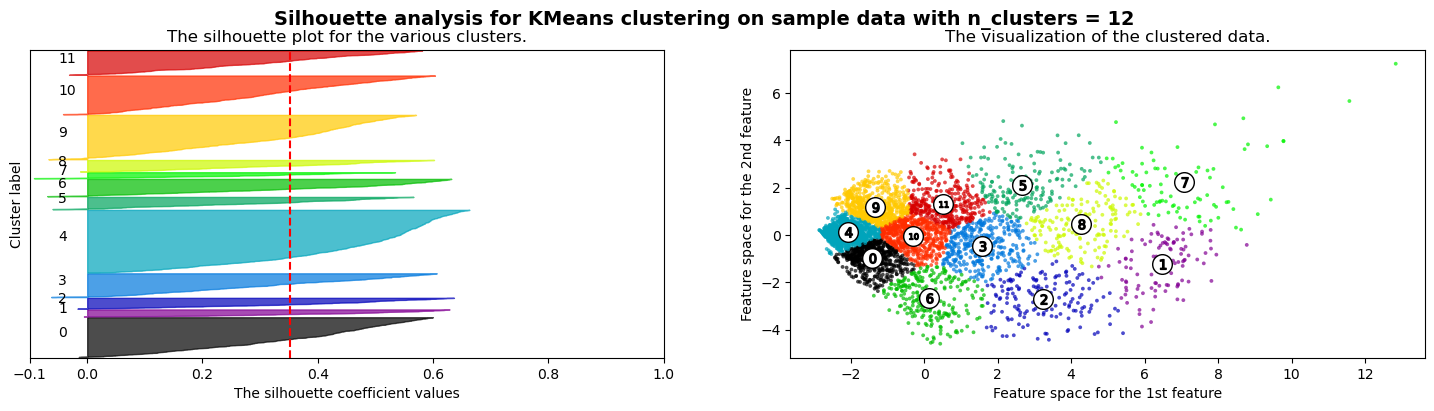

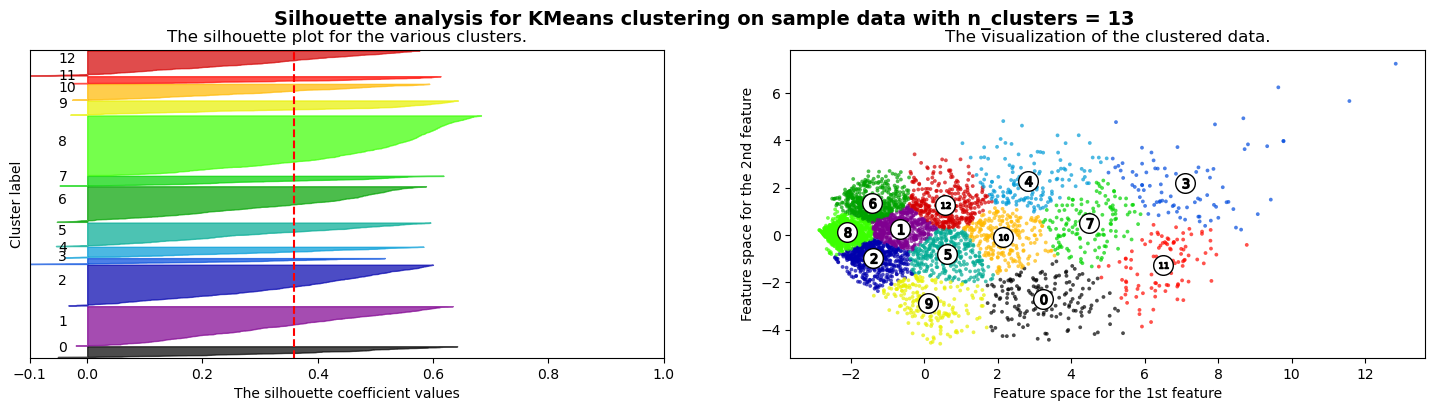

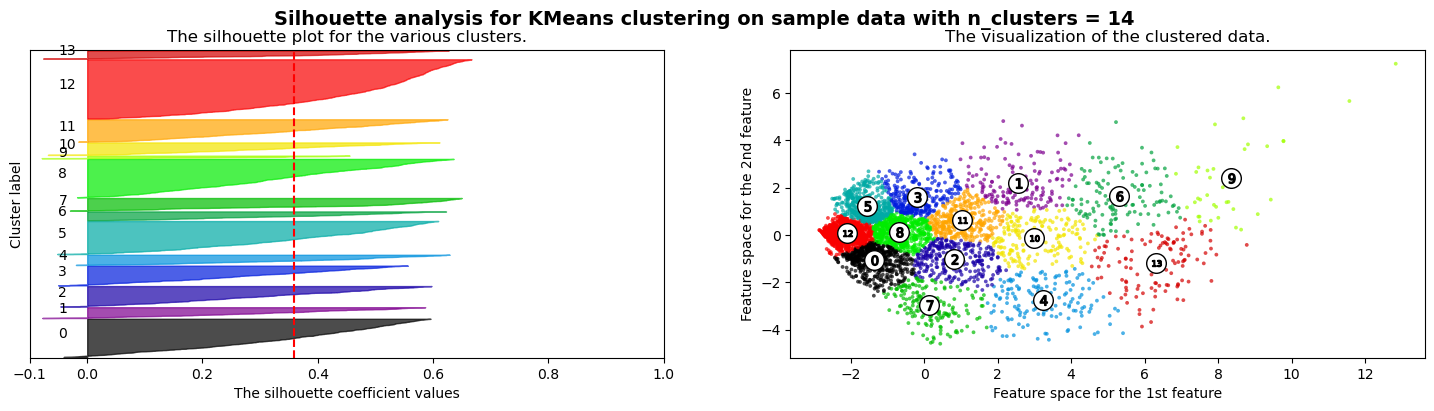

In [288]:
# Menampilkan Silhouette Score dan Plot Silhouette Plot

plot_silhouette(range(2, max_cluster), data_pca, random_state)

**Silhouette Score - Explanation**   
1. **Balance Between Number of Clusters and Cluster Quality:**    
- Although the elbow method suggests that the optimal number of clusters is around 5 or 6, increasing the number of clusters beyond that may not provide significant improvement in reducing inertia. This may indicate that dividing the data into more clusters may not necessarily provide better insights into the data structure or may not always represent natural separations in the data.
- While **n_clusters = 2** yields a higher silhouette score, this may indicate **"over-simplification"** of the data structure, where only two large clusters are found but may not truly represent natural separations in the data. On the other hand, **n_clusters = 4**, while having a competitive silhouette coefficient, may be **too detailed** or indicate **"over-fitting"** with too many clusters that may not be practical or meaningful.

2. **Consistency in Silhouette Values**:             
- With **n_clusters = 3**, the silhouette coefficients may suggest that points are more **uniformly clustered**, with little fluctuation in silhouette values among objects within the same cluster. This could indicate more **cohesive** and **consistent separation** between clusters.

3. **Context and Domain Decision:**                
- Optimal cluster number selection also heavily depends on the **domain context** of the data and **analytical needs**. Sometimes, the decision to choose a specific cluster number is also based on the **analyst's interpretation** of the data and **prior knowledge** of the domain.

4.  **Visualization:**         
- In the visualization of **n_clusters = 3**, clear separation between clusters with **minimal overlap** is observed. This indicates that the identified clusters have **distinct characteristics** and are **well-separated** from each other.

Combining all these factors may lead an analyst to choose **n_clusters = 3** as the **optimal cluster number**, despite its lower average silhouette score. This suggests that the decision is based on the **overall quality** of clusters and a **deeper understanding** of the data structure.

In [289]:
# Define the column indices or names for numerical columns
num_columns = [
    'Most_Recent', 'Total_Transactions', 'Total_Purchases', 'Total_Spending', 'Average_Transaction', 
    'Unique_Purchases', 'Average_Days_Between_Purchases', 'Day_Of_The_Week', 'Hour', 'UK', 
    'Cancel_Frequency', 'Cancel_Rate', 'Monthly_Spending_Mean', 'Monthly_Spending_Std', 'Spending_Trend'
]

# Define the preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_columns)
], remainder="passthrough")

# Define the final pipeline including preprocessing and KMeans
pipeline = Pipeline([
    ('preprocessing', preprocessor),  # Preprocessing steps
    ('PCA', PCA(n_components=2)),      # PCA for dimensionality reduction
    ('kmeans', KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=10))  # Model: KMeans Clustering
])

# Fit the pipeline with training data
pipeline.fit(df_capped[num_columns])

# Predict cluster labels for the data
pred = pipeline.predict(df_capped[num_columns])

print(pred)


[2 0 0 ... 2 0 0]


**Pipeline - Explanation**    

In the above code, we define a pipeline to perform data preprocessing and clustering modeling using the KMeans algorithm. The steps in the pipeline include preprocessing numerical data using StandardScaler to normalize the data scale, followed by dimensionality reduction using PCA with 2 components, and finally applying the KMeans algorithm with 3 clusters. After the pipeline is constructed, we train it using previously processed data and then predict cluster labels for that data. The predicted cluster labels are then printed to the screen. By using this pipeline, we can easily implement the entire process from preprocessing to clustering modeling efficiently.

**Pipeline Components:**
- **Preprocessing**: Normalizing the numerical data scale using StandardScaler.
- **Dimensionality Reduction**: Reducing the dimensionality of the data using PCA with 2 components.
- **Clustering Model**: Applying the KMeans algorithm with 3 clusters.

**Training and Prediction:**
- The pipeline is trained using the preprocessed data.
- Cluster labels are predicted for the data.
- Predicted cluster labels are printed.

This pipeline facilitates the seamless integration of preprocessing and clustering modeling, streamlining the workflow and enhancing efficiency.

# **7. Model Evaluasi**

In [290]:
# Masukkan hasil clustering ke dalam dataset
df['Cluster'] = pred

df.sample(10)

CustomerID  Most_Recent  Total_Transactions  Total_Purchases  \
207      12604.0           79                   2              200   
1952     15045.0          151                   3              106   
3076     16595.0           61                   1              335   
1684     14661.0           26                   1               35   
2381     15623.0          141                   1              125   
1925     15012.0           53                   2              225   
3043     16549.0           10                  10             2294   
1122     13884.0            7                   6              297   
211      12610.0           22                   6             1018   
1911     14985.0          198                   2              256   

      Total_Spending  Average_Transaction  Unique_Purchases  \
207           236.18           118.090000                14   
1952          633.66           211.220000                11   
3076          360.16           360.160000                83   
1684          107.95           107.950000                 4   
2381          301.03           301.030000                19   
1925          405.04           202.520000               110   
3043         4034.90           403.490000               445   
1122          781.30           130.216667                45   
211          1705.99           284.331667                84   
1911          292.01           146.005000                78   

      Average_Days_Between_Purchases  Day_Of_The_Week  Hour  UK  \
207                        13.000000                2    12   0   
1952                        8.833333                0    11   1   
3076                        0.000000                6    13   1   
1684                        0.000000                6    11   1   
2381                        0.000000                3    17   1   
1925                        2.644628                0    12   1   
3043                        0.350649                1    15   1   
1122                        4.677966                6    13   1   
211                         0.981132                4    13   0   
1911                        1.951220                3    19   1   

      Cancel_Frequency  Cancel_Rate  Monthly_Spending_Mean  \
207                0.0     0.000000             118.090000   
1952               1.0     0.500000             211.220000   
3076               0.0     0.000000             360.160000   
1684               0.0     0.000000             107.950000   
2381               0.0     0.000000             301.030000   
1925               0.0     0.000000             202.520000   
3043               0.0     0.000000             806.980000   
1122               1.0     0.100000             260.433333   
211                2.0     0.666667             568.663333   
1911               0.0     0.000000             146.005000   

      Monthly_Spending_Std  Spending_Trend  Cluster  
207              59.976797         -84.820        2  
1952            272.073558         -21.070        2  
3076              0.000000           0.000        2  
1684              0.000000           0.000        2  
2381              0.000000           0.000        2  
1925             19.742421          27.920        2  
3043            718.816477         391.285        1  
1122             78.009332          28.575        2  
211             471.655530        -457.250        0  
1911             37.101893          52.470        2

**Add Cluster - Explanation**      
By adding the **cluster labels** generated by the **KMeans algorithm** to the **original dataset**, we now assign these cluster labels to each **data point**, enabling us to **analyze** and **understand** how **customers** are segmented into different **groups** based on their **transactional behavior**. This additional information allows for more **targeted** and **personalized marketing strategies**, as well as insights into **customer preferences** and **patterns**.

In [291]:
# Kelompokkan data berdasarkan kluster dan hitung jumlah anggota di setiap kluster
cluster_counts = df.groupby('Cluster').size()

# Tampilkan jumlah anggota di setiap kluster
print("Jumlah anggota di setiap cluster:")
print(cluster_counts)

Jumlah anggota di setiap cluster:
Cluster
0    1193
1     505
2    2580
dtype: int64


**Grouped Based on The Clusters - Explanation:**        
Data has been successfully **grouped** based on **clusters**, and the **number of members** in each cluster has been **calculated**. **Cluster 0** has **1193 members**, **cluster 1** has **505 members**, and **cluster 2** has **2580 members**. This analysis provides insights into the **distribution of members** in each cluster, which can be used to understand the **relative proportions** of each **customer segment** in the dataset. With this understanding, **marketing strategies** and **customer services** can be **tailored** to address the **needs and preferences** of different **groups**.

In [292]:
# Memisahkan masing - masing Cluster untuk melihat rata - rata
Cluster0 = df[df['Cluster'] == 0]
Cluster1 = df[df['Cluster'] == 1]
Cluster2 = df[df['Cluster'] == 2]

**Explanation:**    
**Data has been separated into three clusters based on the clusters generated by the KMeans algorithm**. Each cluster is then stored in a separate DataFrame for further analysis. **By dividing the data into each cluster**, we can observe the unique characteristics of each cluster and analyze patterns and behaviors that may differ among them. This step enables an **in-depth analysis of the attributes that distinguish each customer group** and provides deeper insights into the customer segmentation produced by the clustering model.

In [293]:
# Tampilkan nilai kmean masing - masing cluster pada tiap feature
cluster_kmeans = df.groupby('Cluster').mean()
cluster_kmeans

CustomerID  Most_Recent  Total_Transactions  Total_Purchases  \
Cluster                                                                   
0        15088.011735    57.699078            5.010897      1081.514669   
1        15138.702970    20.942574           19.263366      5762.289109   
2        15419.318605   117.444186            2.320543       255.193411   

         Total_Spending  Average_Transaction  Unique_Purchases  \
Cluster                                                          
0           1769.516882           492.963568         83.691534   
1           9985.078752           532.765440        180.653465   
2            422.457690           202.530200         29.241085   

         Average_Days_Between_Purchases  Day_Of_The_Week       Hour        UK  \
Cluster                                                                         
0                              2.609990         2.515507  12.402347  0.851635   
1                              1.794738         2.497030  12.164356  0.877228   
2                              4.145518         2.566667  12.582558  0.932946   

         Cancel_Frequency  Cancel_Rate  Monthly_Spending_Mean  \
Cluster                                                         
0                0.648785     0.287057             641.187528   
1                3.716832     1.756889            1168.188203   
2                0.279070     0.127300             229.043620   

         Monthly_Spending_Std  Spending_Trend  
Cluster                                        
0                  224.320136      -44.030330  
1                  834.719646      -66.197785  
2                   48.832672       -8.732214

## EDA After Clustering

<Axes: >

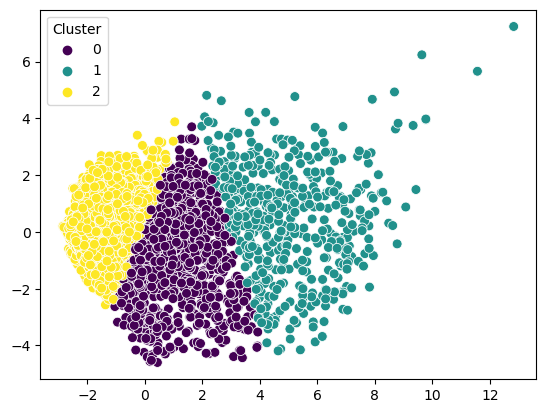

In [294]:
# Cluster visualization in 2D
pca_2d = PCA(n_components=2)
pca_2d.fit(data_scaler)

data_scal_pca_2d = pca_2d.fit_transform(data_scaler)

sns.scatterplot(x=data_scal_pca_2d[:,0], y=data_scal_pca_2d[:,1], hue=df['Cluster'], palette='viridis', s=50)

**Explanation**            

In the visualization with k=3, clear separation between clusters with minimal overlap is observed. This indicates that the identified clusters have distinct characteristics and are well-separated from each other.

For n_clusters = 2 The average silhouette_score is : 0.5493701170093117
For n_clusters = 3 The average silhouette_score is : 0.42102519271067573
For n_clusters = 4 The average silhouette_score is : 0.4317731030319091


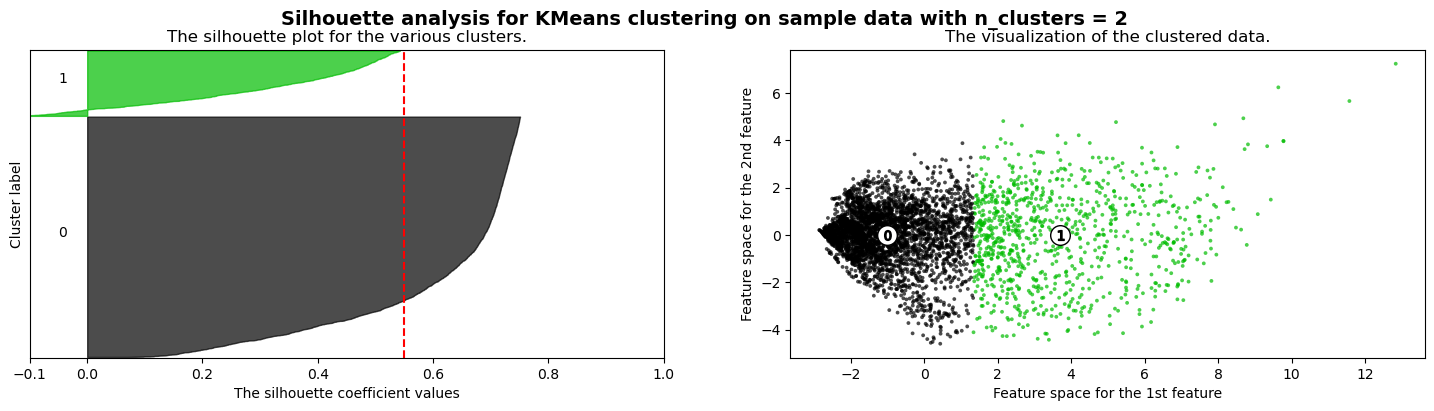

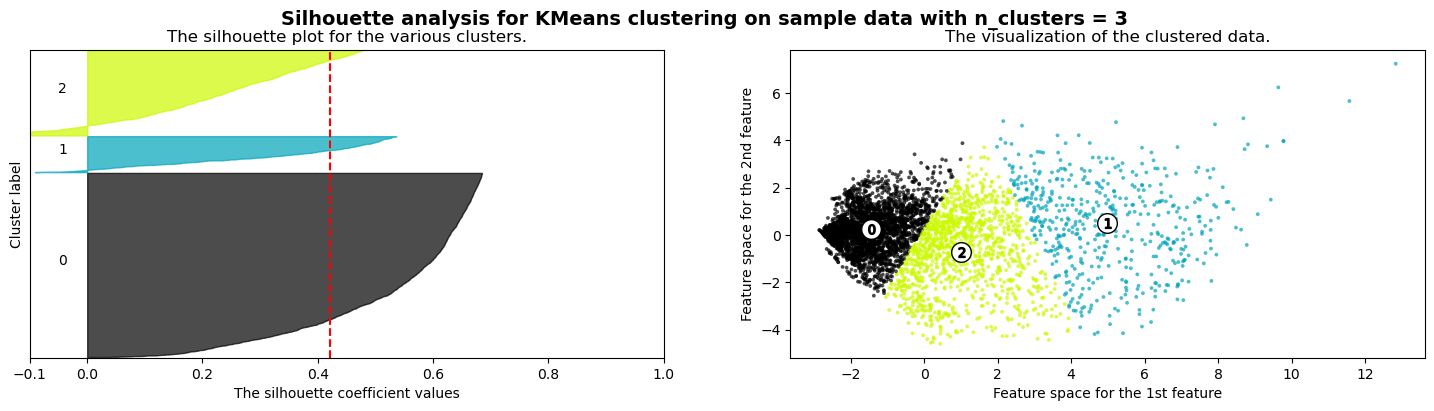

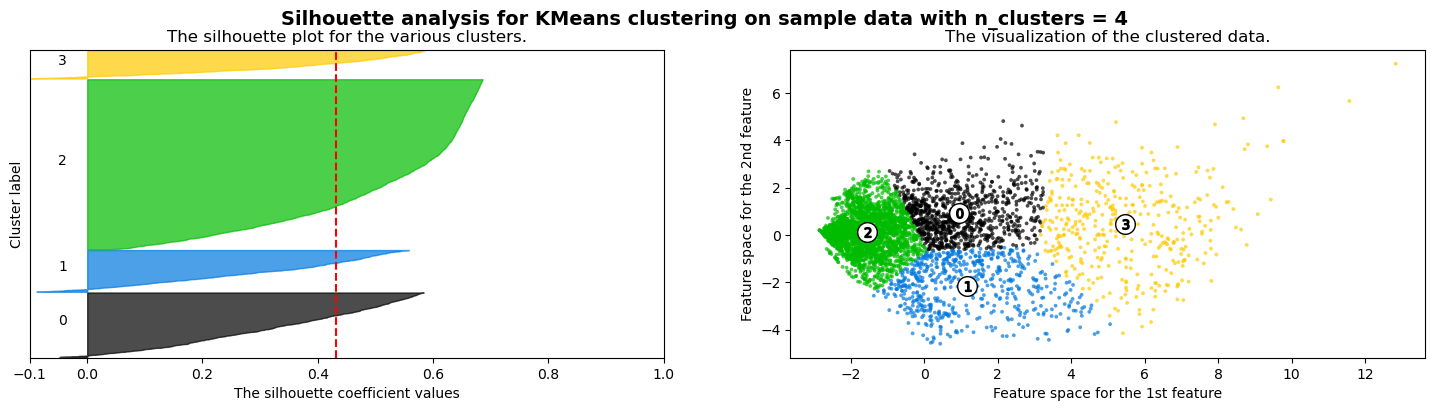

In [295]:
plot_silhouette(range(2, 5), data_scal_pca_2d, 3)

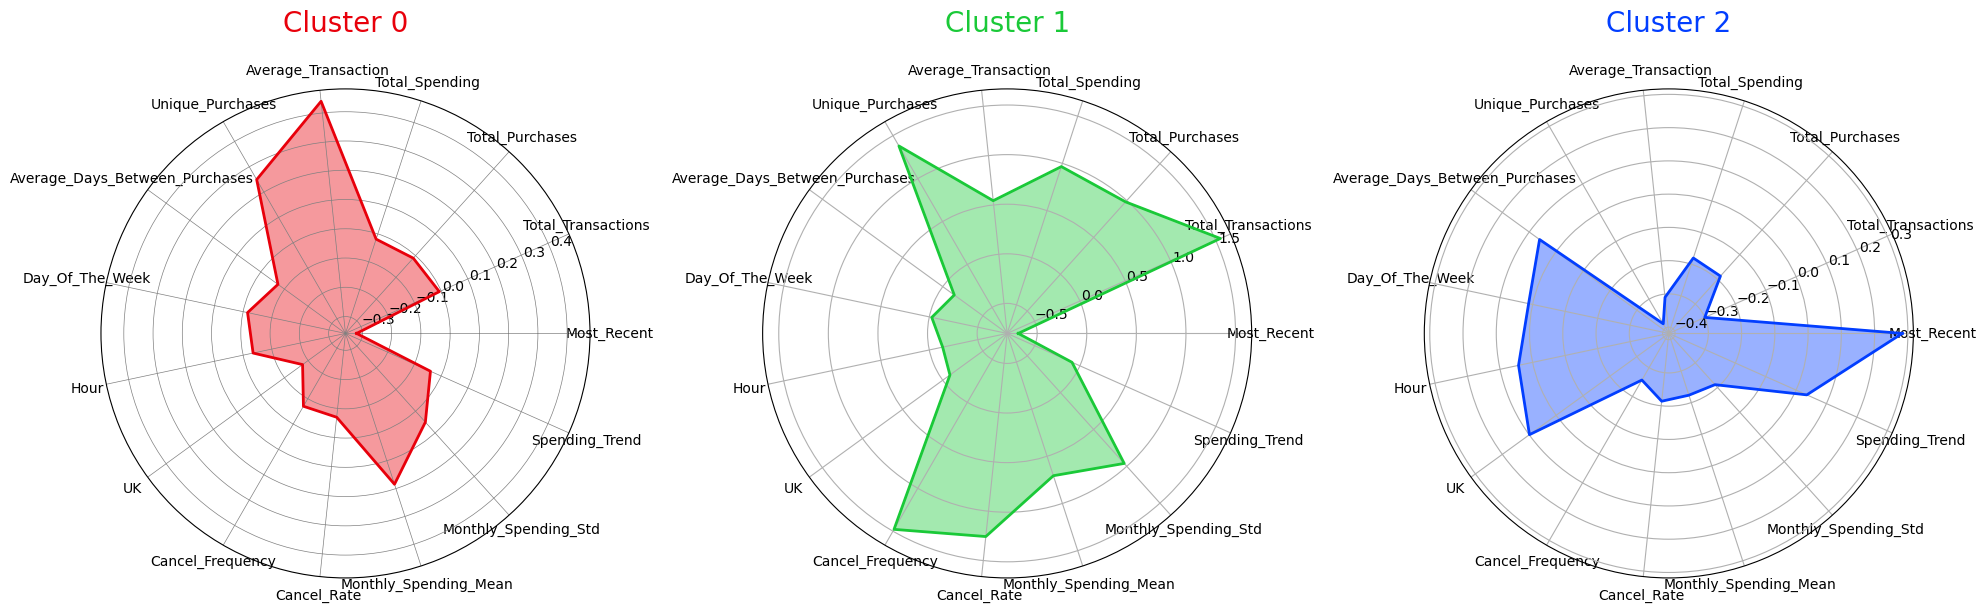

In [296]:
# Setting up the color scheme for the clusters (RGB order)
colors = ['#e8000b', '#1ac938', '#023eff']

# Setting 'CustomerID' column as index and assigning it to a new dataframe
df_customer = df.set_index('CustomerID')

# Standardize the data (excluding the Cluster column)
scaler = StandardScaler()
df_customer_standardized = scaler.fit_transform(df_customer.drop(columns=['Cluster'], axis=1))

# Create a new dataframe with standardized values and add the Cluster column back
df_customer_standardized = pd.DataFrame(df_customer_standardized, columns=df_customer.columns[:-1], index=df_customer.index)
df_customer_standardized['Cluster'] = df_customer['Cluster']

# Calculate the centroids of each Cluster
Cluster_centroids = df_customer_standardized.groupby('Cluster').mean()

# Function to create a radar chart
def create_radar_chart(ax, angles, data, color, Cluster):
    # Plot the data and fill the area
    ax.fill(angles, data, color=color, alpha=0.4)
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid')
    
    # Add a title
    ax.set_title(f'Cluster {Cluster}', size=20, color=color, y=1.1)

# Set data
labels=np.array(Cluster_centroids.columns)
num_vars = len(labels)

# Compute angle of each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is circular, so we need to "complete the loop" and append the start to the end
labels = np.concatenate((labels, [labels[0]]))
angles += angles[:1]

# Initialize the figure
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw=dict(polar=True), nrows=1, ncols=3)

# Create radar chart for each Cluster
for i, color in enumerate(colors):
    data = Cluster_centroids.loc[i].tolist()
    data += data[:1]  # Complete the loop
    create_radar_chart(ax[i], angles, data, color, i)

# Add input data
ax[0].set_xticks(angles[:-1])
ax[0].set_xticklabels(labels[:-1])

ax[1].set_xticks(angles[:-1])
ax[1].set_xticklabels(labels[:-1])

ax[2].set_xticks(angles[:-1])
ax[2].set_xticklabels(labels[:-1])

# Add a grid
ax[0].grid(color='grey', linewidth=0.5)

# Display the plot
plt.tight_layout()
plt.show()

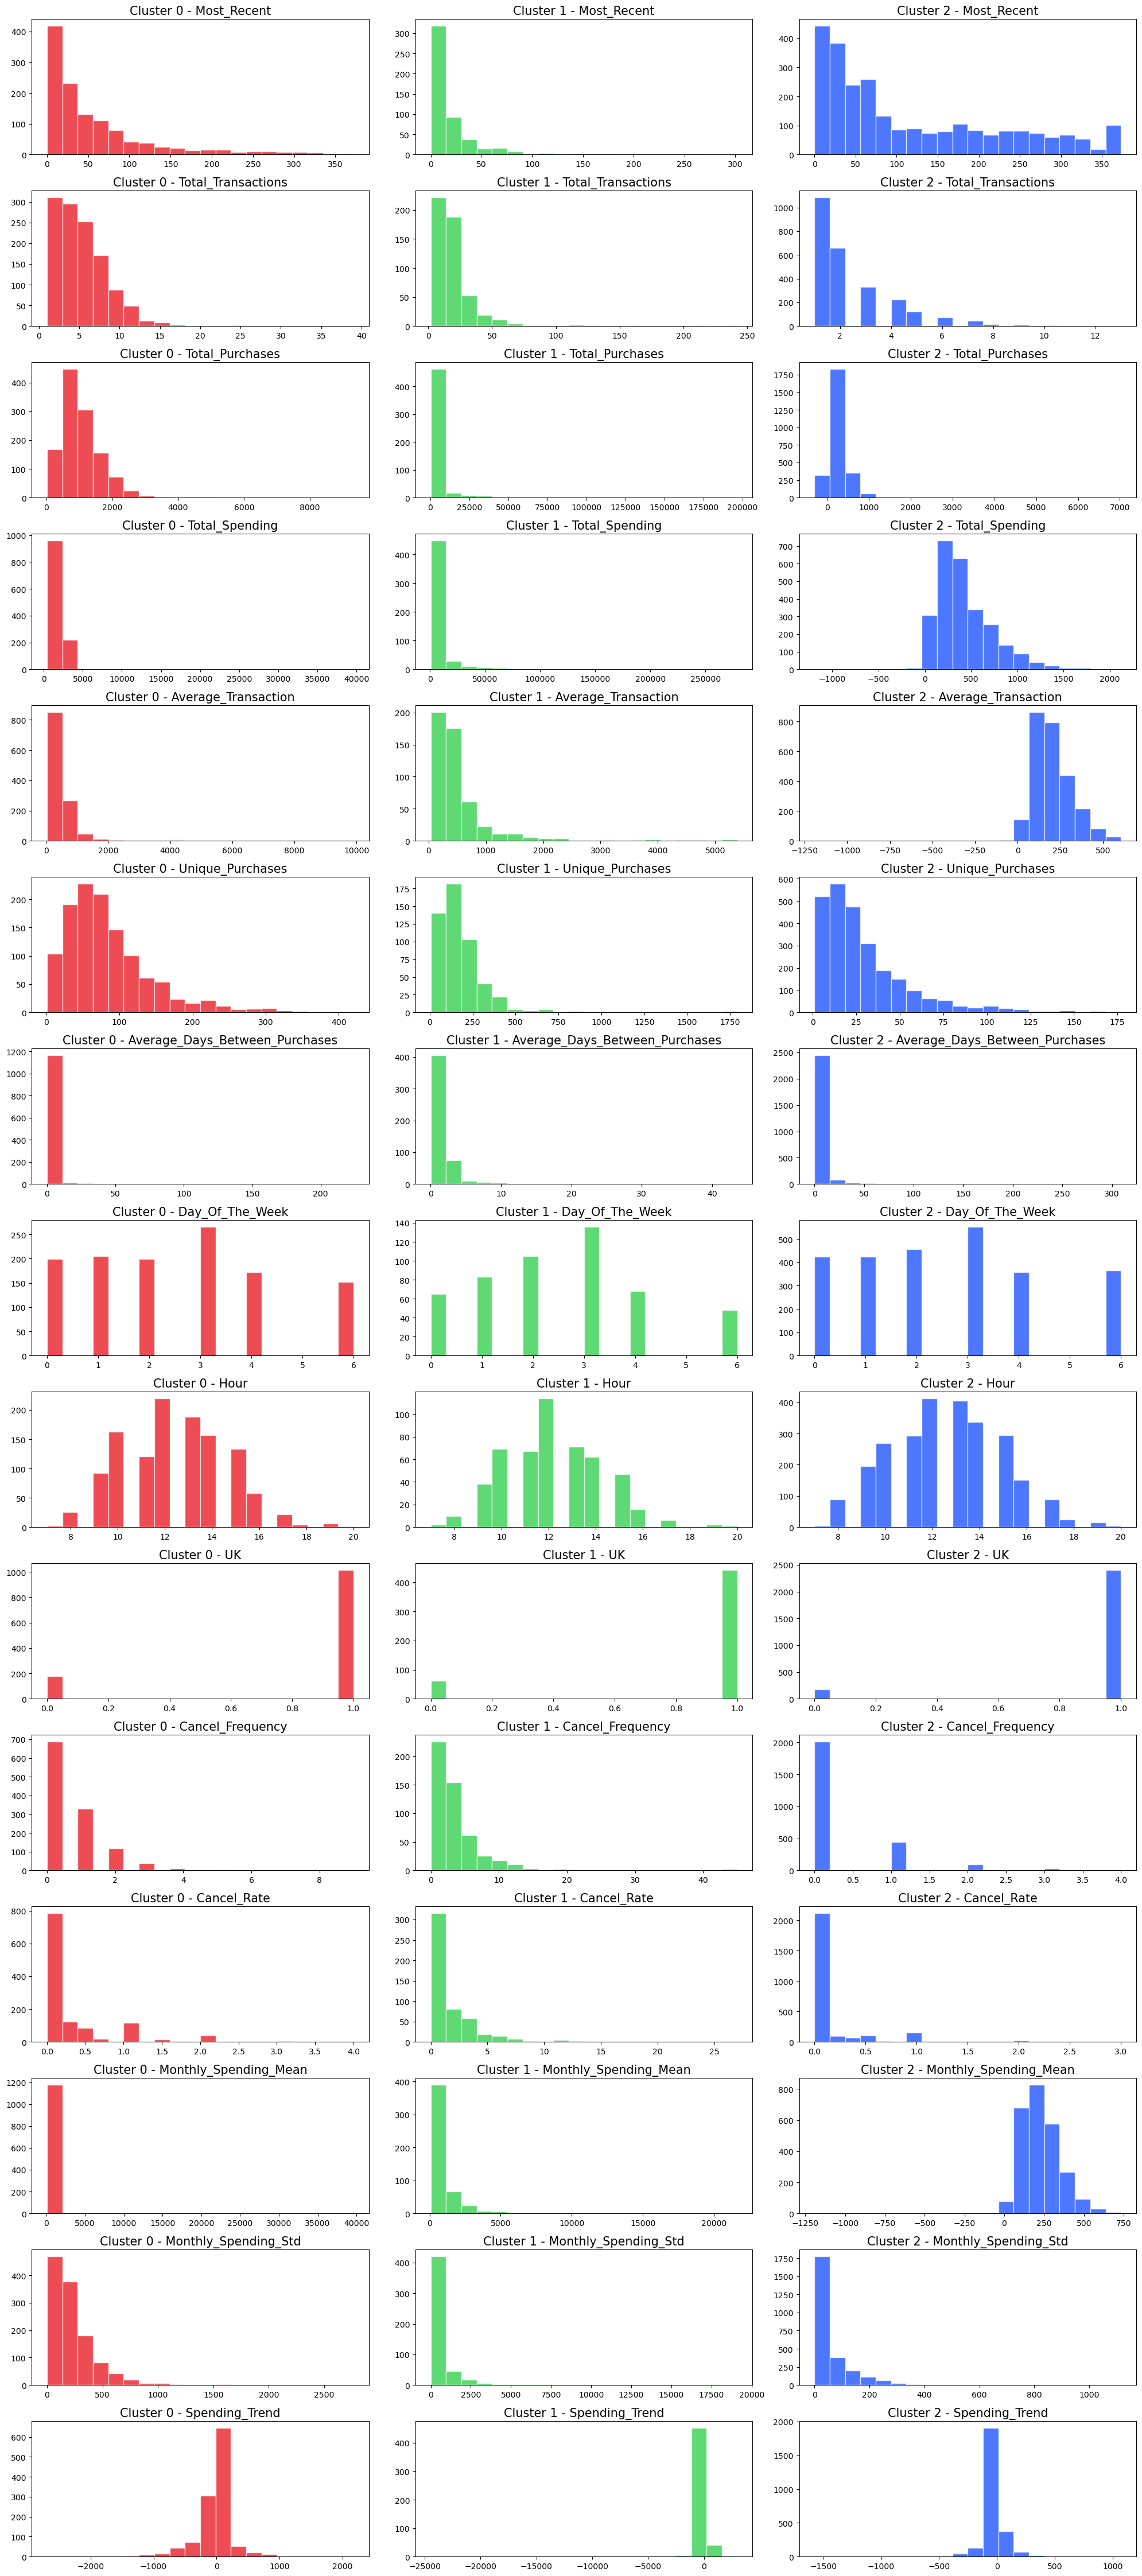

In [297]:
# Plot histograms for each feature segmented by the clusters
features = df.columns[1:-1]
clusters = df['Cluster'].unique()
clusters.sort()

# Setting up the subplots
n_rows = len(features)
n_cols = len(clusters)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 3*n_rows))

# Plotting histograms
for i, feature in enumerate(features):
    for j, cluster in enumerate(clusters):
        data = df[df['Cluster'] == cluster][feature]
        axes[i, j].hist(data, bins=20, color=colors[j], edgecolor='w', alpha=0.7)
        axes[i, j].set_title(f'Cluster {cluster} - {feature}', fontsize=15)
        axes[i, j].set_xlabel('')
        axes[i, j].set_ylabel('')

# Adjusting layout to prevent overlapping
plt.tight_layout()
plt.show()

**Radar Chart & Histogram - Explanation**

- **Cluster 0:**
This cluster consists of customers with high purchase values, but their purchase frequency tends to be lower. They tend to be loyal buyers but do not make purchases regularly. However, when they do make a purchase, they tend to spend a significant amount. Their purchasing pattern is relatively stable, but there are indications of a downward trend in spending. Customers in this cluster tend to shop during the midday and afternoon, especially on weekdays. Although they have a low cancellation rate, they show variability in their monthly expenditures.

- **Cluster 1:**
This cluster comprises customers who tend to make purchases regularly, albeit in smaller amounts. They generally shop in the morning and are more likely to shop mid-week. Although their overall spending is lower, their purchasing pattern is very stable and consistent. Customers in this cluster have a very low cancellation rate and tend to be consistent in their monthly expenditures.

- **Cluster 2:**
This cluster consists of customers who are regularly active, often making purchases in large amounts. They tend to shop throughout the day, with peak purchases both in the morning and evening. Customers in this cluster have a higher cancellation rate compared to other clusters, but this can be understood considering the high transaction volume. Although they have a more dynamic purchasing trend with a mix of increasing and decreasing trends, their monthly expenditures tend to be high with significant variability. The majority of customers in this cluster are based in the UK, but there is also a significant number of non-UK customers.

**Recommendations**

**Cluster 0: Prestigious Buyers**

- **Exclusive Membership Program:** Considering that customers in this cluster tend to be loyal buyers, you can offer an exclusive membership program that provides access to special offers, exclusive discounts, or limited products.
- **Special Promotions:** Offering promotions or larger discounts for bulk purchases can encourage additional purchases from customers in this cluster.
- **Personalized Experience:** Implementing more personalized marketing strategies by customizing offers and promotions based on customer purchase patterns and preferences can enhance their engagement.
- **Reward Program:** Creating a reward program that provides incentives to customers for each purchase or for reaching a certain purchase threshold can encourage them to remain active and loyal.

**Cluster 1: Consistent Buyers**

- **Repeat Discounts:** Offering regular discounts or incentives for repeat purchases can encourage customers in this cluster to remain active and make purchases more frequently.
- **Loyalty Program:** Establishing a loyalty program that rewards points or rewards every time they make a purchase can increase customer engagement and retention.
- **Product Recommendations:** Using previous purchase data to provide product recommendations tailored to customer preferences can increase transaction value and strengthen customer relationships.
- **Educational Content:** Providing educational content about specific products or industries can increase customer engagement and make them feel valued as loyal customers.

**Cluster 2: Active Buyers**

- **Joint Purchase Promotions:** Offering promotions or bundling relevant products can encourage customers in this cluster to make additional purchases.
- **Responsive Customer Service:** Having a responsive and efficient customer service system can help reduce cancellation rates and improve customer satisfaction.
- **Increasing Product Variability:** Continuously updating and adding attractive product variations can maintain the interest of customers in this cluster and encourage them to return for more purchases.
- **Special Offers for Non-UK Customers:** For non-UK customers in this cluster, offering special promotions or discounts as well as fast and reliable shipping services can increase their engagement and retention.

# **8. Model Saving**

In [298]:
# Save pca_2d
with open('pipeline.pkl', 'wb') as file_1:
  pickle.dump(pipeline, file_1)

# **9. Model Inference**

In [299]:
# Load Model
with open('pipeline.pkl', 'rb') as file_1:
  pipeline_inf = pickle.load(file_1)

In [300]:
# Load data Inference
df_inf = pd.read_csv('selected_data_inf.csv')

In [301]:
# Predicting data 
predict = pipeline_inf.predict(df_inf)

In [302]:
# Inputting cluster into DataFrame
df_inf['Cluster'] = predict

# Show DataFrame
df_inf

CustomerID  Most_Recent  Total_Transactions  Total_Purchases  \
0     16891.0          1.0                 5.0            265.0   

   Total_Spending  Average_Transaction  Unique_Purchases  \
0          742.43              148.486             166.0   

   Average_Days_Between_Purchases  Day_Of_The_Week  Hour   UK  \
0                             2.0              3.0  11.0  1.0   

   Cancel_Frequency  Cancel_Rate  Monthly_Spending_Mean  Monthly_Spending_Std  \
0               0.0          0.0                148.486             47.069283   

   Spending_Trend  Cluster  
0         -28.074        2

## Cluster all data

In [304]:
predict = pipeline_inf.predict(df_capped)

In [305]:
# Inputting cluster into DataFrame
df_capped['Cluster'] = predict

# Show DataFrame
df_capped

CustomerID  Most_Recent  Total_Transactions  Total_Purchases  \
0        12346.0       310.15                   2             46.0   
1        12347.0         2.00                   7           2458.0   
2        12348.0        75.00                   4           2332.0   
3        12349.0        18.00                   1            630.0   
4        12350.0       310.00                   1            196.0   
...          ...          ...                 ...              ...   
4273     18280.0       277.00                   1             46.0   
4274     18281.0       180.00                   1             54.0   
4275     18282.0         7.00                   3             98.0   
4276     18283.0         3.00                  16           1355.0   
4277     18287.0        42.00                   3           1586.0   

      Total_Spending  Average_Transaction  Unique_Purchases  \
0             110.80            75.736500               5.0   
1            4310.00           615.714286             103.0   
2            1437.24           359.310000              21.0   
3            1457.55           773.108000              72.0   
4             294.40           294.400000              16.0   
...              ...                  ...               ...   
4273          180.60           180.600000              10.0   
4274          110.80            80.820000               7.0   
4275          176.60            75.736500              12.0   
4276         2039.58           127.473750             205.3   
4277         1837.28           612.426667              59.0   

      Average_Days_Between_Purchases  Day_Of_The_Week  Hour  UK  \
0                           0.000000                1  10.0   1   
1                           2.016575                1  14.0   0   
2                          10.884615                3  19.0   0   
3                           0.000000                0   9.0   0   
4                           0.000000                2  16.0   0   
...                              ...              ...   ...  ..   
4273                        0.000000                0   9.0   1   
4274                        0.000000                6  10.0   1   
4275                        9.916667                4  13.0   1   
4276                        0.465181                3  14.0   1   
4277                        2.304348                2  10.0   1   

      Cancel_Frequency  Cancel_Rate  Monthly_Spending_Mean  \
0                  1.0     0.500000              89.940000   
1                  0.0     0.000000             615.714286   
2                  0.0     0.000000             359.310000   
3                  0.0     0.000000            1098.911250   
4                  0.0     0.000000             294.400000   
...                ...          ...                    ...   
4273               0.0     0.000000             180.600000   
4274               0.0     0.000000              89.940000   
4275               1.0     0.142857              89.940000   
4276               0.0     0.000000             203.958000   
4277               0.0     0.000000             918.640000   

      Monthly_Spending_Std  Spending_Trend  Cluster  
0                 0.000000        0.000000        2  
1               341.070789        4.486071        0  
2               203.875689     -100.884000        0  
3                 0.000000        0.000000        0  
4                 0.000000        0.000000        2  
...                    ...             ...      ...  
4273              0.000000        0.000000        2  
4274              0.000000        0.000000        2  
4275             14.792674      -20.920000        2  
4276            165.798738       22.319273        0  
4277            216.883792      189.436100        0  

[4278 rows x 17 columns]

In [306]:
df[df["Cluster"] == 1]

CustomerID  Most_Recent  Total_Transactions  Total_Purchases  \
12       12359.0            7                   6             1599   
15       12362.0            3                  13             2180   
38       12395.0           15                  15             2092   
49       12409.0           78                   7             5543   
54       12415.0           24                  24            76946   
...          ...          ...                 ...              ...   
4231     18223.0            1                  26             2891   
4233     18225.0            3                  17             3204   
4234     18226.0           38                  14             3459   
4237     18229.0           11                  20             2488   
4238     18230.0            9                  10             1298   

      Total_Spending  Average_Transaction  Unique_Purchases  \
12           6182.98          1030.496667               214   
15           4665.58           358.890769               200   
38           2662.28           177.485333                90   
49          11056.93          1579.561429                91   
54         123638.18          5151.590833               443   
...              ...                  ...               ...   
4231         6318.07           243.002692               118   
4233         5356.86           315.109412               151   
4234         5192.10           370.864286               141   
4237         7276.90           363.845000                66   
4238         2716.60           271.660000                32   

      Average_Days_Between_Purchases  Day_Of_The_Week  Hour  UK  \
12                          1.296000                3    12   0   
15                          1.110266                3    15   0   
38                          2.438356                4    16   0   
49                          0.920354                4    12   0   
54                          0.404916                1    10   0   
...                              ...              ...   ...  ..   
4231                        1.202020                0     9   1   
4233                        1.300353                3    15   1   
4234                        1.225410                2    10   1   
4237                        2.220859                2    10   1   
4238                        4.045455                3    13   1   

      Cancel_Frequency  Cancel_Rate  Monthly_Spending_Mean  \
12                 2.0     0.333333            1030.496667   
15                 3.0     0.230769             583.197500   
38                 3.0     0.200000             295.808889   
49                 4.0     0.571429            3685.643333   
54                 4.0     0.166667           11239.834545   
...                ...          ...                    ...   
4231              12.0     0.387097             574.370000   
4233               5.0     5.000000             535.686000   
4234               3.0     1.500000             519.210000   
4237               0.0     0.000000             606.408333   
4238               3.0     3.000000             388.085714   

      Monthly_Spending_Std  Spending_Trend  Cluster  
12             1137.566659       25.072571        1  
15              393.992285       46.824048        1  
38              219.915050       18.175167        1  
49             3266.883020     -676.140000        1  
54             8039.048719       -8.166182        1  
...                    ...             ...      ...  
4231            464.999472       14.670545        1  
4233            296.457003       40.256242        1  
4234            313.186524      -28.215636        1  
4237            270.645685       37.941469        1  
4238            226.803131       81.285714        1  

[505 rows x 17 columns]

In [307]:
df_capped.to_csv('clustered_customer_data.csv', index=False)

# **10. Recommender System**

In [308]:
# Load your data
cluster_data = df_inf # Replace "cluster_data.csv" with your cluster data file
main_data = pd.read_csv("data_clean.csv")

In [309]:
main_data.head(5)

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  \
0  2010-12-01 08:26:00       2.55     17850.0  United Kingdom   
1  2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
2  2010-12-01 08:26:00       2.75     17850.0  United Kingdom   
3  2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
4  2010-12-01 08:26:00       3.39     17850.0  United Kingdom   

  Transaction_Status  Year Quarter Continent  Sales ProductCategory  \
0          Completed  2010      Q4    Europe  15.30         T-LIGHT   
1          Completed  2010      Q4    Europe  20.34         LANTERN   
2          Completed  2010      Q4    Europe  22.00     COAT HANGER   
3          Completed  2010      Q4    Europe  20.34          BOTTLE   
4          Completed  2010      Q4    Europe  20.34          HOTTIE   

       ProductType  
0  HOME DECORATION  
1  HOME DECORATION  
2          UTILITY  
3      KITCHENWARE  
4          FASHION

In [310]:
# Merge tables on CustomerID
merged_data = pd.merge(cluster_data, main_data, on="CustomerID")

# Define recommendation logic
def recommend_top_products_for_cluster(cluster):
    cluster_data = merged_data[merged_data['Cluster'] == cluster]
    # Count the occurrences of each product within the cluster
    Description = main_data['Description'].value_counts()
    # Select the top 5 most frequent products
    top_products = Description.head(5).index.tolist()
    return top_products

# Get unique clusters
clusters = merged_data['Cluster'].unique()

# Generate recommendations for each cluster
recommendations = {}
for cluster in clusters:
    recommendations[cluster] = recommend_top_products_for_cluster(cluster)

# Print recommendations for each cluster
for cluster, top_products in recommendations.items():
    print("Top 5 products for Cluster {}: {}".format(cluster, top_products))

    

Top 5 products for Cluster 2: ['WHITE HANGING HEART T-LIGHT HOLDER', 'REGENCY CAKESTAND 3 TIER', 'JUMBO BAG RED RETROSPOT', 'PARTY BUNTING', 'ASSORTED COLOUR BIRD ORNAMENT']


In [311]:
import pandas as pd

# Assuming 'cluster_data' and 'main_data' are already defined

# Merge tables on CustomerID
merged_data = pd.merge(cluster_data, main_data, on="CustomerID")

# Define recommendation logic
def recommend_top_products_for_cluster(cluster):
    cluster_data = merged_data[merged_data['Cluster'] == cluster]
    # Count the occurrences of each product within the cluster
    description_counts = cluster_data['Description'].value_counts()
    # Select the top 5 most frequent products
    top_products = description_counts.head(5).index.tolist()
    return top_products

# Get unique clusters
clusters = merged_data['Cluster'].unique()

# Initialize a list to store recommendations
recommendations = []

# Generate recommendations for each cluster
for cluster in clusters:
    top_products = recommend_top_products_for_cluster(cluster)
    recommendations.append({ 'Recomended Products': top_products})

# Convert the list of dictionaries to a DataFrame
recommendations_df = pd.DataFrame(recommendations)

# Explode the DataFrame to separate each recommendation into a separate row
recommendations_df = recommendations_df.explode('Recomended Products')

# Reset index
recommendations_df.reset_index(drop=True, inplace=True)

# Display the DataFrame
recommendations_df

Recomended Products
0                IVORY KITCHEN SCALES
1   SET OF 3 CAKE TINS PANTRY DESIGN 
2        SET OF 4 PANTRY JELLY MOULDS
3     RECIPE BOX PANTRY YELLOW DESIGN
4  SET 20 NAPKINS FAIRY CAKES DESIGN

In [312]:
# Merge tables on CustomerID
merged_data2 = pd.merge(df_capped, main_data, on="CustomerID")

columns_to_drop = ['Most_Recent', 'Total_Transactions', 'Total_Purchases', 'Total_Spending', 
                   'Average_Transaction', 'Unique_Purchases', 'Average_Days_Between_Purchases', 
                   'Day_Of_The_Week', 'Hour', 'UK', 'Cancel_Frequency', 'Cancel_Rate', 
                   'Monthly_Spending_Mean', 'Monthly_Spending_Std', 'Spending_Trend']

merged_data2.drop(columns=columns_to_drop, inplace=True)

merged_data2.to_csv('clustered_main_data.csv', index=False)